# IA CONTAINMENT SUCCESS BY FINAL FIRE SIZE


This code reads in wildfire records from the FPA-FOD dataset and assigns each fire a binary indicator (event_type) 
based on its size and land cover type. Following Red Book IA containment thresholds, fires in grass/shrub land covers 
(codes 52, 71, 81) are only marked as event_type = 1 if they grow to 300 acres or more (size classes E–G). 
In contrast, fires in all other land covers (e.g., timber/forest) are flagged once they reach 100 acres or more (size classes D–G). 
All smaller fires are assigned event_type = 0. This creates a standardized classification of “large event” 
fires aligned with operational containment benchmarks used in wildfire management



In [11]:

"""
IA analysis 
100 in timber and 300 acre in grasslands 

CITATION FOR THIS LOGIC:
*!*!
https://www.nifc.gov/sites/default/files/redbook-files/Chapter11.pdf
*!*!

Fire-size class definitions (by final fire perimeter acres)
-----------------------------------------------------------
A: > 0 and <= 0.25 acres
B: >= 0.26 and <= 9.9 acres
C: >= 10.0 and <= 99.9 acres
D: >= 100 and <= 299 acres
E: >= 300 and <= 999 acres
F: >= 1000 and <= 4999 acres
G: >= 5000 acres

Rules for `event_type`:
- If fire occurs in land cover types [52 (Shrubland), 71 (Grassland), 81 (Pasture/Hay)] (300 acres in grasslands ):
    - Assign event_type = 1 only if FIRE_SIZE_CLASS is in ['E', 'F', 'G'] (larger fires).

- If fire occurs in any other land cover (100 acres in forests):
    - Assign event_type = 1 if FIRE_SIZE_CLASS is in ['D', 'E', 'F', 'G'].

- Otherwise assign event_type = 0.
"""

import pandas as pd
import matplotlib.pyplot as plt

# # Read CSV
# df = pd.read_csv(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\Data\2020_FPA_FOD_cons.csv")

# # Display head
# # print(df.head())

# # Create binary event_type column based on FIRE_SIZE_CLASS
# #df['event_type'] = df['FIRE_SIZE_CLASS'].apply(lambda x: 1 if x in ['D', 'E', 'F', 'G'] else 0)
# df['event_type'] = df.apply(
#     lambda row: 1 if (row['Land_Cover'] in [52, 71, 81] and row['FIRE_SIZE_CLASS'] in ['E', 'F', 'G']) 
#     or (row['Land_Cover'] not in [52, 71, 81] and row['FIRE_SIZE_CLASS'] in ['D', 'E', 'F', 'G']) 
#     else 0,
#     axis=1
# )

# Display head
import pandas as pd
import numpy as np

csv_path = r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\Data\FPA_FOD_Plus.csv"

# How many rows to sample (e.g., 1% of the file)
frac =  1#0.001  

# Count lines quickly
n_lines = sum(1 for _ in open(csv_path))

# Build random skip mask (keep header row)
skip = sorted(np.random.choice(np.arange(1, n_lines), size=int((n_lines-1)*(1-frac)), replace=False))

df = pd.read_csv(csv_path, skiprows=skip)

print(df.shape)

# Create binary event_type column based on FIRE_SIZE_CLASS
#df['event_type'] = df['FIRE_SIZE_CLASS'].apply(lambda x: 1 if x in ['D', 'E', 'F', 'G'] else 0)
df['event_type'] = df.apply(
    lambda row: 1 if (row['Land_Cover'] in [52, 71, 81] and row['FIRE_SIZE_CLASS'] in ['E', 'F', 'G']) 
    or (row['Land_Cover'] not in [52, 71, 81] and row['FIRE_SIZE_CLASS'] in ['D', 'E', 'F', 'G']) 
    else 0,
    axis=1
)


C:\Users\magst\AppData\Local\Temp\ipykernel_13404\3786943349.py:63: DtypeWarning: Columns (9,11,13,14,15,16,17,52,53,60,62,63,64,307) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, skiprows=skip)


(2302521, 308)


In [12]:
list(df.columns)

['FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_PLUS_INCIDENT_JOIN_ID',
 'ICS_209_PLUS_COMPLEX_JOIN_ID',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'NWCG_CAUSE_CLASSIFICATION',
 'NWCG_GENERAL_CAUSE',
 'NWCG_CAUSE_AGE_CATEGORY',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'LatLong_State',
 'LatLong_County',
 'NPL',
 'Mang_Type',
 'Mang_Name',
 'Des_Tp',
 'GAP_Sts',
 'GAP_Prity',
 'EVH',
 'EVT',
 'EVH_1km',
 'EVT_1km',
 'EVC',
 'EVC_1km',
 'NAME',
 'MOD_NDVI_12m',
 'MOD_EVI_12m',
 'Land_Cover',
 'Land_Cover_1km',
 'rpms',
 'rpms_1km',
 'Population',
 'Popo_

IA Success (0) / Total: 2248837 / 2302521  (97.67%)
IA Failure (1) / Total: 53684 / 2302521  (2.33%)


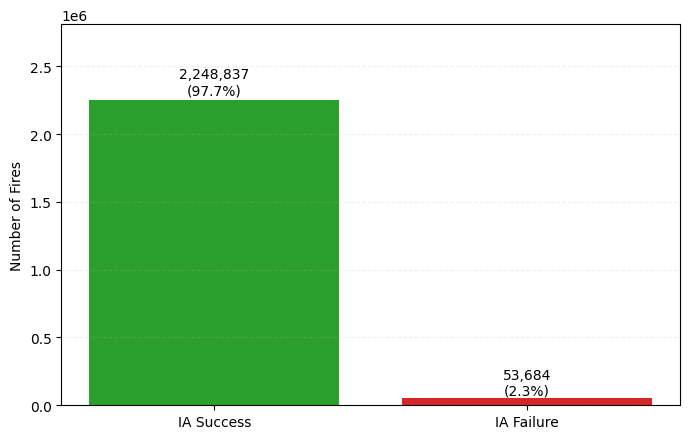

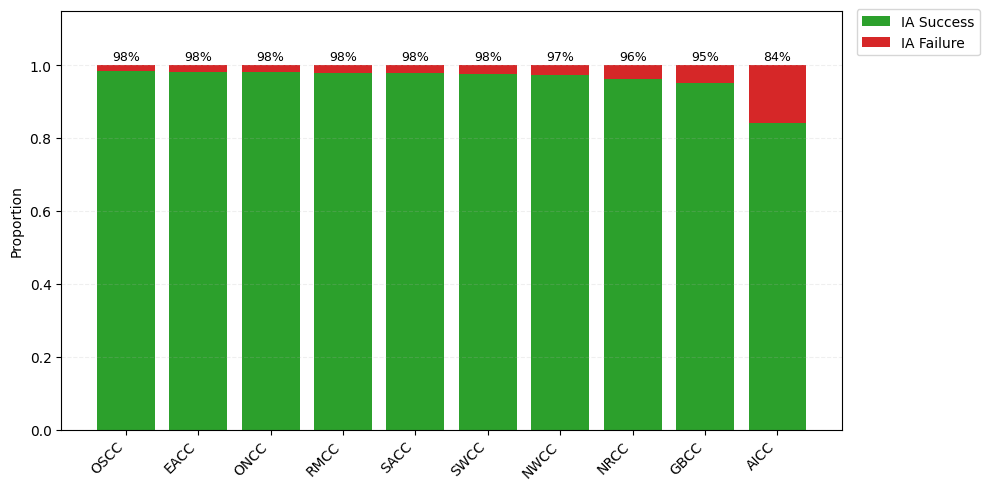

In [2]:
"""
This script summarizes initial-attack (IA) outcomes from a DataFrame that already has event_type coded (0 = IA success, 1 = IA failure). 
It first prints overall counts and percentages of successes and failures, then builds a bar chart showing total counts with 
percentage labels for each outcome. If the GACCAbbrev column exists, it groups by GACC, computes each region’s success/failure counts and shares, 
sorts regions by success share, and plots a stacked bar chart (success on bottom, failure on top) with per-region success percentages labeled above the bars. 
If GACCAbbrev is missing, it simply skips the by-GACC plots.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assumes df already exists with column 'event_type' (0=IA success, 1=IA failure)
# If not, uncomment and set your CSV path:
# df = pd.read_csv(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\Data\2020_FPA_FOD_cons.csv")

# ---------- 1) Print success/failure ratio ----------
total = len(df)
n_success = int((df["event_type"] == 0).sum())
n_failure = int((df["event_type"] == 1).sum())
print(f"IA Success (0) / Total: {n_success} / {total}  ({(n_success/total*100):.2f}%)")
print(f"IA Failure (1) / Total: {n_failure} / {total}  ({(n_failure/total*100):.2f}%)")

# ---------- 2) Overall counts + percentages ----------
counts = df["event_type"].value_counts().reindex([0,1]).fillna(0).astype(int)
props = counts / counts.sum()

fig, ax = plt.subplots(figsize=(7,4.5))
bars = ax.bar(["IA Success", "IA Failure"], counts.values, color=["#2ca02c", "#d62728"])
for rect, c, p in zip(bars, counts.values, props.values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() * 1.01,
            f"{c:,}\n({p*100:.1f}%)", ha="center", va="bottom", fontsize=10)
#ax.set_title("Initial Attack Outcomes (Counts with %)")
ax.set_ylabel("Number of Fires")
ax.set_ylim(0, counts.max() * 1.25 if counts.max() > 0 else 1)
ax.grid(axis="y", alpha=0.2, linestyle="--")
plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_SUCCESS_FIRESIZE_FULL.png", dpi=300, bbox_inches="tight")
plt.show()

# ---------- 3) By GACCAbbrev (stacked shares and success-rate bars) ----------
gacc_col = "GACCAbbrev"
if gacc_col in df.columns:
    dfg = df.dropna(subset=[gacc_col]).copy()

    gb = dfg.groupby(gacc_col)["event_type"]
    by_counts = gb.value_counts().unstack(fill_value=0).reindex(columns=[0,1], fill_value=0)
    by_counts["total"] = by_counts.sum(axis=1)

    # Compute shares
    by_share = by_counts[[0,1]].div(by_counts["total"].replace(0, np.nan), axis=0).fillna(0)

    # Sort by IA success share descending
    by_share_sorted = by_share.sort_values(0, ascending=False)
    by_counts_sorted = by_counts.loc[by_share_sorted.index]

    # --- 3a) Stacked share (IA success vs failure) by GACC ---
    fig, ax = plt.subplots(figsize=(10, max(4.5, 0.5*len(by_share_sorted))))
    ax.bar(by_share_sorted.index, by_share_sorted[0].values, label="IA Success", color="#2ca02c")
    ax.bar(by_share_sorted.index, by_share_sorted[1].values, bottom=by_share_sorted[0].values, label="IA Failure", color="#d62728")
    for i, g in enumerate(by_share_sorted.index):
        succ_pct = by_share_sorted.loc[g, 0] * 100
        ax.text(i, 1.005, f"{succ_pct:.0f}%", ha="center", va="bottom", fontsize=9)
    #ax.set_title("IA Outcomes by GACC")
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1.15)
    ax.set_xticks(range(len(by_share_sorted.index)))
    ax.set_xticklabels(by_share_sorted.index, rotation=45, ha="right")
    ax.legend(loc="upper left", bbox_to_anchor=(1.01, 1.02))
    ax.grid(axis="y", alpha=0.2, linestyle="--")
    plt.tight_layout()
    plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_SUCCESS_FIRESIZE_GACC.png", dpi=300, bbox_inches="tight")
    plt.show()


else:
    print("Column 'GACCAbbrev' not found; skipping by-GACC plots.")


# CONTAINMENT BY TIME THRESHOLD (24h) - Removes non valid CONT_DATE or DISCOVERY_DATE

This script looks at IA outcomes using only fires with valid ignition and containment dates, dropping those without both. It flags failures when containment takes more than a day or dates are missing, then summarizes and plots overall and by-GACC success/failure rates. Unlike the size-based IA analysis above (which has valid sizes for all fires), this time-based analysis isn’t a direct one-to-one comparison since it excludes many ignitions.

C:\Users\magst\AppData\Local\Temp\ipykernel_13404\1054625842.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt = pd.to_datetime(series, errors="coerce", infer_datetime_format=True)
C:\Users\magst\AppData\Local\Temp\ipykernel_13404\1054625842.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt = pd.to_datetime(series, errors="coerce", infer_datetime_format=True)


Valid rows with both DISCOVERY_DATE and CONT_DATE: 1407870 / 2302521 (61.14%)
   DISCOVERY_DATE         CONT_DATE
2      2007-01-01  1/1/2007 0:00:00
4      2007-01-01  1/1/2007 0:00:00
7      2007-01-01  1/1/2007 0:00:00
8      2007-01-01  1/1/2007 0:00:00
10     2007-01-01  1/1/2007 0:00:00
Filtered DataFrame shape: (1407870, 309)
   DISCOVERY_DATE         CONT_DATE  event_type
2      2007-01-01  1/1/2007 0:00:00           0
4      2007-01-01  1/1/2007 0:00:00           0
7      2007-01-01  1/1/2007 0:00:00           0
8      2007-01-01  1/1/2007 0:00:00           0
10     2007-01-01  1/1/2007 0:00:00           0
IA Success (0) / Total: 1303380 / 1407870  (92.58%)
IA Failure (1) / Total: 104490 / 1407870  (7.42%)


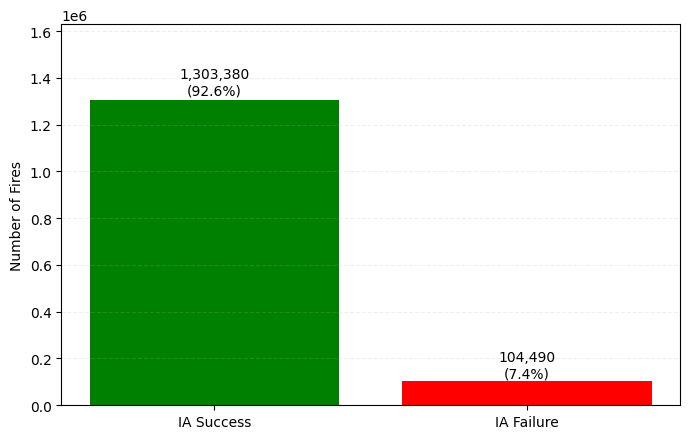

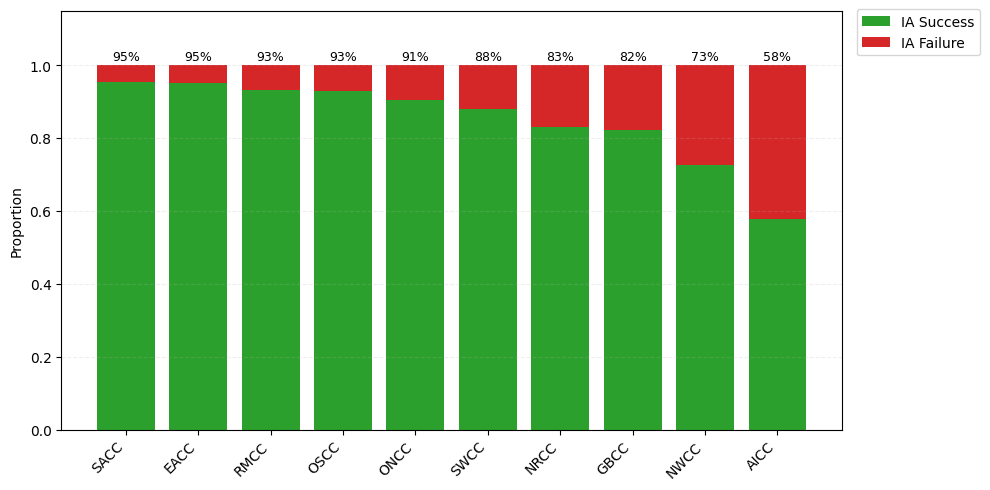

In [3]:
import pandas as pd
import numpy as np

# --- Load ---
#df = pd.read_csv(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\Data\2020_FPA_FOD_cons.csv")

# --- Robust date parsing helper (handles text dates and Excel-serial days) ---
def parse_mixed_date(series: pd.Series) -> pd.Series:
    # Try standard string parsing first
    dt = pd.to_datetime(series, errors="coerce", infer_datetime_format=True)
    # If mostly NaT and numeric, try Excel serial-day origin
    if dt.isna().mean() > 0.9 and pd.api.types.is_numeric_dtype(series):
        dt = pd.to_datetime(series, unit="D", origin="1899-12-30", errors="coerce")
    return dt

# Column names expected: 'DISCOVERY_DATE' and 'CONT_DATE'
# (Adjust here if your CSV uses different headers.)
disc = parse_mixed_date(df["DISCOVERY_DATE"])
cont = parse_mixed_date(df["CONT_DATE"])

# --- Valid date check ---
valid_mask = disc.notna() & cont.notna()
valid_count = valid_mask.sum()
total_count = len(df)

print(f"Valid rows with both DISCOVERY_DATE and CONT_DATE: {valid_count} / {total_count} "
      f"({valid_count/total_count*100:.2f}%)")

# Optional: look at first few valid rows
print(df.loc[valid_mask, ["DISCOVERY_DATE","CONT_DATE"]].head())


# --- Compute difference in whole days (negative deltas -> 0) ---
delta_days = (cont - disc).dt.total_seconds() / 86400.0
delta_days = pd.Series(delta_days).fillna(np.nan).clip(lower=0)

# event_type = 1 if containment took >1 day OR missing containment date; else 0
df["event_type"] = np.where(cont.isna() | disc.isna() | (delta_days > 1.0), 1, 0).astype(int)

# (Optional) quick check
# print(df[["DISCOVERY_DATE","CONT_DATE","event_type"]].head())

# --- New DataFrame with only valid rows ---
df_valid = df.loc[valid_mask].copy()

print(f"Filtered DataFrame shape: {df_valid.shape}")
print(df_valid[["DISCOVERY_DATE","CONT_DATE","event_type"]].head())


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assumes df already exists with column 'event_type' (0=IA success, 1=IA failure)
# If not, uncomment and set your CSV path:
# df = pd.read_csv(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\Data\2020_FPA_FOD_cons.csv")

# ---------- 1) Print success/failure ratio ----------
total = len(df_valid)
n_success = int((df_valid["event_type"] == 0).sum())
n_failure = int((df_valid["event_type"] == 1).sum())
print(f"IA Success (0) / Total: {n_success} / {total}  ({(n_success/total*100):.2f}%)")
print(f"IA Failure (1) / Total: {n_failure} / {total}  ({(n_failure/total*100):.2f}%)")

# ---------- 2) Overall counts + percentages ----------
counts = df_valid["event_type"].value_counts().reindex([0,1]).fillna(0).astype(int)
props = counts / counts.sum()

fig, ax = plt.subplots(figsize=(7,4.5))
bars = ax.bar(["IA Success", "IA Failure"], counts.values, color=["green", "red"])
for rect, c, p in zip(bars, counts.values, props.values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() * 1.01,
            f"{c:,}\n({p*100:.1f}%)", ha="center", va="bottom", fontsize=10)
#ax.set_title("Initial Attack Outcomes (Counts with %)")
ax.set_ylabel("Number of Fires")
ax.set_ylim(0, counts.max() * 1.25 if counts.max() > 0 else 1)
ax.grid(axis="y", alpha=0.2, linestyle="--")
plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_SUCCESS_24HR_FULL.png", dpi=300, bbox_inches="tight")

plt.show()

# ---------- 3) By GACCAbbrev (stacked shares and success-rate bars) ----------
gacc_col = "GACCAbbrev"
if gacc_col in df.columns:
    dfg = df_valid.dropna(subset=[gacc_col]).copy()

    gb = dfg.groupby(gacc_col)["event_type"]
    by_counts = gb.value_counts().unstack(fill_value=0).reindex(columns=[0,1], fill_value=0)
    by_counts["total"] = by_counts.sum(axis=1)

    # Compute shares
    by_share = by_counts[[0,1]].div(by_counts["total"].replace(0, np.nan), axis=0).fillna(0)

    # Sort by IA success share descending
    by_share_sorted = by_share.sort_values(0, ascending=False)
    by_counts_sorted = by_counts.loc[by_share_sorted.index]

    # --- 3a) Stacked share (IA success vs failure) by GACC ---
    fig, ax = plt.subplots(figsize=(10, max(4.5, 0.5*len(by_share_sorted))))
    ax.bar(by_share_sorted.index, by_share_sorted[0].values, label="IA Success", color="#2ca02c")
    ax.bar(by_share_sorted.index, by_share_sorted[1].values, bottom=by_share_sorted[0].values, label="IA Failure", color="#d62728")
    for i, g in enumerate(by_share_sorted.index):
        succ_pct = by_share_sorted.loc[g, 0] * 100
        ax.text(i, 1.005, f"{succ_pct:.0f}%", ha="center", va="bottom", fontsize=9)
    #ax.set_title("IA Outcomes by GACC")
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1.15)
    ax.set_xticks(range(len(by_share_sorted.index)))
    ax.set_xticklabels(by_share_sorted.index, rotation=45, ha="right")
    ax.legend(loc="upper left", bbox_to_anchor=(1.01, 1.02))
    ax.grid(axis="y", alpha=0.2, linestyle="--")
    plt.tight_layout()
    plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_SUCCESS_24HR_GACC.png", dpi=300, bbox_inches="tight")

    plt.show()


else:
    print("Column 'GACCAbbrev' not found; skipping by-GACC plots.")


# Trends Over Time - FIRE SIZE CLASS


This code cleans the FIRE_SIZE field and summarizes its distribution, reporting the total rows, 
number of valid entries, and basic stats (min, max, mean, and key percentiles). 
It gives a quick snapshot of fire size patterns across the dataset. This code summarizes annual wildfire counts and visualizes how “large” versus “small” fires change over time. 
It groups records by FIRE_YEAR, counts the total number of fires, and uses your previously defined 
event_type (1 = large per Red Book thresholds: grass/shrub [52,71,81] → size classes E–G; all other land covers → D–G) 
to compute the large count, with small = total − large. It then plots a stacked bar chart from 1992–2020 with 
small fires in light gray and large fires in firebrick, adds a grid and legend, and fixes x-axis ticks 
at key years—letting you quickly compare annual totals and the share of large fires across the time series.

C:\Users\magst\AppData\Local\Temp\ipykernel_13404\4193076285.py:19: DtypeWarning: Columns (9,11,13,14,15,16,17,52,53,60,62,63,64,307) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, skiprows=skip)


(2302521, 308)
FIRE_SIZE validity check
----------------------------------------
Total rows:                  2302521
Parsable numeric (incl 0):   2302521
  of which exactly zero:     0
Non-numeric (parse failed):  0
NaN after coercion:          0
Negative values:             0
Infinite values:             0
----------------------------------------
Valid positive FIRE_SIZE stats:
min=0.000  max=662,700.000  mean=78.178
p01=0.010  p25=0.100  p50=0.800  p75=3.000  p99=478.048


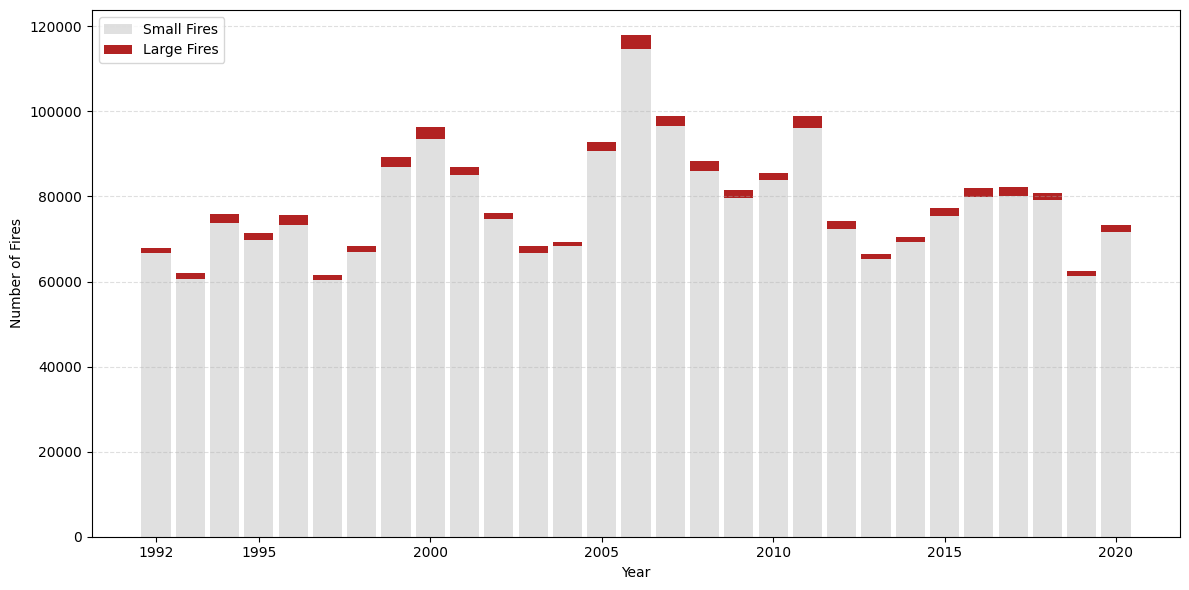

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Display head
import pandas as pd
import numpy as np

csv_path = r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\Data\FPA_FOD_Plus.csv"

# How many rows to sample (e.g., 1% of the file)
frac = 1#0.001  

# Count lines quickly
n_lines = sum(1 for _ in open(csv_path))

# Build random skip mask (keep header row)
skip = sorted(np.random.choice(np.arange(1, n_lines), size=int((n_lines-1)*(1-frac)), replace=False))

df = pd.read_csv(csv_path, skiprows=skip)

print(df.shape)

# Create binary event_type column based on FIRE_SIZE_CLASS
#df['event_type'] = df['FIRE_SIZE_CLASS'].apply(lambda x: 1 if x in ['D', 'E', 'F', 'G'] else 0)
df['event_type'] = df.apply(
    lambda row: 1 if (row['Land_Cover'] in [52, 71, 81] and row['FIRE_SIZE_CLASS'] in ['E', 'F', 'G']) 
    or (row['Land_Cover'] not in [52, 71, 81] and row['FIRE_SIZE_CLASS'] in ['D', 'E', 'F', 'G']) 
    else 0,
    axis=1
)


# --- Coerce FIRE_SIZE to numeric (without modifying original) ---
fs_raw = df["FIRE_SIZE"]
fs_num = pd.to_numeric(fs_raw, errors="coerce")

# --- Build validity masks ---
non_numeric_mask = fs_raw.notna() & fs_num.isna()          # text/etc. that failed to parse
nan_mask         = fs_num.isna()                           # missing after coercion
neg_mask         = fs_num < 0                              # negative sizes (invalid)
inf_mask         = ~np.isfinite(fs_num) & fs_num.notna()   # inf/-inf
zero_mask        = fs_num.eq(0)                            # zeros (flag separately; decide if valid)

# --- Summary ---
total = len(df)
n_non_numeric = int(non_numeric_mask.sum())
n_nan         = int(nan_mask.sum())
n_neg         = int(neg_mask.sum())
n_inf         = int(inf_mask.sum())
n_zero        = int(zero_mask.sum())
n_ok          = int((~nan_mask & ~neg_mask & ~inf_mask).sum())

print("FIRE_SIZE validity check")
print("-" * 40)
print(f"Total rows:                  {total}")
print(f"Parsable numeric (incl 0):   {n_ok}")
print(f"  of which exactly zero:     {n_zero}")
print(f"Non-numeric (parse failed):  {n_non_numeric}")
print(f"NaN after coercion:          {n_nan}")
print(f"Negative values:             {n_neg}")
print(f"Infinite values:             {n_inf}")

# --- Basic stats on valid positives ---
valid_pos = fs_num[~nan_mask & ~neg_mask & ~inf_mask & (fs_num > 0)]
if not valid_pos.empty:
    q = valid_pos.quantile([0.01, 0.25, 0.5, 0.75, 0.99]).to_dict()
    print("-" * 40)
    print("Valid positive FIRE_SIZE stats:")
    print(f"min={valid_pos.min():,.3f}  max={valid_pos.max():,.3f}  mean={valid_pos.mean():,.3f}")
    print(f"p01={q[0.01]:,.3f}  p25={q[0.25]:,.3f}  p50={q[0.5]:,.3f}  p75={q[0.75]:,.3f}  p99={q[0.99]:,.3f}")

# --- Peek at problematic entries ---
if n_non_numeric:
    print("-" * 40)
    print("Top non-numeric FIRE_SIZE values (up to 10):")
    print(fs_raw[non_numeric_mask].value_counts().head(10))

if n_neg:
    print("-" * 40)
    print("Example negative FIRE_SIZE rows (up to 5):")
    print(df.loc[neg_mask, ["FIRE_SIZE"]].head())

if n_inf:
    print("-" * 40)
    print("Example infinite FIRE_SIZE rows (up to 5):")
    print(df.loc[inf_mask, ["FIRE_SIZE"]].head())

# --- Convenience: add a clean numeric column for downstream work (optional) ---
df["FIRE_SIZE_num"] = fs_num

# ---------- Aggregate ----------
yearly = (
    df.groupby("FIRE_YEAR")["event_type"]
      .agg(total="count", large="sum")
      .reset_index()
      .sort_values("FIRE_YEAR")
)
yearly = yearly[(yearly["FIRE_YEAR"] >= 1992) & (yearly["FIRE_YEAR"] <= 2020)]
yearly["small"] = yearly["total"] - yearly["large"]

# ---------- Plot: stacked bars ----------
fig, ax = plt.subplots(figsize=(12,6))
x = yearly["FIRE_YEAR"].values

ax.bar(x, yearly["small"].values, label="Small Fires", width=0.85, alpha=0.7, color="lightgray")
ax.bar(x, yearly["large"].values, bottom=yearly["small"].values, label="Large Fires", width=0.85, color="firebrick")

ax.set_ylabel("Number of Fires")
ax.set_xlabel("Year")
#ax.set_title("Fire Size Trends by Year (1992–2020)")
ax.grid(True, linestyle="--", alpha=0.4, axis="y")
ax.legend(loc="upper left")
ax.set_ylim(0, yearly["total"].max() * 1.05)

# --- Custom x-axis ticks ---
ax.set_xticks([1992, 1995, 2000, 2005, 2010, 2015, 2020])

plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_TrendsOverTime_92_2020.png", dpi=300, bbox_inches="tight")

plt.show()


# Proportion of Annual Burned Area from Large vs. Small Fires (1992–2020)

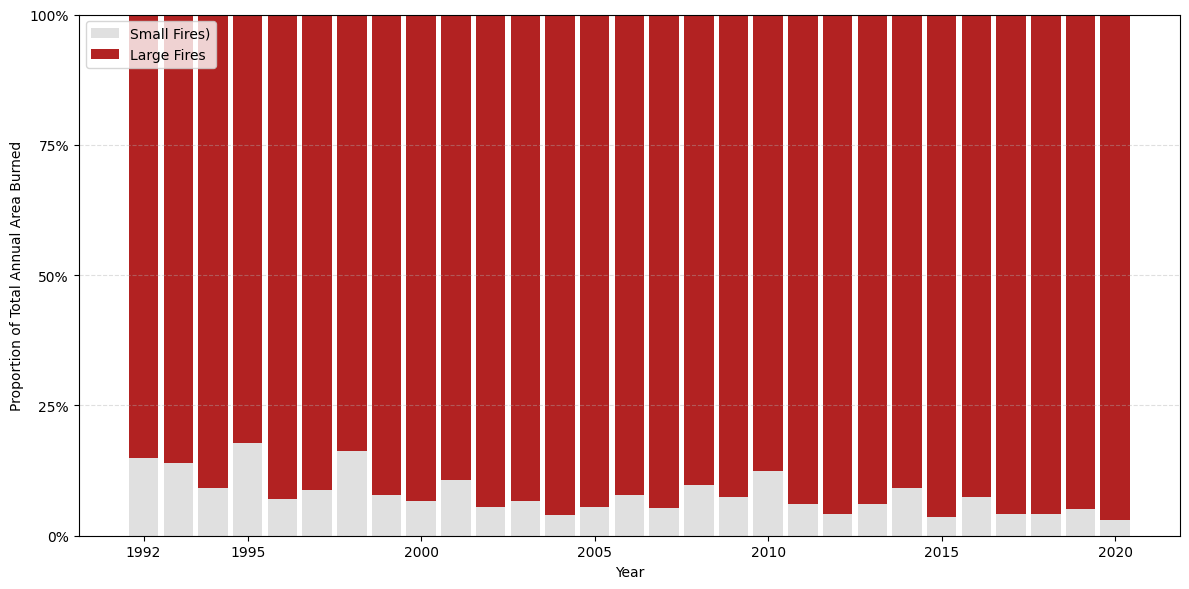

In [5]:
"""
This code calculates and visualizes how much of the total annual burned area is accounted for by large versus small fires. 
After ensuring that FIRE_SIZE is numeric and positive, the dataset is split into two categories using 
the event_type flag: large fires (event_type = 1, area recorded in large_area) and small/not large fires 
(event_type = 0, area recorded in small_area). Annual totals are then aggregated from 1992 to 2020, and 
the proportion of burned area from each category is computed relative to the yearly total. 
The resulting stacked bar chart shows the share of total burned area each year contributed by small versus large fires, 
expressed as percentages. This highlights not just the number of fires, but their relative contribution to burned area over time.
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Ensure FIRE_SIZE is numeric and valid ---
df = df.copy()
df["FIRE_SIZE"] = pd.to_numeric(df["FIRE_SIZE"], errors="coerce")
df = df.dropna(subset=["FIRE_SIZE", "FIRE_YEAR", "event_type"])
df = df[df["FIRE_SIZE"] > 0]

# --- Helper area columns by event_type (0=small, 1=large) ---
df["large_area"] = np.where(df["event_type"] == 1, df["FIRE_SIZE"], 0.0)
df["small_area"] = np.where(df["event_type"] == 0, df["FIRE_SIZE"], 0.0)

# --- Aggregate annual areas ---
yearly = (
    df.groupby("FIRE_YEAR")[["FIRE_SIZE", "large_area", "small_area"]]
      .sum()
      .rename(columns={"FIRE_SIZE": "total_area"})
      .reset_index()
      .sort_values("FIRE_YEAR")
)

# --- Filter year range ---
yearly = yearly[(yearly["FIRE_YEAR"] >= 1992) & (yearly["FIRE_YEAR"] <= 2020)].reset_index(drop=True)

# --- Proportions of total annual burned area ---
# Guard against divide-by-zero
yearly["prop_large"] = np.where(yearly["total_area"] > 0, yearly["large_area"] / yearly["total_area"], 0.0)
yearly["prop_small"] = np.where(yearly["total_area"] > 0, yearly["small_area"] / yearly["total_area"], 0.0)

# --- Plot: stacked proportions (sum to 1.0) ---
fig, ax = plt.subplots(figsize=(12,6))
x = yearly["FIRE_YEAR"].values

ax.bar(x, yearly["prop_small"].values, label="Small Fires)", width=0.85, alpha=0.7, color="lightgray")
ax.bar(x, yearly["prop_large"].values, bottom=yearly["prop_small"].values, label="Large Fires", width=0.85, color="firebrick")

ax.set_ylabel("Proportion of Total Annual Area Burned")
ax.set_xlabel("Year")
ax.grid(True, linestyle="--", alpha=0.4, axis="y")
ax.legend(loc="upper left")
ax.set_ylim(0, 1.0)

# --- Percent y-ticks ---
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels([f"{int(v*100)}%" for v in [0, 0.25, 0.5, 0.75, 1.0]])

# --- Custom x-axis ticks ---
ax.set_xticks([1992, 1995, 2000, 2005, 2010, 2015, 2020])

plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_TrendsProportionOverTime_AnnualBurnedArea_92_2020.png", dpi=300, bbox_inches="tight")

plt.show()


# TRENDS in IA success rates over time


This code tracks trends in initial attack (IA) success over time by calculating the yearly proportion of fires that remained small (event_type = 0). It aggregates the number of total fires and large fires per year, then derives the share classified as IA successes # versus failures. The resulting  plot, covering 1992–2020, shows the IA success rate as a percentage of all reported fires each year, providing a clear view of how containment effectiveness has varied across time.

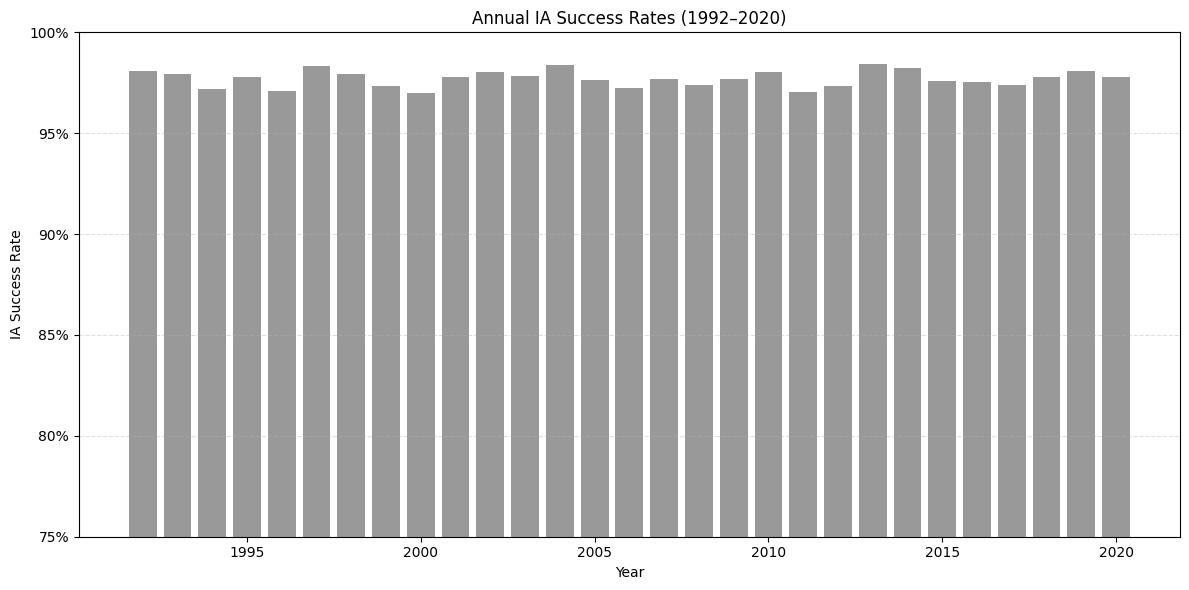

In [6]:

import pandas as pd
import matplotlib.pyplot as plt

# --- Aggregate by year ---
yearly = (
    df.groupby("FIRE_YEAR")["event_type"]
      .agg(total="count", n_large="sum")  # large fires are 1s
      .reset_index()
      .sort_values("FIRE_YEAR")
)

# IA success = proportion of small fires (event_type = 0)
yearly["n_small"] = yearly["total"] - yearly["n_large"]
yearly["ia_success_rate"] = yearly["n_small"] / yearly["total"]

# Filter to desired year range
yearly = yearly[(yearly["FIRE_YEAR"] >= 1992) & (yearly["FIRE_YEAR"] <= 2020)]

# --- Bar chart ---
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(yearly["FIRE_YEAR"], yearly["ia_success_rate"], color="grey", width=0.8, alpha =0.8)

ax.set_ylabel("IA Success Rate")
ax.set_xlabel("Year")
ax.set_ylim(0.75,1)
#ax.set_yticks([0,0.25,0.5,0.75,1.0])
ax.set_yticks([0.75,0.80, 0.85, 0.9, 0.95,1.0])
ax.set_yticklabels([f"{int(v*100)}%" for v in [0.75,0.80, 0.85, 0.90, 0.95, 1.0]])

ax.set_title("Annual IA Success Rates (1992–2020)")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_TrendsProportionOverTimea_92_2020.png", dpi=300, bbox_inches="tight")

plt.show()


# IA success stratafied by Agency

This code calculates and visualizes Initial Attack (IA) success rates over time, broken down by 
SOURCE_SYSTEM_TYPE (federal, nonfederal, interagency)

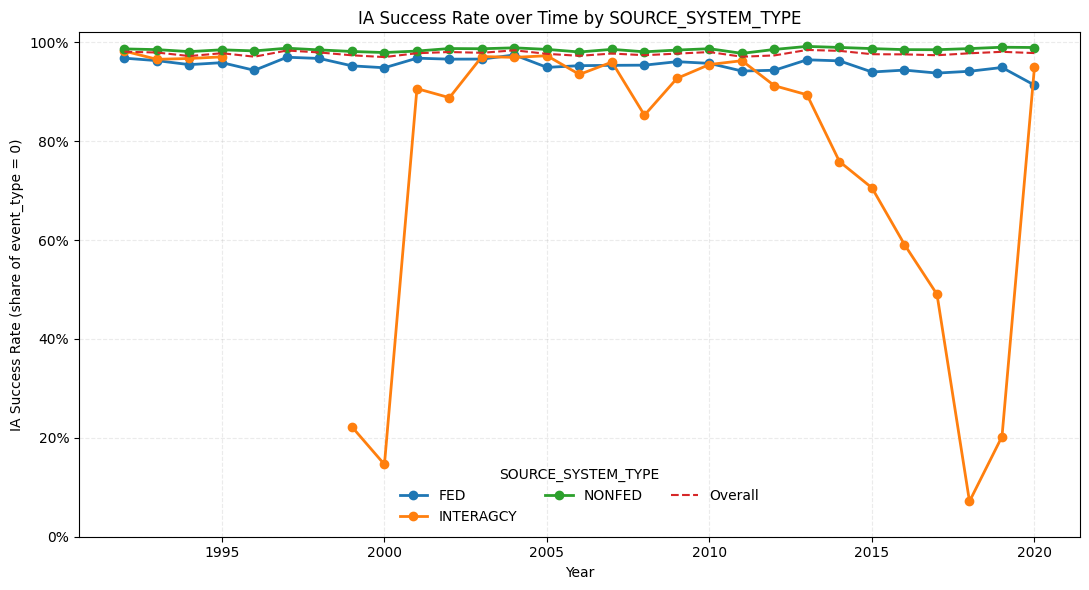

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# --- Config ---
SOURCE_COL = "SOURCE_SYSTEM_TYPE"     # 'federal' / 'nonfederal' / 'interagency' (strings in your df)
EVENT_COL  = "event_type"             # 0 = IA success, 1 = IA failure
YEAR_CANDIDATES = ["FIRE_YEAR", "Year", "DISCOVERY_DATE"]  # will auto-pick from these
MIN_GROUP_N = 20   # optional: hide points for (year, source) groups with very small n to reduce noise

# --- Choose year column robustly ---
if "FIRE_YEAR" in df.columns:
    year = df["FIRE_YEAR"].astype(int)
elif "Year" in df.columns:
    year = df["Year"].astype(int)
elif "DISCOVERY_DATE" in df.columns:
    # handles 'mm/dd/yyyy' strings or datetime; coerce errors to NaT then drop
    disc = pd.to_datetime(df["DISCOVERY_DATE"], errors="coerce")
    year = disc.dt.year
else:
    raise KeyError("No year-like column found. Provide FIRE_YEAR, Year, or DISCOVERY_DATE.")

# --- Build working frame ---
w = df.copy()
w["__year__"] = year
w["__source__"] = w[SOURCE_COL].astype(str)
w["__is_success__"] = (w[EVENT_COL] == 0).astype(int)  # 0=IA success
w = w.dropna(subset=["__year__", "__source__"])

# --- Aggregate: IA success rate by year x SOURCE_SYSTEM_TYPE ---
grp = w.groupby(["__year__", "__source__"])
agg = grp.agg(
    n=("__is_success__", "size"),
    succ_rate=("__is_success__", "mean")
).reset_index().rename(columns={"__year__": "year", "__source__": "source"})

# Optional: mask very small (year,source) groups
agg.loc[agg["n"] < MIN_GROUP_N, "succ_rate"] = np.nan

# --- Pivot to wide for plotting (rows=years, cols=source types) ---
years_sorted = np.sort(agg["year"].unique())
sources_sorted = sorted(agg["source"].unique())
wide = agg.pivot(index="year", columns="source", values="succ_rate").reindex(index=years_sorted, columns=sources_sorted)

# --- Plot ---
fig, ax = plt.subplots(figsize=(11, 6))
for src in wide.columns:
    ax.plot(wide.index, wide[src].values, marker="o", linewidth=2, label=src)

# Add overall dashed line (overall IA success rate by year across all sources)
overall = w.groupby("__year__")["__is_success__"].mean().reindex(years_sorted)
ax.plot(years_sorted, overall.values, linestyle="--", linewidth=1.5, label="Overall")

# Annotate last available point for each source with % and n
last_pts = (
    agg.sort_values("year")
       .dropna(subset=["succ_rate"])
       .groupby("source")
       .tail(1)
)
#for _, r in last_pts.iterrows():
#    ax.text(r["year"], r["succ_rate"], f" {r['succ_rate']*100:.1f}% (n={int(r['n']):,})", va="center")

ax.set_title("IA Success Rate over Time by SOURCE_SYSTEM_TYPE")
ax.set_xlabel("Year")
ax.set_ylabel("IA Success Rate (share of event_type = 0)")
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylim(0, 1.02)
ax.grid(axis="both", linestyle="--", alpha=0.25)
ax.legend(title="SOURCE_SYSTEM_TYPE", ncol=3, frameon=False)
plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_SuccessByAgency.png", dpi=300, bbox_inches="tight")
plt.show()


# CONUS IA Outcomes with Spatial Distribution

This code maps wildfire initial attack outcomes (successes vs. failures) 
across the continental U.S. It filters fires to those within the CONUS extent, 
plots their locations as scatter points, and adds marginal histograms showing 
how fire area is distributed by longitude and latitude. Separate maps are created 
for IA successes (green) and failures (red), giving a clear spatial view of where different outcomes occur and how fire size contributes across regions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter

# ---------- OPTIONAL MAP BACKGROUND (cartopy) ----------
try:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    HAS_CARTOPY = True
except Exception:
    HAS_CARTOPY = False
    warnings.warn("cartopy not available; plotting without map background.")

# ---------- CONFIG ----------
EVENT_COL = "event_type"     # 0 = IA success, 1 = IA failure
LAT_COL   = "LATITUDE"
LON_COL   = "LONGITUDE"
AREA_COL  = "FIRE_SIZE"      # acres; if missing, area-weight will default to 1
CONUS_EXTENT = (-125.0, -66.0, 24.0, 50.0)  # (min_lon, max_lon, min_lat, max_lat)
SCATTER_SAMPLE_N = 300_000                 # downsample points for map speed
LON_BINS, LAT_BINS = 70, 45                # resolution for marginal histograms
USE_LOG_AREA = False                       # set True to plot log1p(area) on hist axes

# ---------- PADDING KNOBS (tweak here) ----------
FIG_SIZE = (12, 10)        # overall figure size
BORDER_PAD = dict(left=0.06, right=0.98, bottom=0.06, top=0.93)  # outer whitespace
HIST_SIZE = "18%"          # thickness of the top/right histograms
HIST_PAD  = 0.25           # gap between map and hist axes (in inch-ish units)
TITLE_PAD = 14             # space between title and map
TICK_PAD  = 4              # tick label padding
HIST_ALPHA = 0.6

# ---------- HELPERS ----------
def _area_weights(series):
    if series is None:
        return None
    arr = pd.to_numeric(series, errors="coerce").fillna(0).clip(lower=0).to_numpy()
    return np.log1p(arr) if USE_LOG_AREA else arr

def _format_area(val, _pos=None):
    if USE_LOG_AREA:
        return f"{np.expm1(val)/1_000:.1f}k"
    else:
        return f"{val/1_000:.1f}k"

def plot_conus_ia(df, event_value, title, color):
    # ---- validate cols ----
    for c in (LAT_COL, LON_COL, EVENT_COL):
        if c not in df.columns:
            raise KeyError(f"Missing required column: {c}")

    # ---- subset + clean ----
    w = df[[LAT_COL, LON_COL, EVENT_COL] + ([AREA_COL] if AREA_COL in df.columns else [])].copy()
    w[LAT_COL] = pd.to_numeric(w[LAT_COL], errors="coerce")
    w[LON_COL] = pd.to_numeric(w[LON_COL], errors="coerce")
    w = w.dropna(subset=[LAT_COL, LON_COL, EVENT_COL])
    lon_min, lon_max, lat_min, lat_max = CONUS_EXTENT
    w = w[(w[LON_COL] >= lon_min) & (w[LON_COL] <= lon_max) &
          (w[LAT_COL] >= lat_min) & (w[LAT_COL] <= lat_max)]
    w = w[w[EVENT_COL] == event_value].copy()

    # ---- weights for "area across lat/long" ----
    weights = _area_weights(w[AREA_COL]) if AREA_COL in w.columns else None
    if weights is None:
        weights = np.ones(len(w), dtype=float)

    # ---- scatter sample (for speed only) ----
    ws = w
    if len(ws) > SCATTER_SAMPLE_N:
        ws = ws.sample(SCATTER_SAMPLE_N, random_state=42)

    # ---- histograms (use full set, not sampled) ----
    lon_hist, lon_edges = np.histogram(w[LON_COL].to_numpy(), bins=LON_BINS,
                                       range=(lon_min, lon_max), weights=weights)
    lat_hist, lat_edges = np.histogram(w[LAT_COL].to_numpy(), bins=LAT_BINS,
                                       range=(lat_min, lat_max), weights=weights)

    # ---- figure ----
    fig = plt.figure(figsize=FIG_SIZE)

    if HAS_CARTOPY:
        proj = ccrs.PlateCarree()
        ax_map = fig.add_subplot(111, projection=proj)
        ax_map.set_extent(CONUS_EXTENT, crs=ccrs.PlateCarree())
        ax_map.add_feature(cfeature.LAND, alpha=0.05)
        ax_map.add_feature(cfeature.OCEAN, alpha=0.05)
        ax_map.add_feature(cfeature.COASTLINE, linewidth=0.7)
        ax_map.add_feature(cfeature.BORDERS, linewidth=0.5)
        try:
            ax_map.add_feature(cfeature.STATES, edgecolor="gray", linewidth=0.3)
        except Exception:
            pass
        ax_map.scatter(ws[LON_COL].to_numpy(), ws[LAT_COL].to_numpy(),
                       s=4, alpha=0.35, transform=ccrs.PlateCarree(),
                       linewidths=0, marker="o", color=color)

        # Nice degree ticks with padding
        ax_map.set_xticks(np.arange(lon_min, lon_max+1, 10), crs=ccrs.PlateCarree())
        ax_map.set_yticks(np.arange(lat_min, lat_max+1, 5), crs=ccrs.PlateCarree())
        ax_map.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
        ax_map.yaxis.set_major_formatter(LatitudeFormatter())
        ax_map.tick_params(axis="both", pad=TICK_PAD)

        # Title with extra space
        outcome = "IA Success (0)" if event_value == 0 else "IA Failure (1)"
        #ax_map.set_title(f"{title} — {outcome}  (n={len(w):,})", pad=TITLE_PAD)

        # Top/right hist axes with explicit padding
        divider = make_axes_locatable(ax_map)
        ax_top   = divider.append_axes("top",   size=HIST_SIZE, pad=HIST_PAD,  axes_class=plt.Axes)
        ax_right = divider.append_axes("right", size=HIST_SIZE, pad=HIST_PAD,  axes_class=plt.Axes)

        ax_top.bar((lon_edges[:-1] + lon_edges[1:]) / 2.0, lon_hist,
                   width=(lon_edges[1] - lon_edges[0]), align="center",
                   alpha=HIST_ALPHA, edgecolor="none", color=color)
        ax_top.set_xlim(lon_min, lon_max)
        ax_top.set_ylabel("Area (acres)" + (" [log1p]" if USE_LOG_AREA else ""))
        ax_top.yaxis.set_major_formatter(FuncFormatter(_format_area))
        ax_top.tick_params(axis='x', labelbottom=False, pad=TICK_PAD)
        ax_top.grid(axis="y", linestyle="--", alpha=0.2)
        ax_top.margins(x=0.02)

        ax_right.barh((lat_edges[:-1] + lat_edges[1:]) / 2.0, lat_hist,
                      height=(lat_edges[1] - lat_edges[0]), align="center",
                      alpha=HIST_ALPHA, edgecolor="none", color=color)
        ax_right.set_ylim(lat_min, lat_max)
        ax_right.set_xlabel("Area (acres)" + (" [log1p]" if USE_LOG_AREA else ""))
        ax_right.xaxis.set_major_formatter(FuncFormatter(_format_area))
        ax_right.tick_params(axis='y', labelleft=False, pad=TICK_PAD)
        ax_right.grid(axis="x", linestyle="--", alpha=0.2)
        ax_right.margins(y=0.02)

    else:
        from matplotlib.gridspec import GridSpec
        gs = GridSpec(nrows=2, ncols=2, width_ratios=[4, 1.1], height_ratios=[1.1, 4],
                      hspace=0.15, wspace=0.15)
        ax_map = fig.add_subplot(gs[1, 0])
        ax_map.scatter(ws[LON_COL].to_numpy(), ws[LAT_COL].to_numpy(),
                       s=4, alpha=0.35, linewidths=0, color=color)
        ax_map.set_xlim(lon_min, lon_max)
        ax_map.set_ylim(lat_min, lat_max)
        ax_map.set_xlabel("Longitude")
        ax_map.set_ylabel("Latitude")
        ax_map.grid(alpha=0.25, linestyle="--")
        outcome = "IA Success (0)" if event_value == 0 else "IA Failure (1)"
        ax_map.set_title(f"{title} — {outcome}  (n={len(w):,})", pad=TITLE_PAD)

        ax_top = fig.add_subplot(gs[0, 0])
        ax_top.bar((lon_edges[:-1] + lon_edges[1:]) / 2.0, lon_hist,
                   width=(lon_edges[1] - lon_edges[0]), align="center",
                   alpha=HIST_ALPHA, edgecolor="none", color=color)
        ax_top.set_xlim(lon_min, lon_max)
        ax_top.set_ylabel("Area (acres)" + (" [log1p]" if USE_LOG_AREA else ""))
        ax_top.yaxis.set_major_formatter(FuncFormatter(_format_area))
        ax_top.tick_params(axis='x', labelbottom=False, pad=TICK_PAD)
        ax_top.grid(axis="y", linestyle="--", alpha=0.2)

        ax_right = fig.add_subplot(gs[1, 1])
        ax_right.barh((lat_edges[:-1] + lat_edges[1:]) / 2.0, lat_hist,
                      height=(lat_edges[1] - lat_edges[0]), align="center",
                      alpha=HIST_ALPHA, edgecolor="none", color=color)
        ax_right.set_ylim(lat_min, lat_max)
        ax_right.set_xlabel("Area (acres)" + (" [log1p]" if USE_LOG_AREA else ""))
        ax_right.xaxis.set_major_formatter(FuncFormatter(_format_area))
        ax_right.tick_params(axis='y', labelleft=False, pad=TICK_PAD)
        ax_right.grid(axis="x", linestyle="--", alpha=0.2)

        ax_corner = fig.add_subplot(gs[0, 1])
        ax_corner.axis("off")

    # Outer whitespace padding (don’t use tight_layout with axes_divider)
    plt.subplots_adjust(**BORDER_PAD)
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")

    plt.show()


# ---------- SUBSET df first ----------
lon_min, lon_max, lat_min, lat_max = CONUS_EXTENT
mask_inside = (
    (df[LON_COL] >= lon_min) & (df[LON_COL] <= lon_max) &
    (df[LAT_COL] >= lat_min) & (df[LAT_COL] <= lat_max)
)
print("Rows outside CONUS extent:", (~mask_inside).sum())
df_conus = df.loc[mask_inside].copy()

# ---------- RUN: one figure for successes, one for failures ----------
plot_conus_ia(df_conus, event_value=0, title="CONUS IA Outcomes", color="green",  savepath=r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\CONUS_Success.png")
plot_conus_ia(df_conus, event_value=1, title="CONUS IA Outcomes", color="red",  savepath=r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\CONUS_Failures.png")


Rows outside CONUS extent: 47367


# ALASKA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter

# ---------- OPTIONAL MAP BACKGROUND (cartopy) ----------
try:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.ticker as mticker
    HAS_CARTOPY = True
except Exception:
    HAS_CARTOPY = False
    warnings.warn("cartopy not available; plotting without map background.")

# ---------- CONFIG (ALASKA ONLY) ----------
EVENT_COL = "event_type"     # 0 = IA success, 1 = IA failure
LAT_COL   = "LATITUDE"
LON_COL   = "LONGITUDE"
AREA_COL  = "FIRE_SIZE"      # acres; if missing, area-weight will default to 1

ALASKA_EXTENT = (-180.0, -129.0, 50.0, 72.0)   # (min_lon, max_lon, min_lat, max_lat)
SCATTER_SAMPLE_N = 300_000                     # downsample points for map speed
LON_BINS, LAT_BINS = 60, 35                    # histogram resolution for AK
USE_LOG_AREA = False                           # set True to plot log1p(area) on hist axes

# ---------- POINTS ----------
POINT_SIZE = 6              # constant size
POINT_ALPHA = 0.35
POINT_EDGEWIDTH = 0.0
POINT_MARKER = "o"
POINT_COLOR_SUCCESS = "green"
POINT_COLOR_FAILURE = "red"

# ---------- PADDING KNOBS ----------
FIG_SIZE   = (12, 10)
BORDER_PAD = dict(left=0.06, right=0.98, bottom=0.06, top=0.93)
HIST_SIZE  = "18%"      # thickness of the top/right histograms
HIST_PAD   = 0.25       # gap between map and hist axes
TITLE_PAD  = 14
TICK_PAD   = 4
HIST_ALPHA = 0.6

# ---------- HELPERS ----------
def _wrap_lon_180(lon):
    # ensure longitudes are in [-180, 180]
    return ((lon + 180) % 360) - 180

def _area_weights(series):
    if series is None:
        return None
    arr = pd.to_numeric(series, errors="coerce").fillna(0).clip(lower=0).to_numpy()
    return np.log1p(arr) if USE_LOG_AREA else arr

def _format_area(val, _pos=None):
    return f"{(np.expm1(val) if USE_LOG_AREA else val)/1_000:.1f}k"

def plot_alaska_ia(df, event_value, title, color):
    # ---- required cols ----
    for c in (LAT_COL, LON_COL, EVENT_COL):
        if c not in df.columns:
            raise KeyError(f"Missing required column: {c}")

    # ---- subset/clean ----
    cols = [LAT_COL, LON_COL, EVENT_COL] + ([AREA_COL] if AREA_COL in df.columns else [])
    w = df[cols].copy()
    w[LAT_COL] = pd.to_numeric(w[LAT_COL], errors="coerce")
    w[LON_COL] = pd.to_numeric(w[LON_COL], errors="coerce")
    w = w.dropna(subset=[LAT_COL, LON_COL, EVENT_COL])

    # Wrap to [-180,180] then clip to Alaska box
    lon_min, lon_max, lat_min, lat_max = ALASKA_EXTENT
    w[LON_COL] = _wrap_lon_180(w[LON_COL].to_numpy())
    w = w[(w[LON_COL] >= lon_min) & (w[LON_COL] <= lon_max) &
          (w[LAT_COL] >= lat_min) & (w[LAT_COL] <= lat_max)]
    w = w[w[EVENT_COL] == event_value].copy()

    # ---- weights for histograms (area or counts) ----
    weights = _area_weights(w[AREA_COL]) if AREA_COL in w.columns else None
    if weights is None:
        weights = np.ones(len(w), dtype=float)

    # ---- sample for scatter speed ----
    ws = w if len(w) <= SCATTER_SAMPLE_N else w.sample(SCATTER_SAMPLE_N, random_state=42)

    # ---- construct EXACTLY matching bin edges to extent (prevents visual misalignment) ----
    lon_edges = np.linspace(lon_min, lon_max, LON_BINS + 1)
    lat_edges = np.linspace(lat_min, lat_max, LAT_BINS + 1)

    # hist using those edges
    lon_hist, _ = np.histogram(w[LON_COL].to_numpy(), bins=lon_edges, weights=weights)
    lat_hist, _ = np.histogram(w[LAT_COL].to_numpy(), bins=lat_edges, weights=weights)

    # ---- figure ----
    fig = plt.figure(figsize=FIG_SIZE)

    if HAS_CARTOPY:
        # Albers for Alaska; points/gridlines supplied in geographic PlateCarree
        proj = ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=63,
                                    standard_parallels=(55, 65))

        #proj = ccrs.PlateCarree()

        
        ax_map = fig.add_subplot(111, projection=proj)
        ax_map.set_extent(ALASKA_EXTENT, crs=ccrs.PlateCarree())

        # background
        ax_map.add_feature(cfeature.LAND, alpha=0.05)
        ax_map.add_feature(cfeature.OCEAN, alpha=0.05)
        ax_map.add_feature(cfeature.COASTLINE, linewidth=0.7)
        ax_map.add_feature(cfeature.BORDERS, linewidth=0.5)
        try:
            ax_map.add_feature(cfeature.STATES, edgecolor="gray", linewidth=0.3)
        except Exception:
            pass

        # points (PlateCarree data CRS)
        ax_map.scatter(ws[LON_COL].to_numpy(), ws[LAT_COL].to_numpy(),
                       s=POINT_SIZE, alpha=POINT_ALPHA, transform=ccrs.PlateCarree(),
                       linewidths=POINT_EDGEWIDTH, marker=POINT_MARKER, color=color)

        # title
        outcome = "IA Success (0)" if event_value == 0 else "IA Failure (1)"
        #ax_map.set_title(f"Alaska — {title}: {outcome} (n={len(w):,})", pad=TITLE_PAD)

        # gridlines with labels (safer than set_xticks for non-rectangular projections)
        gl = ax_map.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=0.2, color="gray", alpha=0.6, linestyle="--")
        gl.xlocator = mticker.FixedLocator(np.arange(lon_min, lon_max + 1, 10))
        gl.ylocator = mticker.FixedLocator(np.arange(lat_min, lat_max + 1, 5))
        gl.xformatter = LongitudeFormatter(zero_direction_label=True)
        gl.yformatter = LatitudeFormatter()
        gl.right_labels = False
        gl.top_labels = False
        gl.xlabel_style = {"size": 9}
        gl.ylabel_style = {"size": 9}

        # attach hist axes that MATCH map box exactly
        divider = make_axes_locatable(ax_map)
        ax_top   = divider.append_axes("top",   size=HIST_SIZE, pad=HIST_PAD,  axes_class=plt.Axes)
        ax_right = divider.append_axes("right", size=HIST_SIZE, pad=HIST_PAD,  axes_class=plt.Axes)

        # TOP: longitude histogram aligned by LEFT edges of bins
        ax_top.bar(lon_edges[:-1], lon_hist, width=np.diff(lon_edges), align="edge",
                   alpha=HIST_ALPHA, edgecolor="none", color=color)
        ax_top.set_xlim(lon_min, lon_max)
        ax_top.set_ylabel("Area (acres)" + (" [log1p]" if USE_LOG_AREA else ""))
        ax_top.yaxis.set_major_formatter(FuncFormatter(_format_area))
        ax_top.tick_params(axis='x', labelbottom=False, pad=TICK_PAD)
        ax_top.grid(axis="y", linestyle="--", alpha=0.2)

        # RIGHT: latitude histogram aligned by LOWER edges of bins
        ax_right.barh(lat_edges[:-1], lat_hist, height=np.diff(lat_edges), align="edge",
                      alpha=HIST_ALPHA, edgecolor="none", color=color)
        ax_right.set_ylim(lat_min, lat_max)
        ax_right.set_xlabel("Area (acres)" + (" [log1p]" if USE_LOG_AREA else ""))
        ax_right.xaxis.set_major_formatter(FuncFormatter(_format_area))
        ax_right.tick_params(axis='y', labelleft=False, pad=TICK_PAD)
        ax_right.grid(axis="x", linestyle="--", alpha=0.2)

    else:
        # Fallback (no map); limits still match exactly to edges
        from matplotlib.gridspec import GridSpec
        gs = GridSpec(nrows=2, ncols=2, width_ratios=[4, 1.1], height_ratios=[1.1, 4],
                      hspace=0.15, wspace=0.15)
        ax_map = fig.add_subplot(gs[1, 0])
        ax_map.scatter(ws[LON_COL].to_numpy(), ws[LAT_COL].to_numpy(),
                       s=POINT_SIZE, alpha=POINT_ALPHA, linewidths=POINT_EDGEWIDTH,
                       marker=POINT_MARKER, color=color)
        ax_map.set_xlim(lon_min, lon_max)
        ax_map.set_ylim(lat_min, lat_max)
        ax_map.set_xlabel("Longitude")
        ax_map.set_ylabel("Latitude")
        ax_map.grid(alpha=0.25, linestyle="--")
        outcome = "IA Success (0)" if event_value == 0 else "IA Failure (1)"
        ax_map.set_title(f"Alaska — {title}: {outcome} (n={len(w):,})", pad=TITLE_PAD)

        ax_top = fig.add_subplot(gs[0, 0])
        ax_top.bar(lon_edges[:-1], lon_hist, width=np.diff(lon_edges), align="edge",
                   alpha=HIST_ALPHA, edgecolor="none", color=color)
        ax_top.set_xlim(lon_min, lon_max)
        ax_top.set_ylabel("Area (acres)" + (" [log1p]" if USE_LOG_AREA else ""))
        ax_top.yaxis.set_major_formatter(FuncFormatter(_format_area))
        ax_top.tick_params(axis='x', labelbottom=False, pad=TICK_PAD)
        ax_top.grid(axis="y", linestyle="--", alpha=0.2)

        ax_right = fig.add_subplot(gs[1, 1])
        ax_right.barh(lat_edges[:-1], lat_hist, height=np.diff(lat_edges), align="edge",
                      alpha=HIST_ALPHA, edgecolor="none", color=color)
        ax_right.set_ylim(lat_min, lat_max)
        ax_right.set_xlabel("Area (acres)" + (" [log1p]" if USE_LOG_AREA else ""))
        ax_right.xaxis.set_major_formatter(FuncFormatter(_format_area))
        ax_right.tick_params(axis='y', labelleft=False, pad=TICK_PAD)
        ax_right.grid(axis="x", linestyle="--", alpha=0.2)

        ax_corner = fig.add_subplot(gs[0, 1])
        ax_corner.axis("off")

    # Outer whitespace padding
    plt.subplots_adjust(**BORDER_PAD)
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()


# ---------- Optional: counts inside Alaska ----------
lon_min, lon_max, lat_min, lat_max = ALASKA_EXTENT
lon_wrapped = _wrap_lon_180(df[LON_COL].to_numpy())
mask_alaska = (
    (lon_wrapped >= lon_min) & (lon_wrapped <= lon_max) &
    (df[LAT_COL] >= lat_min) & (df[LAT_COL] <= lat_max)
)
print("Rows inside Alaska extent:", mask_alaska.sum(), " — outside:", (~mask_alaska).sum())

# ---------- RUN ----------
plot_alaska_ia(df, event_value=0, title="IA Outcomes", color=POINT_COLOR_SUCCESS, savepath=r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\AK_Success.png")
plot_alaska_ia(df, event_value=1, title="IA Outcomes", color=POINT_COLOR_FAILURE, savepath=r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\AK_Failure.png")


# IA Outcomes by Vegetation Type

Parses the EVT mapping, auto-detects the correct keyspace, maps codes to vegetation labels

In [ ]:
# Map EVT codes to human-readable labels for your stacked bar, then plot.

import io
import re
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1) PASTE YOUR MAPPING TEXT
# =========================
EVT_BLOCK = r"""
VALUE	EVT_NAME	LFRDB	EVT_FUEL	EVT_FUEL_N	EVT_LF	EVT_PHYS
-9999	Fill-NoData	-9999	-9999	Fill-NoData	Fill-NoData	Fill-NoData
4401	Alaska Arctic Coastal Sedge-Dwarf-Shrubland	4401	2701	Sh Alaska Arctic Coastal Sedge-Dwarf-Shrubland	Shrub	Shrubland
4402	Alaska Arctic Floodplain Forest	4402	2715	Sh Alaska Arctic Floodplain	Tree	Riparian
4403	Alaska Arctic Large River Floodplain Forest	4403	2714	Tr Alaska Arctic Large River Floodplain	Tree	Riparian
4404	Alaska Arctic Mesic Alder Shrubland	4404	2638	Sh Alaska Arctic Mesic Alder Shrubland	Shrub	Shrubland
4405	Alaska Arctic Permafrost Plateau Dwarf-Shrub Lichen Tundra	4405	2704	Sh Alaska Arctic Permafrost Plateau Dwarf-Shrub Lichen Tundra	Shrub	Shrubland
4406	Alaska Arctic Tidal Flat	4406	2710	Sps Alaska Arctic Tidal Flat	Sparse	Sparsely Vegetated
4407	Alaska Sub-boreal and Maritime Alpine Mesic Herbaceous Meadow	4407	2645	He Alaska Sub-boreal and Maritime Alpine Mesic Herbaceous Meadow	Herb	Grassland
4408	Alaska Sub-boreal Mesic Subalpine Alder Shrubland	4408	4408	Sh Alaska Sub-boreal Mesic Subalpine Alder Shrubland	Shrub	Shrubland
4409	Alaska Sub-boreal Mountain Hemlock-White Spruce Forest	4409	2678	Tr Alaska Sub-boreal Mountain Hemlock-White Spruce Forest	Tree	Conifer
4410	Alaska Sub-boreal White-Lutz Spruce Forest and Woodland	4410	2677	Tr Alaska Sub-boreal White-Lutz Spruce Forest and Woodland	Tree	Conifer
4411	Alaskan Pacific Acidic Shrub Peatland	4411	4411	Sh Alaskan Pacific Acidic Shrub-Sedge Peatland	Shrub	Riparian
4412	Alaskan Pacific Alpine-Subalpine Dwarf-shrubland & Heath	4412	4412	Sh Alaskan Pacific Alpine-Subalpine Dwarf-shrubland & Heath	Shrub	Shrubland
4413	Alaskan Pacific Floodplain Conifer Forest	4413	4413	Tr Alaskan Pacific Floodplain Conifer Forest	Tree	Riparian
4414	Alaskan Pacific Maritime Alpine Floodplain Shrubland	4414	2676	Sh Alaskan Pacific Maritime Alpine Floodplain	Shrub	Riparian
4415	Alaskan Pacific Maritime Avalanche Slope Shrubland	4415	2680	Sh Alaskan Pacific Maritime Avalanche Slope Shrubland	Shrub	Shrubland
4416	Alaskan Pacific Maritime Coastal Meadow and Slough-Levee	4416	2665	He Alaskan Pacific Maritime Coastal Meadow and Slough-Levee	Herb	Grassland
4417	Alaskan Pacific Maritime Mesic Herbaceous Meadow	4417	2653	He Alaskan Pacific Maritime Mesic Herbaceous Meadow	Herb	Grassland
4418	Alaskan Pacific Maritime Mountain Hemlock-Shore Pine Peatland	4418	4418	Tr Alaskan Pacific Maritime Mountain Hemlock-Shore Pine Peatland	Tree	Conifer
4419	Alaskan Pacific Maritime Western Hemlock Forest	4419	2646	Tr Alaskan Pacific Maritime Western Hemlock Forest	Tree	Conifer
4420	Alaskan Pacific Mesic Western Hemlock-Yellow-cedar Forest	4420	2040	Tr Alaskan Pacific Mesic Western Hemlock-Yellow-cedar Forest	Tree	Conifer
4421	Alaskan Pacific Mountain Hemlock Forest and Subalpine Woodland 	4421	4421	Tr Alaskan Pacific Mountain Hemlock Forest and Subalpine Woodland 	Tree	Conifer
4422	Alaskan Pacific Poorly Drained Conifer Woodland	4422	2681	Tr Alaskan Pacific Poorly Drained Conifer Woodland	Tree	Conifer
4423	Alaskan Pacific Sitka Spruce Forest and Beach Ridge	4423	4423	Tr Alaskan Pacific Sitka Spruce Forest and Beach Ridge	Tree	Conifer
4424	Alaskan Pacific Wet Low Shrubland & Floodplain Wetland	4424	4424	Sh Alaskan Pacific Wet Low Shrubland & Floodplain Wetland	Shrub	Riparian
4425	Alaskan Pacific-Aleutian Alder-Salmonberry-Copperbush Shrubland	4425	4425	Sh Alaskan Pacific-Aleutian Alder-Salmonberry-Copperbush Shrubland	Shrub	Shrubland
4426	Alaskan Pacific-Aleutian Coastal Dune Beach and Beach Meadow	4426	4426	He Alaskan Pacific-Aleutian Coastal Dune Beach and Beach Meadow	Herb	Grassland
4427	Alaskan Pacific-Aleutian Fen and Wet Meadow	4427	4427	He Alaskan Pacific-Aleutian Fen and Wet Meadow	Herb	Riparian
4428	Alaskan Pacific-Aleutian Rocky Coastline and Sea Cliff	4428	2794	Sps Pacific Maritime Sparsely Vegetated	Sparse	Sparsely Vegetated
4429	Aleutian Ericaceous Dwarf-shrubland Heath and Fell-field	4429	4429	Sh Aleutian Ericaceous Dwarf-shrubland Heath and Fell-field	Shrub	Shrubland
4430	Aleutian Mesic Herbaceous Meadow	4430	2651	He Aleutian Mesic Herbaceous Meadow	Herb	Grassland
4431	Aleutian Mesic-Wet Willow Shrubland	4431	2640	Sh Aleutian Mesic-Wet Willow Shrubland	Shrub	Shrubland
4432	Aleutian Volcanic Rock and Talus	4432	2791	Sps Aleutian Sparsely Vegetated	Sparse	Sparsely Vegetated
4434	North American Arctic Bedrock and Talus	4434	2792	Sps Arctic Sparsely Vegetated	Sparse	Sparsely Vegetated
4435	North American Arctic Dryas Tundra	4435	4435	Sh North American Arctic Dryas Tundra	Shrub	Shrubland
4436	North American Arctic Dwarf-Shrub Lichen Tundra	4436	4436	Sh North American Arctic Dwarf-Shrub Lichen Tundra	Shrub	Shrubland
4437	North American Arctic Dwarf-shrub-Sphagnum Peatland	4437	4437	Sh North American Arctic Dwarf-shrub-Wet Sedge-Sphagnum Peatland	Shrub	Riparian
4438	North American Arctic Freshwater Marsh	4438	4438	He North American Arctic Freshwater Marsh	Herb	Riparian
4439	North American Arctic Lichen Tundra	4439	2687	He North American Arctic Lichen Tundra	Herb	Grassland
4440	North American Arctic Mesic Herbaceous Meadow	4440	2699	He North American Arctic Mesic Herbaceous Meadow	Herb	Grassland
4441	North American Arctic Mesic Sedge-Willow Tundra	4441	2683	Sh North American Arctic Mesic Sedge-Willow Tundra	Shrub	Shrubland
4442	North American Arctic Mesic-Wet Low Willow Shrubland	4442	2639	Sh North American Arctic Mesic-Wet Low Willow Shrubland	Shrub	Shrubland
4443	North American Arctic Polygonal Ground Shrub-Tussock Tundra	4443	4443	Sh North American Arctic Polygonal Ground Shrub & Tussock Tundra	Shrub	Shrubland
4444	North American Arctic Scrub Birch-Ericaceous Shrubland	4444	2682	Sh North American Arctic Scrub Birch-Ericaceous Shrubland	Shrub	Shrubland
4445	North American Arctic Sparse Tundra	4445	4445	Sh North American Arctic Sparse Tundra	Shrub	Shrubland
4446	North American Arctic Wet Sedge Tundra and Polygonal Ground 	4446	4446	He North American Arctic Wet Sedge Tundra and Polygonal Ground 	Herb	Riparian
4447	North American Arctic-Subarctic Coastal Dune & Beach Meadow	4447	4447	He North American Arctic-Subarctic Coastal Dune & Beach	Herb	Grassland
4448	North American Arctic-Subarctic Shrub-Tussock Tundra	4448	4448	Sh North American Arctic and Subarctic Shrub-Tussock Tundra	Shrub	Shrubland
4449	North American Arctic-Subarctic Tidal Salt and Brackish Marsh	4449	4449	He North American Arctic-Subarctic Tidal Salt and Brackish Marsh	Herb	Riparian
4450	North American Arctic-Subarctic Tussock Tundra	4450	4450	He North American Arctic and Subarctic Tussock Tundra	Herb	Grassland
4453	Western North American Boreal Alpine Dwarf-shrubland	4453	4453	Sh Western North American Boreal Alpine Dwarf-shrubland	Shrub	Shrubland
4454	Western North American Boreal Alpine Mesic Herbaceous Meadow	4454	2633	He Western North American Boreal Alpine Mesic Herbaceous Meadow	Herb	Grassland
4455	Western North American Boreal Montane-Alpine Talus and Bedrock	4455	2793	Sps Boreal Sparsely Vegetated	Sparse	Sparsely Vegetated
4456	Western North American Boreal Black Spruce Bog and Dwarf-Tree Peatland	4456	2621	Tr Western North American Boreal Black Spruce Bog and Dwarf-Tree Peatland	Tree	Conifer
4457	Western North American Boreal Black Spruce-Tamarack Fen	4457	2623	Tr Western North American Boreal Black Spruce-Tamarack Fen	Tree	Conifer
4458	Western North American Boreal Cliff Scree and Rock	4458	2793	Sps Boreal Sparsely Vegetated	Sparse	Sparsely Vegetated
4459	Western North American Boreal Dry Aspen-Steppe Bluff	4459	2606	Sh Western North American Boreal Dry Aspen-Steppe Bluff	Shrub	Shrubland
4460	Western North American Boreal Dry Grassland	4460	2612	He Western North American Boreal Dry Grassland	Herb	Grassland
4461	Western North American Boreal Freshwater Emergent Marsh	4461	4461	He Western North American Boreal Freshwater Emergent Marsh	Herb	Riparian
4462	Western North American Boreal Lowland Large River Floodplain Conifer Forest	4462	4462	Tr Western North American Boreal Lowland Large River Floodplain Conifer Forest	Tree	Riparian
4463	Western North American Boreal Mesic Birch-Aspen Forest	4463	2605	Tr Western North American Boreal Mesic Birch-Aspen Forest	Tree	Hardwood
4464	Western North American Boreal Mesic Bluejoint-Forb Meadow	4464	2721	He Western North American Boreal Mesic Bluejoint-Forb Meadow	Herb	Riparian
4465	Western North American Boreal Mesic Scrub Birch-Willow Shrubland	4465	2610	Sh Western North American Boreal Mesic Scrub Birch-Willow Shrubland	Shrub	Shrubland
4466	Western North American Boreal Mesic White Spruce Forest	4466	2748	Tr Western North American Boreal Mesic White Spruce Forest	Tree	Conifer
4467	Western North American Boreal Mesic-Wet Black Spruce Forest and Woodland	4467	4467	Tr Western North American Boreal Mesic-Wet Black Spruce Forest and Woodland	Tree	Conifer
4468	Western North American Boreal Montane Floodplain Conifer Forest	4468	4468	Tr Western North American Boreal Montane Floodplain Conifer Forest	Tree	Riparian
4469	Western North American Boreal Riparian Stringer Conifer Forest	4469	4469	Tr Western North American Boreal Riparian Stringer Conifer Forest	Tree	Riparian
4470	Western North American Boreal Shrub Floodplain	4470	2617	Sh Western North American Boreal Shrub and Herbaceous Floodplain	Shrub	Riparian
4471	Western North American Boreal Shrub Swamp	4471	2624	Sh Western North American Boreal Shrub Swamp	Shrub	Shrubland
4472	Western North American Boreal Shrub-Sedge Bog & Acidic Fen	4472	4472	Sh Western North American Boreal Shrub-Sedge Bog & Acidic Fen	Shrub	Shrubland
4473	Western North American Boreal Shrub-Sedge Rich and Alkaline Fen	4473	2618	Sh Western North American Boreal Shrub-Sedge Rich and Alkaline Fen	Shrub	Riparian
4474	Western North American Boreal Spruce-Lichen Woodland	4474	2602	Tr Western North American Boreal Spruce-Lichen Woodland	Tree	Conifer
4475	Western North American Boreal Treeline White Spruce Woodland	4475	2601	Tr Western North American Boreal Treeline White Spruce Woodland	Tree	Conifer
4476	Western North American Boreal Wet Black Spruce-Tussock Woodland	4476	2630	Tr Western North American Boreal Wet Black Spruce-Tussock Woodland	Tree	Conifer
4477	Western North American Boreal Wet Meadow	4477	2626	He Western North American Boreal Wet Meadow	Herb	Riparian
4478	Western North American Boreal Treeline Hardwood-White Spruce Woodland	4475	2675	Tr Western North American Boreal Treeline Hardwood-White Spruce Woodland	Tree	Hardwood
4479	Western North American Boreal Treeline White Spruce-Hardwood Woodland	4475	2641	Tr Western North American Boreal Treeline White Spruce-Hardwood Woodland	Tree	Conifer-Hardwood
4480	Western North American Boreal Mesic Hardwood-White Spruce Forest	4466	2787	Tr Western North American Boreal Mesic Hardwood-White Spruce Forest	Tree	Conifer-Hardwood
4481	Western North American Boreal Mesic White Spruce-Hardwood Forest	4466	2788	Tr Western North American Boreal Mesic White Spruce-Hardwood Forest	Tree	Conifer-Hardwood
4482	Alaska Sub-boreal Hardwood-White-Lutz Spruce Forest and Woodland	4410	2790	Tr Alaska Sub-boreal Hardwood-White-Lutz Spruce Forest and Woodland	Tree	Conifer-Hardwood
4483	Alaska Sub-boreal White-Lutz Spruce-Hardwood Forest and Woodland	4410	2667	Tr Alaska Sub-boreal White-Lutz Spruce-Hardwood Forest and Woodland	Tree	Conifer-Hardwood
4484	Western North American Boreal Mesic-Wet Black Spruce-Hardwood Forest and Woodland	4467	4484	Tr Western North American Boreal Mesic-Wet Black Spruce-Hardwood Forest and Woodland	Tree	Conifer-Hardwood
4485	Alaskan Pacific Floodplain Deciduous Forest	4413	4485	Tr Alaskan Pacific Floodplain Deciduous Forest	Tree	Riparian
4486	Alaskan Pacific Floodplain Mixed Forest	4413	4486	Tr Alaskan Pacific Floodplain Mixed Forest	Tree	Riparian
4487	Western North American Boreal Lowland Large River Floodplain Deciduous Forest	4462	4487	Tr Western North American Boreal Lowland Large River Floodplain Deciduous Forest	Tree	Riparian
4488	Western North American Boreal Lowland Large River Floodplain Mixed Forest	4462	4488	Tr Western North American Boreal Lowland Large River Floodplain Mixed Forest	Tree	Riparian
4489	Western North American Boreal Montane Floodplain Deciduous Forest	4468	4489	Tr Western North American Boreal Montane Floodplain Deciduous Forest	Tree	Riparian
4490	Western North American Boreal Montane Floodplain Mixed Forest	4468	4490	Tr Western North American Boreal Montane Floodplain Mixed Forest	Tree	Riparian
4491	Western North American Boreal Riparian Stringer Deciduous Forest	4469	4491	Tr Western North American Boreal Riparian Stringer Deciduous Forest	Tree	Riparian
4492	Western North American Boreal Riparian Stringer Mixed Forest	4469	4492	Tr Western North American Boreal Riparian Stringer Mixed Forest	Tree	Riparian
4601	Micronesian Dry Cliff	4601	4601	Sps Micronesian Dry Cliff	Sparse	Sparsely Vegetated
4602	Micronesian Dry-Site Lava Flow	4602	4602	Sps Micronesian Dry-Site Lava Flow	Sparse	Sparsely Vegetated
4603	Micronesian Dry Coastal Strand	4603	4603	Sh Micronesian Dry Coastal Strand	Sparse	Sparsely Vegetated
4604	Micronesian Lowland Rain Forest	4604	4604	Tr Micronesian Lowland Rain Forest	Tree	Hardwood
4605	Micronesian Lowland Limestone Forest	4605	4605	Tr Micronesian Lowland Limestone Forest	Tree	Hardwood
4606	Central and Southern Polynesian Montane Rainforest	4606	4606	Tr Central and Southern Polynesian Montane Rainforest	Tree	Hardwood
4609	Micronesian Ravine and Riparian Forest	4609	4609	Tr Micronesian Ravine and Riparian Forest and Shrubland	Tree	Hardwood
4610	Polynesian Freshwater Marsh	4610	4610	He Polynesian Freshwater Marsh	Herb	Riparian
4611	Micronesian Swamp Forest	4611	4611	Tr Micronesian Swamp Forest	Tree	Riparian
4612	Western Pacific Mangrove	4612	4612	Tr Western Pacific Mangrove	Tree	Hardwood
4614	Central and Southern Polynesian Coastal Wooded Strand	4614	4614	Tr Central and Southern Polynesian Coastal Wooded Strand	Tree	Hardwood
4615	Central and Southern Polynesian Cliff	4615	4615	Sps Central and Southern Polynesian Cliff	Sparse	Sparsely Vegetated
4616	Central and Southern Polynesian Lava Flow	4616	4616	Sps Central and Southern Polynesian Lava Flow	Sparse	Sparsely Vegetated
4617	Central and Southern Polynesian Dry Coastal Strand	4617	4617	Sh Central and Southern Polynesian Dry Coastal Strand	Sparse	Sparsely Vegetated
4618	Central and Southern Polynesian Lowland Rain Forest	4618	4618	Tr Central and Southern Polynesian Lowland Rain Forest	Tree	Hardwood
4620	Central and Southern Polynesian Cloud Forest	4620	4620	Tr Central and Southern Polynesian Cloud Forest	Tree	Hardwood
4621	Central and Southern Polynesian Littoral Forest	4621	4621	Tr Central and Southern Polynesian Littoral Forest	Tree	Hardwood
4622	Central and Southern Polynesian Ravine and Riparian Forest	4622	4622	Tr Pacific Islands Ravine Forest	Tree	Hardwood
4623	Central and Southern Polynesian Swamp Forest	4623	4623	Tr Central and Southern Polynesian Swamp Forest	Tree	Riparian
4624	Micronesian Ravine and Riparian Shrubland	4624	4609	Tr Micronesian Ravine and Riparian Forest and Shrubland	Shrub	Riparian
4627	Central and Southern Polynesian Dry Coastal Strand Shrubland	4617	4617	Sh Central and Southern Polynesian Dry Coastal Strand	Shrub	Shrubland
4628	Central and Southern Polynesian Dry Coastal Strand Herbaceous	4617	4617	Sh Central and Southern Polynesian Dry Coastal Strand	Herb	Grassland
4629	Micronesian Dry Coastal Strand Shrubland	4603	4603	Sh Micronesian Dry Coastal Strand	Shrub	Shrubland
4630	Micronesian Dry Coastal Strand Herbaceous	4603	4603	Sh Micronesian Dry Coastal Strand	Herb	Grassland
4902	Alaska Arctic Floodplain Shrubland	4402	2715	Sh Alaska Arctic Floodplain	Shrub	Riparian
4903	Alaska Arctic Large River Floodplain Shrubland	4403	2714	Tr Alaska Arctic Large River Floodplain	Shrub	Riparian
4904	Alaska Arctic Floodplain Herbaceous	4402	2715	Sh Alaska Arctic Floodplain	Herb	Riparian
4905	Alaska Arctic Large River Floodplain Herbaceous	4403	2714	Tr Alaska Arctic Large River Floodplain	Herb	Riparian
4911	Alaskan Pacific Acidic Sedge Peatland	4411	4411	Sh Alaskan Pacific Acidic Shrub-Sedge Peatland	Herb	Riparian
4913	Alaskan Pacific Floodplain Shrubland (Conifer Forest)	4413	4413	Tr Alaskan Pacific Floodplain Conifer Forest	Shrub	Riparian
4914	Alaskan Pacific Maritime Alpine Floodplain Herbaceous	4414	2676	Sh Alaskan Pacific Maritime Alpine Floodplain	Herb	Riparian
4937	North American Arctic Wet Sedge-Sphagnum Peatland	4437	4437	Sh North American Arctic Dwarf-shrub-Wet Sedge-Sphagnum Peatland	Herb	Riparian
4943	North American Arctic Polygonal Ground Tussock Tundra	4443	4443	Sh North American Arctic Polygonal Ground Shrub & Tussock Tundra	Herb	Grassland
4947	North American Arctic-Subarctic Coastal Dune & Beach	4447	2792	Sps Arctic Sparsely Vegetated	Sparse	Sparsely Vegetated
4962	Western North American Boreal Lowland Large River Floodplain Shrubland (Conifer Forest)	4462	4462	Tr Western North American Boreal Lowland Large River Floodplain Conifer Forest	Shrub	Riparian
4963	Western North American Boreal Lowland Large River Floodplain Sparse Vegetation	4462	2793	Sps Boreal Sparsely Vegetated	Sparse	Sparsely Vegetated
4964	Western North American Boreal Montane Floodplain Sparse Vegetation	4468	2793	Sps Boreal Sparsely Vegetated	Sparse	Sparsely Vegetated
4965	Alaskan Pacific Floodplain Sparse Vegetation	4413	2794	Sps Pacific Maritime Sparsely Vegetated	Sparse	Sparsely Vegetated
4966	Alaska Arctic Large River Floodplain Sparse Vegetation 	4403	2792	Sps Arctic Sparsely Vegetated	Sparse	Sparsely Vegetated
4968	Western North American Boreal Montane Floodplain Shrubland (Conifer Forest)	4468	4468	Tr Western North American Boreal Montane Floodplain Conifer Forest	Shrub	Riparian
4969	Western North American Boreal Riparian Stringer Shrubland (Conifer Forest)	4469	4469	Tr Western North American Boreal Riparian Stringer Conifer Forest	Shrub	Riparian
4970	Western North American Boreal Herbaceous Floodplain	4470	2617	Sh Western North American Boreal Shrub and Herbaceous Floodplain	Herb	Riparian
4973	Western North American Boreal Herbaceous Rich and Alkaline Fen	4473	2618	Sh Western North American Boreal Shrub-Sedge Rich and Alkaline Fen	Herb	Riparian
4985	Alaskan Pacific Floodplain Shrubland (Deciduous Forest)	4413	4485	Tr Alaskan Pacific Floodplain Deciduous Forest	Shrub	Riparian
4986	Alaskan Pacific Floodplain Shrubland (Mixed Forest)	4413	4486	Tr Alaskan Pacific Floodplain Mixed Forest	Shrub	Riparian
4987	Western North American Boreal Lowland Large River Floodplain Shrubland (Deciduous Forest)	4462	4487	Tr Western North American Boreal Lowland Large River Floodplain Deciduous Forest	Shrub	Riparian
4988	Western North American Boreal Lowland Large River Floodplain Shrubland (Mixed Forest)	4462	4488	Tr Western North American Boreal Lowland Large River Floodplain Mixed Forest	Shrub	Riparian
4989	Western North American Boreal Montane Floodplain Shrubland (Deciduous Forest)	4468	4489	Tr Western North American Boreal Montane Floodplain Deciduous Forest	Shrub	Riparian
4990	Western North American Boreal Montane Floodplain Shrubland (Mixed Forest)	4468	4490	Tr Western North American Boreal Montane Floodplain Mixed Forest	Shrub	Riparian
4991	Western North American Boreal Riparian Stringer Shrubland (Deciduous Forest)	4469	4491	Tr Western North American Boreal Riparian Stringer Deciduous Forest	Shrub	Riparian
4992	Western North American Boreal Riparian Stringer Shrubland (Mixed Forest)	4469	4492	Tr Western North American Boreal Riparian Stringer Mixed Forest	Shrub	Riparian
7008	North Pacific Oak Woodland	7008	2008	Tr North Pacific Oak Woodland	Tree	Hardwood
7009	Northwestern Great Plains Aspen Forest and Parkland	7009	2009	Tr Northwestern Great Plains Aspen Forest and Parkland	Tree	Hardwood
7010	Northern Rocky Mountain Western Larch Savanna	7010	2010	Tr Northern Rocky Mountain Western Larch Savanna	Tree	Conifer
7011	Rocky Mountain Aspen Forest and Woodland	7011	2011	Tr Rocky Mountain Aspen Forest and Woodland	Tree	Hardwood
7012	Rocky Mountain Bigtooth Maple Ravine Woodland	7012	2012	Tr Rocky Mountain Bigtooth Maple Ravine Woodland	Tree	Hardwood
7013	Western Great Plains Dry Bur Oak Forest and Woodland	7013	2013	Tr Western Great Plains Dry Bur Oak Forest and Woodland	Tree	Hardwood
7014	Central and Southern California Mixed Evergreen Woodland	7014	2014	Tr Central and Southern California Mixed Evergreen Woodland	Tree	Conifer
7015	California Coastal Redwood Forest	7015	2015	Tr California Coastal Redwood Forest	Tree	Conifer
7016	Colorado Plateau Pinyon-Juniper Woodland	7016	2016	Tr Colorado Plateau Pinyon-Juniper Woodland	Tree	Conifer
7017	Columbia Plateau Western Juniper Woodland and Savanna	7017	2017	Tr Columbia Plateau Western Juniper Woodland and Savanna	Tree	Conifer
7018	East Cascades Mesic Montane Mixed-Conifer Forest and Woodland	7018	2018	Tr East Cascades Mesic Montane Mixed-Conifer Forest and Woodland	Tree	Conifer
7019	Great Basin Pinyon-Juniper Woodland	7019	2019	Tr Great Basin Pinyon-Juniper Woodland	Tree	Conifer
7020	Inter-Mountain Basins Subalpine Limber-Bristlecone Pine Woodland	7020	2020	Tr Inter-Mountain Basins Subalpine Limber-Bristlecone Pine Woodland	Tree	Conifer
7021	Klamath-Siskiyou Lower Montane Serpentine Mixed Conifer Woodland	7021	2021	Tr Klamath-Siskiyou Lower Montane Serpentine Mixed Conifer Woodland	Tree	Conifer
7022	Klamath-Siskiyou Upper Montane Serpentine Mixed Conifer Woodland	7022	2022	Tr Klamath-Siskiyou Upper Montane Serpentine Mixed Conifer Woodland	Tree	Conifer
7023	Madrean Encinal	7023	2023	Tr Madrean Encinal	Tree	Conifer-Hardwood
7024	Madrean Lower Montane Pine-Oak Forest and Woodland	7024	2024	Tr Madrean Lower Montane Pine-Oak Forest and Woodland	Tree	Conifer-Hardwood
7025	Madrean Pinyon-Juniper Woodland	7025	2025	Tr Madrean Pinyon-Juniper Woodland	Tree	Conifer
7026	Madrean Upper Montane Conifer-Oak Forest and Woodland	7026	2026	Tr Madrean Upper Montane Conifer-Oak Forest and Woodland	Tree	Conifer-Hardwood
7027	Mediterranean California Dry-Mesic Mixed Conifer Forest and Woodland	7027	2027	Tr Mediterranean California Dry-Mesic Mixed Conifer Forest and Woodland	Tree	Conifer
7028	Mediterranean California Mesic Mixed Conifer Forest and Woodland	7028	2028	Tr Mediterranean California Mesic Mixed Conifer Forest and Woodland	Tree	Conifer
7029	Mediterranean California Mixed Oak Woodland	7029	2029	Tr Mediterranean California Mixed Oak Woodland	Tree	Hardwood
7030	Mediterranean California Lower Montane Conifer Forest and Woodland	7030	2030	Tr Mediterranean California Lower Montane Conifer Forest and Woodland	Tree	Conifer
7031	California Montane Jeffrey Pine-(Ponderosa Pine) Woodland	7031	2031	Tr California Montane Jeffrey Pine(-Ponderosa Pine) Woodland	Tree	Conifer
7032	Mediterranean California Red Fir Forest	7032	2032	Tr Mediterranean California Red Fir Forest	Tree	Conifer
7033	Mediterranean California Subalpine Woodland	7033	2033	Tr Mediterranean California Subalpine Woodland	Tree	Conifer
7034	Mediterranean California Mesic Serpentine Woodland	7034	2034	Tr Mediterranean California Mesic Serpentine Woodland and Chaparral	Tree	Conifer
7035	North Pacific Dry Douglas-fir-(Madrone) Forest and Woodland	7035	2035	Tr North Pacific Dry Douglas-fir(-Madrone) Forest and Woodland	Tree	Conifer
7036	North Pacific Seasonal Sitka Spruce Forest	7036	2036	Tr North Pacific Hypermaritime Seasonal Sitka Spruce Forest	Tree	Conifer
7037	North Pacific Maritime Dry-Mesic Douglas-fir-Western Hemlock Forest	7037	2037	Tr North Pacific Maritime Dry-Mesic Douglas-fir-Western Hemlock Forest	Tree	Conifer
7038	North Pacific Maritime Mesic Subalpine Parkland	7038	2038	Tr North Pacific Maritime Mesic Subalpine Parkland	Tree	Conifer
7039	North Pacific Maritime Mesic-Wet Douglas-fir-Western Hemlock Forest	7039	2039	Tr North Pacific Maritime Mesic-Wet Douglas-fir-Western Hemlock Forest	Tree	Conifer
7041	North Pacific Mountain Hemlock Forest	7041	2041	Tr North Pacific Mountain Hemlock Forest	Tree	Conifer
7042	North Pacific Mesic Western Hemlock-Silver Fir Forest	7042	2042	Tr North Pacific Mesic Western Hemlock-Silver Fir Forest	Tree	Conifer
7043	Mediterranean California Mixed Evergreen Forest	7043	2043	Tr Mediterranean California Mixed Evergreen Forest	Tree	Conifer
7044	Northern California Mesic Subalpine Woodland	7044	2044	Tr Northern California Mesic Subalpine Woodland	Tree	Conifer
7045	Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest	7045	2045	Tr Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest	Tree	Conifer
7046	Northern Rocky Mountain Subalpine Woodland and Parkland	7046	2046	Tr Northern Rocky Mountain Subalpine Woodland and Parkland	Tree	Conifer
7047	Northern Rocky Mountain Mesic Montane Mixed Conifer Forest	7047	2047	Tr Northern Rocky Mountain Mesic Montane Mixed Conifer Forest	Tree	Conifer
7048	Northwestern Great Plains Highland White Spruce Woodland	7048	2048	Tr Northwestern Great Plains Highland White Spruce Woodland	Tree	Conifer
7049	Rocky Mountain Foothill Limber Pine-Juniper Woodland	7049	2049	Tr Rocky Mountain Foothill Limber Pine-Juniper Woodland	Tree	Conifer
7050	Rocky Mountain Lodgepole Pine Forest	7050	2050	Tr Rocky Mountain Lodgepole Pine Forest	Tree	Conifer
7051	Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland	7051	2051	Tr Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland	Tree	Conifer
7052	Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland	7052	2052	Tr Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland	Tree	Conifer
7053	Northern Rocky Mountain Ponderosa Pine Woodland and Savanna	7053	2053	Tr Northern Rocky Mountain Ponderosa Pine Woodland and Savanna	Tree	Conifer
7054	Southern Rocky Mountain Ponderosa Pine Woodland	7054	2054	Tr Southern Rocky Mountain Ponderosa Pine Woodland	Tree	Conifer
7055	Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland	7055	2055	Tr Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland	Tree	Conifer
7056	Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland	7056	2056	Tr Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland	Tree	Conifer
7057	Rocky Mountain Subalpine-Montane Limber-Bristlecone Pine Woodland	7057	2057	Tr Rocky Mountain Subalpine-Montane Limber-Bristlecone Pine Woodland	Tree	Conifer
7058	Sierra Nevada Subalpine Lodgepole Pine Forest and Woodland	7058	2058	Tr Sierra Nevada Subalpine Lodgepole Pine Forest and Woodland	Tree	Conifer
7059	Southern Rocky Mountain Pinyon-Juniper Woodland	7059	2059	Tr Southern Rocky Mountain Pinyon-Juniper Woodland	Tree	Conifer
7060	East Cascades Ponderosa Pine Forest and Woodland	7060	2060	Tr East Cascades Ponderosa Pine Forest and Woodland	Tree	Conifer
7061	Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland	7061	2061	Tr Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland	Tree	Conifer-Hardwood
7062	Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland	7062	2062	Tr Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland	Tree	Conifer
7063	North Pacific Broadleaf Landslide Forest	7063	2063	Tr North Pacific Broadleaf Landslide Forest and Shrubland	Tree	Hardwood
7064	Colorado Plateau Mixed Low Sagebrush Shrubland	7064	2064	Sh Colorado Plateau Mixed Low Sagebrush Shrubland	Shrub	Shrubland
7065	Columbia Plateau Scabland Shrubland	7065	2065	Sh Columbia Plateau Scabland Shrubland	Shrub	Shrubland
7066	Inter-Mountain Basins Mat Saltbush Shrubland	7066	2066	Sh Inter-Mountain Basins Mat Saltbush Shrubland	Shrub	Shrubland
7067	Mediterranean California Alpine Fell-Field	7067	2067	Sh Mediterranean California Alpine Fell-Field	Shrub	Shrubland
7068	North Pacific Dry and Mesic Alpine Dwarf-Shrubland	7068	2068	Sh North Pacific Dry and Mesic Alpine Dwarf-Shrubland or Fell-field or Meadow	Shrub	Shrubland
7069	North Pacific Dry and Mesic Alpine Fell-field or Meadow	7068	2068	Sh North Pacific Dry and Mesic Alpine Dwarf-Shrubland or Fell-field or Meadow	Herb	Grassland
7070	Rocky Mountain Alpine Dwarf-Shrubland	7070	2070	Sh Rocky Mountain Alpine Dwarf-Shrubland	Shrub	Shrubland
7071	Sierra Nevada Alpine Dwarf-Shrubland	7071	2071	Sh Sierra Nevada Alpine Dwarf-Shrubland	Shrub	Shrubland
7072	Wyoming Basins Dwarf Sagebrush Shrubland and Steppe	7072	2072	Sh Wyoming Basins Dwarf Sagebrush Shrubland and Steppe	Shrub	Shrubland
7073	Baja Semi-Desert Coastal Succulent Scrub	7073	2073	Sh Baja Semi-Desert Coastal Succulent Scrub	Shrub	Shrubland
7074	Chihuahuan Creosotebush Desert Scrub	7074	2074	Sh Chihuahuan Creosotebush Desert Scrub	Shrub	Shrubland
7075	Chihuahuan Mixed Salt Desert Scrub	7075	2075	Sh Chihuahuan Mixed Salt Desert Scrub	Shrub	Shrubland
7076	Chihuahuan Stabilized Coppice Dune and Sand Flat Scrub	7076	2076	Sh Chihuahuan Stabilized Coppice Dune and Sand Flat Scrub	Shrub	Shrubland
7077	Chihuahuan Succulent Desert Scrub	7077	2077	Sh Chihuahuan Succulent Desert Scrub	Shrub	Shrubland
7078	Colorado Plateau Blackbrush-Mormon-tea Shrubland	7078	2078	Sh Colorado Plateau Blackbrush-Mormon-tea Shrubland	Shrub	Shrubland
7079	Great Basin Xeric Mixed Sagebrush Shrubland	7079	2079	Sh Great Basin Xeric Mixed Sagebrush Shrubland	Shrub	Shrubland
7080	Inter-Mountain Basins Big Sagebrush Shrubland	7080	2080	Sh Inter-Mountain Basins Big Sagebrush Shrubland	Shrub	Shrubland
7081	Inter-Mountain Basins Mixed Salt Desert Scrub	7081	2081	Sh Inter-Mountain Basins Mixed Salt Desert Scrub	Shrub	Shrubland
7082	Mojave Mid-Elevation Mixed Desert Scrub	7082	2082	Sh Mojave Mid-Elevation Mixed Desert Scrub	Shrub	Shrubland
7083	North Pacific Avalanche Chute Shrubland	7083	2083	Sh North Pacific Avalanche Chute Shrubland	Shrub	Shrubland
7084	North Pacific Montane Shrubland	7084	2084	Sh North Pacific Montane Shrubland	Shrub	Shrubland
7085	Northwestern Great Plains Shrubland	7085	2085	Sh Northwestern Great Plains Shrubland	Shrub	Shrubland
7086	Rocky Mountain Lower Montane-Foothill Shrubland	7086	2086	Sh Rocky Mountain Lower Montane-Foothill Shrubland	Shrub	Shrubland
7087	Sonora-Mojave Creosotebush-White Bursage Desert Scrub	7087	2087	Sh Sonora-Mojave Creosotebush-White Bursage Desert Scrub	Shrub	Shrubland
7088	Sonora-Mojave Mixed Salt Desert Scrub	7088	2088	Sh Sonora-Mojave Mixed Salt Desert Scrub	Shrub	Shrubland
7090	Sonoran Granite Outcrop Desert Scrub	7090	2090	Sh Sonoran Granite Outcrop Desert Scrub	Shrub	Shrubland
7091	Sonoran Mid-Elevation Desert Scrub	7091	2091	Sh Sonoran Mid-Elevation Desert Scrub	Shrub	Shrubland
7092	Southern California Coastal Scrub	7092	2092	Sh Southern California Coastal Scrub	Shrub	Shrubland
7093	Southern Colorado Plateau Sand Shrubland	7093	2093	Sh Southern Colorado Plateau Sand Shrubland	Shrub	Shrubland
7094	Western Great Plains Sandhill Steppe	7094	2094	Sh Western Great Plains Sandhill Steppe	Shrub	Shrubland
7096	California Maritime Chaparral	7096	2096	Sh California Maritime Chaparral	Shrub	Shrubland
7097	California Mesic Chaparral	7097	2097	Sh California Mesic Chaparral	Shrub	Shrubland
7098	California Montane Woodland and Chaparral	7098	2098	Sh California Montane Woodland and Chaparral	Shrub	Shrubland
7099	California Xeric Serpentine Chaparral	7099	2099	Sh California Xeric Serpentine Chaparral	Shrub	Shrubland
7100	Chihuahuan Mixed Desert and Thornscrub	7100	2100	Sh Chihuahuan Mixed Desert and Thornscrub	Shrub	Shrubland
7101	Madrean Oriental Chaparral	7101	2101	Sh Madrean Oriental Chaparral	Shrub	Shrubland
7102	Colorado Plateau Pinyon-Juniper Shrubland	7102	2102	Sh Colorado Plateau Pinyon-Juniper Shrubland	Shrub	Shrubland
7103	Great Basin Semi-Desert Chaparral	7103	2103	Sh Great Basin Semi-Desert Chaparral	Shrub	Shrubland
7104	Mogollon Chaparral	7104	2104	Sh Mogollon Chaparral	Shrub	Shrubland
7105	Northern and Central California Dry-Mesic Chaparral	7105	2105	Sh Northern and Central California Dry-Mesic Chaparral	Shrub	Shrubland
7106	Northern Rocky Mountain Montane-Foothill Deciduous Shrubland	7106	2106	Sh Northern Rocky Mountain Montane-Foothill Deciduous Shrubland	Shrub	Shrubland
7107	Rocky Mountain Gambel Oak-Mixed Montane Shrubland	7107	2107	Sh Rocky Mountain Gambel Oak-Mixed Montane Shrubland	Shrub	Shrubland
7108	Sonora-Mojave Semi-Desert Chaparral	7108	2108	Sh Sonora-Mojave Semi-Desert Chaparral	Shrub	Shrubland
7109	Sonoran Paloverde-Mixed Cacti Desert Scrub	7109	2109	Sh Sonoran Paloverde-Mixed Cacti Desert Scrub	Shrub	Shrubland
7110	Southern California Dry-Mesic Chaparral	7110	2110	Sh Southern California Dry-Mesic Chaparral	Shrub	Shrubland
7111	Western Great Plains Mesquite Shrubland	7111	2111	Sh Western Great Plains Mesquite Woodland and Shrubland	Shrub	Shrubland
7112	California Central Valley Mixed Oak Savanna	7112	2112	Tr California Central Valley Mixed Oak Savanna	Tree	Hardwood
7113	California Coastal Live Oak Woodland and Savanna	7113	2113	Tr California Coastal Live Oak Woodland and Savanna	Tree	Hardwood
7114	California Lower Montane Foothill Pine Woodland and Savanna	7114	2114	Tr California Lower Montane Foothill Pine Woodland and Savanna	Tree	Conifer
7115	Inter-Mountain Basins Juniper Savanna	7115	2115	Tr Inter-Mountain Basins Juniper Savanna	Tree	Conifer
7116	Madrean Juniper Savanna	7116	2116	Tr Madrean Juniper Savanna	Tree	Conifer
7117	Southern Rocky Mountain Ponderosa Pine Savanna	7117	2117	Tr Southern Rocky Mountain Ponderosa Pine Savanna	Tree	Conifer
7118	Southern California Oak Woodland and Savanna	7118	2118	Tr Southern California Oak Woodland and Savanna	Tree	Hardwood
7119	Southern Rocky Mountain Juniper Woodland and Savanna	7119	2119	Tr Southern Rocky Mountain Juniper Woodland and Savanna	Tree	Conifer
7120	Willamette Valley Upland Prairie	7120	2120	Tr Willamette Valley Upland Prairie and Savanna	Herb	Grassland
7121	Apacherian-Chihuahuan Semi-Desert Shrub-Steppe	7121	2121	Sh Apacherian-Chihuahuan Semi-Desert Grassland and Steppe	Shrub	Shrubland
7122	Chihuahuan Gypsophilous Grassland and Steppe	7122	2122	He Chihuahuan Gypsophilous Grassland and Steppe	Herb	Grassland
7123	Columbia Plateau Steppe and Grassland	7123	2123	He Columbia Plateau Steppe and Grassland	Herb	Grassland
7124	Columbia Plateau Low Sagebrush Steppe	7124	2124	Sh Columbia Plateau Low Sagebrush Steppe	Shrub	Shrubland
7125	Inter-Mountain Basins Big Sagebrush Steppe	7125	2125	Sh Inter-Mountain Basins Big Sagebrush Steppe	Shrub	Shrubland
7126	Inter-Mountain Basins Montane Sagebrush Steppe	7126	2126	Sh Inter-Mountain Basins Montane Sagebrush Steppe	Shrub	Shrubland
7127	Inter-Mountain Basins Semi-Desert Shrub-Steppe	7127	2127	Sh Inter-Mountain Basins Semi-Desert Shrub-Steppe	Shrub	Shrubland
7128	Northern California Coastal Scrub	7128	2128	Sh Northern California Coastal Scrub	Shrub	Shrubland
7129	California Central Valley and Southern Coastal Grassland	7129	2129	He California Central Valley and Southern Coastal Grassland	Herb	Grassland
7130	California Mesic Serpentine Grassland	7130	2130	He California Mesic Serpentine Grassland	Herb	Grassland
7131	California Northern Coastal Grassland	7131	2131	He California Northern Coastal Grassland	Herb	Grassland
7132	Central Mixedgrass Prairie Grassland	7132	2132	Sh Central Mixedgrass Prairie	Herb	Grassland
7133	Chihuahuan Sandy Plains Semi-Desert Grassland	7133	2133	He Chihuahuan Sandy Plains Semi-Desert Grassland	Herb	Grassland
7134	Columbia Basin Foothill and Canyon Dry Grassland	7134	2134	He Columbia Basin Foothill and Canyon Dry Grassland	Herb	Grassland
7135	Inter-Mountain Basins Semi-Desert Grassland	7135	2135	He Inter-Mountain Basins Semi-Desert Grassland	Herb	Grassland
7136	Mediterranean California Alpine Dry Tundra	7136	2136	He Mediterranean California Alpine Dry Tundra	Herb	Grassland
7137	Mediterranean California Subalpine Meadow	7137	2137	He Mediterranean California Subalpine Meadow	Herb	Grassland
7138	North Pacific Montane Grassland	7138	2138	He North Pacific Montane Grassland	Herb	Grassland
7139	Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland	7139	2139	He Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland	Herb	Grassland
7140	Northern Rocky Mountain Subalpine-Upper Montane Grassland	7140	2140	He Northern Rocky Mountain Subalpine-Upper Montane Grassland	Herb	Grassland
7141	Northwestern Great Plains Mixedgrass Prairie	7141	2141	He Northwestern Great Plains Mixedgrass Prairie	Herb	Grassland
7142	Columbia Basin Palouse Prairie	7142	2142	He Columbia Basin Palouse Prairie	Herb	Grassland
7143	Rocky Mountain Alpine Fell-Field	7143	2143	He Rocky Mountain Alpine Fell-Field	Herb	Grassland
7144	Rocky Mountain Alpine Turf	7144	2144	He Rocky Mountain Alpine Turf	Herb	Grassland
7145	Rocky Mountain Subalpine-Montane Mesic Meadow	7145	2145	He Rocky Mountain Subalpine-Montane Mesic Meadow	Herb	Grassland
7146	Southern Rocky Mountain Montane-Subalpine Grassland	7146	2146	He Southern Rocky Mountain Montane-Subalpine Grassland	Herb	Grassland
7147	Western Great Plains Foothill and Piedmont Grassland	7147	2147	He Western Great Plains Foothill and Piedmont Grassland	Herb	Grassland
7148	Western Great Plains Sand Prairie	7148	2148	He Western Great Plains Sand Prairie	Herb	Grassland
7149	Western Great Plains Shortgrass Prairie	7149	2149	He Western Great Plains Shortgrass Prairie	Herb	Grassland
7150	Western Great Plains Tallgrass Prairie	7150	2150	He Western Great Plains Tallgrass Prairie	Herb	Grassland
7151	California Central Valley Riparian Woodland	7151	2151	Tr California Central Valley Riparian Woodland and Shrubland	Tree	Riparian
7152	California Central Valley Riparian Shrubland	7151	2151	Tr California Central Valley Riparian Woodland and Shrubland	Shrub	Riparian
7153	Inter-Mountain Basins Greasewood Flat	7153	2153	Sh Inter-Mountain Basins Greasewood Flat	Shrub	Shrubland
7156	North Pacific Lowland Riparian Forest	7156	2156	Tr North Pacific Lowland Riparian Forest and Shrubland	Tree	Riparian
7157	North Pacific Lowland Riparian Shrubland	7156	2156	Tr North Pacific Lowland Riparian Forest and Shrubland	Shrub	Riparian
7158	North Pacific Montane Riparian Woodland	7158	2158	Tr North Pacific Montane Riparian Woodland and Shrubland	Tree	Riparian
7159	North Pacific Montane Riparian Shrubland	7158	2158	Tr North Pacific Montane Riparian Woodland and Shrubland	Shrub	Riparian
7161	Northern Rocky Mountain Conifer Swamp	7161	2161	Tr Northern Rocky Mountain Conifer Swamp	Tree	Riparian
7165	Northern Rocky Mountain Foothill Conifer Wooded Steppe	7165	2165	Tr Northern Rocky Mountain Foothill Conifer Wooded Steppe	Tree	Conifer
7166	Middle Rocky Mountain Montane Douglas-fir Forest and Woodland	7166	2166	Tr Middle Rocky Mountain Montane Douglas-fir Forest and Woodland	Tree	Conifer
7167	Rocky Mountain Poor-Site Lodgepole Pine Forest	7167	2167	Tr Rocky Mountain Poor-Site Lodgepole Pine Forest	Tree	Conifer
7168	Northern Rocky Mountain Avalanche Chute Shrubland	7168	2168	Sh Northern Rocky Mountain Avalanche Chute Shrubland	Shrub	Shrubland
7169	Northern Rocky Mountain Subalpine Deciduous Shrubland	7169	2169	Sh Northern Rocky Mountain Subalpine Deciduous Shrubland	Shrub	Shrubland
7170	Klamath-Siskiyou Xeromorphic Serpentine Savanna	7170	2170	Tr Klamath-Siskiyou Xeromorphic Serpentine Savanna and Chaparral	Tree	Conifer
7171	North Pacific Alpine and Subalpine Dry Grassland	7171	2171	He North Pacific Alpine and Subalpine Dry Grassland	Herb	Grassland
7172	Sierran-Intermontane Desert Western White Pine-White Fir Woodland	7172	2172	Tr Sierran-Intermontane Desert Western White Pine-White Fir Woodland	Tree	Conifer
7173	North Pacific Wooded Volcanic Flowage	7173	2173	Tr North Pacific Wooded Volcanic Flowage	Tree	Conifer
7174	North Pacific Dry-Mesic Silver Fir-Western Hemlock-Douglas-fir Forest	7174	2174	Tr North Pacific Dry-Mesic Silver Fir-Western Hemlock-Douglas-fir Forest	Tree	Conifer
7177	California Coastal Closed-Cone Conifer Forest and Woodland	7177	2177	Tr California Coastal Closed-Cone Conifer Forest and Woodland	Tree	Conifer
7178	North Pacific Hypermaritime Western Red-cedar-Western Hemlock Forest	7178	2178	Tr North Pacific Hypermaritime Western Red-cedar-Western Hemlock Forest	Tree	Conifer
7179	Northwestern Great Plains-Black Hills Ponderosa Pine Woodland and Savanna	7179	2179	Tr Northwestern Great Plains-Black Hills Ponderosa Pine Woodland and Savanna	Tree	Conifer
7191	Recently Logged-Herb and Grass Cover	7191	2191	He Recently Logged-Herb and Grass Cover	Herb	Grassland
7192	Recently Logged-Shrub Cover	7192	2192	Sh Recently Logged-Shrub Cover	Shrub	Shrubland
7193	Recently Logged-Tree Cover	7193	2193	Tr Recently Logged-Tree Cover	Tree	Conifer
7195	Recently Burned-Herb and Grass Cover	7195	2195	He Recently Burned-Herb and Grass Cover	Herb	Grassland
7196	Recently Burned-Shrub Cover	7196	2190	Sh Recently Burned-Shrub Cover	Shrub	Shrubland
7197	Recently Burned-Tree Cover	7197	2197	Tr Recently Burned-Tree Cover	Tree	Conifer
7198	Recently Disturbed Other-Herb and Grass Cover	7198	2198	He Recently Disturbed-Herb and Grass Cover	Herb	Grassland
7199	Recently Disturbed Other-Shrub Cover	7199	2199	Sh Recently Disturbed-Shrub Cover	Shrub	Shrubland
7200	Recently Disturbed Other-Tree Cover	7200	2204	Tr Recently Disturbed-Tree Cover	Tree	Conifer
7207	Central Mixedgrass Prairie Shrubland	7132	2132	Sh Central Mixedgrass Prairie	Shrub	Shrubland
7234	Mediterranean California Mesic Serpentine Chaparral	7034	2034	Tr Mediterranean California Mesic Serpentine Woodland and Chaparral	Shrub	Shrubland
7238	Laurentian-Acadian Northern Oak Forest	7362	2238	Tr Laurentian-Acadian Northern Oak Forest	Tree	Hardwood
7239	Laurentian-Acadian Northern Pine-(Oak) Forest	7362	2239	Tr Laurentian-Acadian Northern Pine-Oak Forest	Tree	Conifer-Hardwood
7240	Laurentian-Acadian Hardwood Forest	7366	2240	Tr Laurentian-Acadian Hardwood Forest	Tree	Hardwood
7241	Laurentian-Acadian Pine-Hemlock-Hardwood Forest	7366	2241	Tr Laurentian-Acadian Pine-Hemlock-Hardwood Forest	Tree	Conifer-Hardwood
7242	Laurentian Oak Barrens	7407	2242	Tr Laurentian Oak Barrens	Tree	Hardwood
7243	Laurentian Pine-Oak Barrens	7407	2243	Tr Laurentian Pine-Oak Barrens	Tree	Conifer-Hardwood
7247	Southern Appalachian Grass Bald	7414	2414	Sh Southern Appalachian Grass and Shrub Bald	Herb	Grassland
7248	Northern Atlantic Coastal Plain Dune and Swale Grassland	7436	2436	Sh Northern Atlantic Coastal Plain Dune and Swale	Herb	Grassland
7249	Atlantic Coastal Plain Peatland Pocosin and Canebrake Shrubland	7452	2452	Tr Atlantic Coastal Plain Peatland Pocosin and Canebrake	Shrub	Riparian
7250	Inter-Mountain Basins Curl-leaf Mountain Mahogany Shrubland	7062	2062	Tr Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland	Shrub	Shrubland
7256	Apacherian-Chihuahuan Semi-Desert Grassland	7121	2121	Sh Apacherian-Chihuahuan Semi-Desert Grassland and Steppe	Herb	Grassland
7260	Mediterranean California Lower Montane Black Oak Forest and Woodland	7030	2260	Tr Mediterranean California Lower Montane Black Oak Forest and Woodland	Tree	Hardwood
7261	Mediterranean California Lower Montane Black Oak-Conifer Forest and Woodland	7030	2261	Tr Mediterranean California Lower Montane Black Oak - Conifer Forest and Woodland	Tree	Conifer-Hardwood
7262	East Cascades Oak Forest and Woodland	7060	2262	Tr East Cascades Oak Forest and Woodland	Tree	Hardwood
7263	East Cascades Oak-Ponderosa Pine Forest and Woodland	7060	2263	Tr East Cascades Oak - Ponderosa Pine Forest and Woodland	Tree	Conifer-Hardwood
7264	California Lower Montane Blue Oak Woodland and Savanna	7114	2264	Tr California Lower Montane Blue Oak Forest and Woodland	Tree	Hardwood
7265	California Lower Montane Blue Oak-Foothill Pine Woodland and Savanna	7114	2265	Tr California Lower Montane Blue Oak-Foothill Pine Forest and Woodland	Tree	Conifer-Hardwood
7268	Eastern Great Plains Tallgrass Aspen Shrubland	7331	2331	Tr Eastern Great Plains Tallgrass Aspen Parkland	Shrub	Shrubland
7270	Klamath-Siskiyou Xeromorphic Serpentine Chaparral	7170	2170	Tr Klamath-Siskiyou Xeromorphic Serpentine Savanna and Chaparral	Shrub	Shrubland
7272	Eastern Boreal Floodplain Shrubland	7444	2444	Tr Eastern Boreal Floodplain	Shrub	Riparian
7286	Paleozoic Plateau Bluff and Talus Herbaceous	7517	2517	Tr Paleozoic Plateau Bluff and Talus	Herb	Grassland
7288	Acadian-Appalachian Alpine Tundra Meadow	7386	2386	Sh Acadian-Appalachian Alpine Tundra	Herb	Grassland
7289	Acadian-Appalachian Subalpine Heath-Krummholz	7389	2389	Tr Acadian-Appalachian Subalpine Woodland and Heath-Krummholz	Shrub	Shrubland
7290	North-Central Oak Barrens Herbaceous	7395	2395	Tr North-Central Oak Barrens	Herb	Grassland
7291	Central Interior Highlands Calcareous Glade and Barrens Herbaceous	7401	2401	Tr Central Interior Highlands Calcareous Glade and Barrens	Herb	Grassland
7292	Open Water	7292	11	Ba Open Water	Water	Open Water
7295	Quarries-Strip Mines-Gravel Pits-Well and Wind Pads	7295	32	Bab Quarries-Strip Mines-Gravel Pits-Well and Wind Pads	Barren	Quarries-Strip Mines-Gravel Pits-Well and Wind Pads
7296	Developed-Low Intensity	7296	2902	Bau Developed-Low Intensity	Developed	Developed-Low Intensity
7297	Developed-Medium Intensity	7297	2903	Bau Developed-Medium Intensity	Developed	Developed-Medium Intensity
7298	Developed-High Intensity	7298	2904	Bau Developed-High Intensity	Developed	Developed-High Intensity
7299	Developed-Roads	7299	2905	Bau Developed-Roads	Developed	Developed-Roads
7300	Developed-Open Space	7300	2901	Bau Developed-Open Space	Developed	Developed-Open Space
7301	Laurentian-Acadian Sub-boreal Aspen-Birch Forest	7301	2301	Tr Boreal Aspen-Birch Forest	Tree	Hardwood
7302	Laurentian-Acadian Northern Hardwoods Forest	7302	2302	Tr Laurentian-Acadian Northern Hardwoods Forest	Tree	Hardwood
7303	Northeastern Interior Dry-Mesic Oak Forest	7303	2303	Tr Northeastern Interior Dry-Mesic Oak Forest	Tree	Hardwood
7304	Ozark-Ouachita Dry-Mesic Oak Forest	7304	2304	Tr Ozark-Ouachita Dry-Mesic Oak Forest	Tree	Hardwood
7305	Southern Interior Low Plateau Dry-Mesic Oak Forest	7305	2305	Tr Southern Interior Low Plateau Dry-Mesic Oak Forest	Tree	Hardwood
7306	East Gulf Coastal Plain Northern Loess Plain Oak-Hickory Upland	7306	2306	Tr East Gulf Coastal Plain Northern Loess Plain Oak-Hickory Upland	Tree	Hardwood
7307	East Gulf Coastal Plain Northern Dry Upland Hardwood Forest	7307	2307	Tr East Gulf Coastal Plain Northern Dry Upland Hardwood Forest	Tree	Hardwood
7308	Crosstimbers Oak Forest and Woodland	7308	2308	Tr Crosstimbers Oak Forest and Woodland	Tree	Hardwood
7309	Southern Appalachian Northern Hardwood Forest	7309	2309	Tr Southern Appalachian Northern Hardwood Forest	Tree	Hardwood
7310	North-Central Interior Dry-Mesic Oak Forest and Woodland	7310	2310	Tr North-Central Interior Dry-Mesic Oak Forest and Woodland	Tree	Hardwood
7311	North-Central Interior Dry Oak Forest and Woodland	7311	2311	Tr North-Central Interior Dry Oak Forest and Woodland	Tree	Hardwood
7312	Ouachita Montane Oak Forest	7312	2312	Tr Ouachita Montane Oak Forest	Tree	Hardwood
7313	North-Central Interior Beech-Maple Forest	7313	2313	Tr North-Central Interior Beech-Maple Forest	Tree	Hardwood
7314	North-Central Interior Maple-Basswood Forest	7314	2314	Tr North-Central Interior Maple-Basswood Forest	Tree	Hardwood
7315	Southern Appalachian Oak Forest	7315	2315	Tr Southern Appalachian Oak Forest	Tree	Hardwood
7316	Southern Piedmont Mesic Forest	7316	2316	Tr Southern Piedmont Mesic Forest	Tree	Hardwood
7317	Allegheny-Cumberland Dry Oak Forest and Woodland	7317	2317	Tr Allegheny-Cumberland Dry Oak Forest and Woodland	Tree	Hardwood
7318	Southern and Central Appalachian Cove Forest	7318	2318	Tr Southern and Central Appalachian Cove Forest	Tree	Hardwood
7320	Central and Southern Appalachian Montane Oak Forest	7320	2320	Tr Central and Southern Appalachian Montane Oak Forest	Tree	Hardwood
7321	South-Central Interior Mesophytic Forest	7321	2321	Tr South-Central Interior Mesophytic Forest	Tree	Hardwood
7322	Crowley's Ridge Mesic Loess Slope Forest	7322	2322	Tr Crowley's Ridge Mesic Loess Slope Forest	Tree	Hardwood
7323	West Gulf Coastal Plain Mesic Hardwood Forest	7323	2323	Tr West Gulf Coastal Plain Mesic Hardwood Forest	Tree	Hardwood
7324	Northern Atlantic Coastal Plain Hardwood Forest	7324	2324	Tr Northern Atlantic Coastal Plain Hardwood Forest	Tree	Hardwood
7325	East Gulf Coastal Plain Northern Mesic Hardwood Slope Forest	7325	2325	Tr East Gulf Coastal Plain Northern Mesic Hardwood Slope Forest	Tree	Hardwood
7326	South-Central Interior / Upper Coastal Plain Flatwoods	7326	2326	Tr South-Central Interior/Upper Coastal Plain Flatwoods	Tree	Hardwood
7327	East Gulf Coastal Plain Northern Loess Bluff Forest	7327	2327	Tr East Gulf Coastal Plain Northern Loess Bluff Forest	Tree	Hardwood
7328	Southern Coastal Plain Limestone Forest	7328	2328	Tr Southern Coastal Plain Limestone Forest	Tree	Hardwood
7329	East Gulf Coastal Plain Southern Loess Bluff Forest	7329	2329	Tr East Gulf Coastal Plain Southern Loess Bluff Forest	Tree	Hardwood
7330	Southern Coastal Plain Dry Upland Hardwood Forest	7330	2330	Tr Southern Coastal Plain Dry Upland Hardwood Forest	Tree	Hardwood
7331	Eastern Great Plains Tallgrass Aspen Forest and Woodland	7331	2331	Tr Eastern Great Plains Tallgrass Aspen Parkland	Tree	Hardwood
7333	South Florida Hardwood Hammock	7333	2333	Tr South Florida Hardwood Hammock	Tree	Hardwood
7334	Ozark-Ouachita Mesic Hardwood Forest	7334	2334	Tr Ozark-Ouachita Mesic Hardwood Forest	Tree	Hardwood
7335	Southern Atlantic Coastal Plain Dry and Dry-Mesic Oak Forest	7335	2335	Tr Southern Atlantic Coastal Plain Dry and Dry-Mesic Oak Forest	Tree	Hardwood
7336	Southwest Florida Maritime Hammock	7336	2336	Tr Southwest Florida Coastal Strand and Maritime Hammock	Tree	Hardwood
7337	Southeast Florida Maritime Hammock	7337	2337	Tr Southeast Florida Coastal Strand and Maritime Hammock	Tree	Hardwood
7338	Central and South Texas Coastal Fringe Forest and Woodland	7338	2338	Tr Central and South Texas Coastal Fringe Forest and Woodland	Tree	Hardwood
7339	West Gulf Coastal Plain Chenier and Upper Texas Coastal Fringe Forest and Woodland	7339	2339	Tr West Gulf Coastal Plain Chenier and Upper Texas Coastal Fringe Forest and Woodland	Tree	Hardwood
7340	Appalachian Shale Barrens	7340	2340	Tr Appalachian Shale Barrens	Tree	Conifer-Hardwood
7342	Piedmont Hardpan Woodland and Forest	7342	2342	Tr Piedmont Hardpan Woodland and Forest	Tree	Hardwood
7343	Southern Atlantic Coastal Plain Mesic Hardwood Forest	7343	2343	Tr Southern Atlantic Coastal Plain Mesic Hardwood Forest	Tree	Hardwood
7346	Atlantic Coastal Plain Fall-line Sandhills Longleaf Pine Woodland	7346	2346	Tr Atlantic Coastal Plain Fall-line Sandhills Longleaf Pine Woodland	Tree	Conifer
7347	Atlantic Coastal Plain Upland Longleaf Pine Woodland	7347	2347	Tr Atlantic Coastal Plain Upland Longleaf Pine Woodland	Tree	Conifer
7348	West Gulf Coastal Plain Upland Longleaf Pine Forest and Woodland	7348	2348	Tr West Gulf Coastal Plain Upland Longleaf Pine Forest and Woodland	Tree	Conifer
7349	East Gulf Coastal Plain Interior Upland Longleaf Pine Woodland	7349	2349	Tr East Gulf Coastal Plain Interior Upland Longleaf Pine Woodland	Tree	Conifer
7350	Central and Southern Appalachian Spruce-Fir Forest	7350	2350	Tr Central and Southern Appalachian Spruce-Fir Forest	Tree	Conifer
7351	Southeastern Interior Longleaf Pine Woodland	7351	2351	Tr Southeastern Interior Longleaf Pine Woodland	Tree	Conifer
7352	Southern Appalachian Montane Pine Forest and Woodland	7352	2352	Tr Southern Appalachian Montane Pine Forest and Woodland	Tree	Conifer
7353	Southern Appalachian Low-Elevation Pine Forest	7353	2353	Tr Southern Appalachian Low-Elevation Pine Forest	Tree	Conifer
7354	Northeastern Interior Pine Barrens	7354	2354	Tr Northeastern Interior Pine Barrens	Tree	Conifer
7355	Northern Atlantic Coastal Plain Pitch Pine Barrens	7355	2355	Tr Northern Atlantic Coastal Plain Pitch Pine Barrens	Tree	Conifer
7356	Florida Longleaf Pine Sandhill	7356	2356	Tr Florida Longleaf Pine Sandhill	Tree	Conifer
7357	Southern Coastal Plain Mesic Slope Forest	7357	2357	Tr Southern Coastal Plain Mesic Slope Forest	Tree	Hardwood
7358	Bastrop Lost Pines Forest and Woodland	7358	2358	Tr East-Central Texas Plains Pine Forest and Woodland	Tree	Conifer
7360	South Florida Pine Rockland	7360	2360	Tr South Florida Pine Rockland	Tree	Conifer
7361	Central Atlantic Coastal Plain Maritime Forest	7361	2361	Tr Central Atlantic Coastal Plain Maritime Forest	Tree	Hardwood
7362	Laurentian-Acadian Northern Pine Forest	7362	2362	Tr Laurentian-Acadian Northern Pine Forest	Tree	Conifer
7363	Central Interior Highlands Dry Acidic Glade and Barrens	7363	2363	Tr Central Interior Highlands Dry Acidic Glade and Barrens	Tree	Conifer-Hardwood
7364	Ozark-Ouachita Dry Oak Woodland	7364	2364	Tr Ozark-Ouachita Dry Oak Woodland	Tree	Hardwood
7366	Laurentian-Acadian Pine-Hemlock Forest	7366	2366	Tr Laurentian-Acadian Pine-Hemlock Forest	Tree	Conifer
7367	Ozark-Ouachita Shortleaf Pine Forest and Woodland	7367	2367	Tr Ozark-Ouachita Shortleaf Pine Forest and Woodland	Tree	Conifer
7368	Southern Piedmont Dry Pine Forest	7368	2368	Tr Southern Piedmont Dry Pine Forest	Tree	Conifer
7369	Central Appalachian Dry Pine Forest	7369	2369	Tr Central Appalachian Dry Pine Forest	Tree	Conifer
7370	Appalachian Hemlock Forest	7370	2370	Tr Appalachian Hemlock Forest	Tree	Conifer
7371	West Gulf Coastal Plain Pine Forest	7371	2371	Tr West Gulf Coastal Plain Pine Forest	Tree	Conifer
7372	East Gulf Coastal Plain Interior Shortleaf Pine Forest	7372	2372	Tr East Gulf Coastal Plain Interior Shortleaf Pine Forest	Tree	Conifer
7373	Acadian Low-Elevation Spruce-Fir Forest	7373	2373	Tr Acadian Low-Elevation Spruce-Fir Forest	Tree	Conifer
7374	Acadian-Appalachian Montane Spruce-Fir Forest	7374	2374	Tr Acadian-Appalachian Montane Spruce-Fir Forest	Tree	Conifer-Hardwood
7375	Eastern Serpentine Woodland	7375	2375	Tr Eastern Serpentine Woodland	Tree	Conifer-Hardwood
7376	Southern Ridge and Valley / Cumberland Dry Calcareous Forest	7376	2376	Tr Southern Ridge and Valley/Cumberland Dry Calcareous Forest	Tree	Hardwood
7377	Central Appalachian Pine Rocky Woodland	7377	2377	Tr Central Appalachian Rocky Pine Woodland	Tree	Conifer
7378	West Gulf Coastal Plain Sandhill Shortleaf Pine Forest and Woodland	7378	2378	Tr West Gulf Coastal Plain Sandhill Shortleaf Pine Forest and Woodland	Tree	Conifer
7379	Northern Atlantic Coastal Plain Maritime Forest	7379	2379	Tr Northern Atlantic Coastal Plain Maritime Forest	Tree	Hardwood
7380	East Gulf Coastal Plain Maritime Forest	7380	2380	Tr East Gulf Coastal Plain Maritime Forest	Tree	Hardwood
7381	Lower Mississippi River Dune Woodland and Forest	7381	2381	Tr Lower Mississippi River Dune Woodland and Forest	Tree	Hardwood
7382	Southern Atlantic Coastal Plain Maritime Forest	7382	2382	Tr Southern Atlantic Coastal Plain Maritime Forest	Tree	Hardwood
7383	Edwards Plateau Limestone Savanna and Woodland	7383	2383	Tr Edwards Plateau Limestone Savanna and Woodland	Tree	Hardwood
7384	Mississippi Delta Maritime Forest	7384	2384	Tr Mississippi Delta Maritime Forest	Tree	Hardwood
7385	Great Plains Wooded Draw and Ravine Woodland	7385	2385	Tr Western Great Plains Wooded Draw and Ravine	Tree	Riparian
7386	Acadian-Appalachian Alpine Tundra Shrubland	7386	2386	Sh Acadian-Appalachian Alpine Tundra	Shrub	Shrubland
7387	Florida Peninsula Inland Scrub Shrubland	7387	2387	Tr Florida Peninsula Inland Scrub	Shrub	Shrubland
7389	Acadian-Appalachian Subalpine Woodland	7389	2389	Tr Acadian-Appalachian Subalpine Woodland and Heath-Krummholz	Tree	Conifer
7390	Tamaulipan Mixed Deciduous Thornscrub	7390	2390	Sh Tamaulipan Mixed Deciduous Thornscrub	Shrub	Shrubland
7391	Tamaulipan Mesquite Upland Woodland	7391	2391	Tr Tamaulipan Mesquite Upland Scrub	Tree	Hardwood
7392	Tamaulipan Calcareous Thornscrub	7392	2392	Sh Tamaulipan Calcareous Thornscrub	Shrub	Shrubland
7393	Edwards Plateau Limestone Shrubland	7393	2393	Sh Edwards Plateau Limestone Shrubland	Shrub	Shrubland
7394	North-Central Interior Oak Savanna	7394	2394	Tr North-Central Interior Oak Savanna	Tree	Hardwood
7395	North-Central Oak Barrens Woodland	7395	2395	Tr North-Central Oak Barrens	Tree	Hardwood
7396	Great Plains Wooded Draw and Ravine Shrubland	7385	2385	Tr Western Great Plains Wooded Draw and Ravine	Shrub	Riparian
7397	Nashville Basin Limestone Glade and Woodland	7397	2397	Tr Nashville Basin Limestone Glade and Woodland	Tree	Conifer-Hardwood
7398	Cumberland Sandstone Glade and Barrens	7398	2398	Tr Cumberland Sandstone Glade and Barrens	Tree	Conifer-Hardwood
7399	Northern Atlantic Coastal Plain Grassland	7522	2522	Sh Northern Atlantic Coastal Plain Heathland	Herb	Grassland
7400	Central Appalachian Alkaline Glade and Woodland	7400	2400	Tr Central Appalachian Alkaline Glade and Woodland	Tree	Conifer-Hardwood
7401	Central Interior Highlands Calcareous Glade and Barrens Woodland	7401	2401	Tr Central Interior Highlands Calcareous Glade and Barrens	Tree	Conifer-Hardwood
7403	West Gulf Coastal Plain Catahoula Barrens	7403	2403	Tr West Gulf Coastal Plain Catahoula Barrens	Tree	Conifer-Hardwood
7405	West Gulf Coastal Plain Nepheline Syenite Glade	7405	2405	Tr West Gulf Coastal Plain Nepheline Syenite Glade	Tree	Conifer-Hardwood
7406	Southern Piedmont Dry Oak Forest	7368	2406	Tr Southern Piedmont Dry Oak Forest	Tree	Hardwood
7407	Laurentian Pine Barrens	7407	2407	Tr Laurentian Pine Barrens	Tree	Conifer
7408	Alabama Ketona Glade and Woodland	7408	2408	Tr Alabama Ketona Glade and Woodland	Tree	Conifer-Hardwood
7409	Great Lakes Alvar	7409	2409	He Great Lakes Alvar	Herb	Grassland
7410	Llano Uplift Acidic Forest and Woodland	7410	2410	Tr Llano Uplift Acidic Forest Woodland and Glade	Tree	Conifer-Hardwood
7411	Great Lakes Wet-Mesic Lakeplain Prairie	7411	2411	He Great Lakes Wet-Mesic Lakeplain Prairie	Herb	Riparian
7412	North-Central Interior Sand and Gravel Tallgrass Prairie	7412	2412	He North-Central Interior Sand and Gravel Tallgrass Prairie	Herb	Grassland
7413	Bluegrass Savanna and Woodland Prairie	7413	2413	Tr Bluegrass Savanna and Woodland	Herb	Grassland
7414	Southern Appalachian Shrub Bald	7414	2414	Sh Southern Appalachian Grass and Shrub Bald	Shrub	Shrubland
7415	Arkansas Valley Prairie	7415	2415	Tr Arkansas Valley Prairie and Woodland	Herb	Grassland
7416	Western Highland Rim Prairie and Barrens	7416	2416	He Western Highland Rim Prairie and Barrens	Herb	Grassland
7417	Eastern Highland Rim Prairie and Barrens	7417	2417	He Eastern Highland Rim Prairie and Barrens	Herb	Grassland
7418	Pennyroyal Karst Plain Prairie and Barrens	7418	2418	He Pennyroyal Karst Plain Prairie and Barrens	Herb	Grassland
7419	Southern Ridge and Valley Patch Prairie	7419	2419	He Southern Ridge and Valley Patch Prairie	Herb	Grassland
7420	Northern Tallgrass Prairie	7420	2420	He Northern Tallgrass Prairie	Herb	Grassland
7421	Central Tallgrass Prairie	7421	2421	He Central Tallgrass Prairie	Herb	Grassland
7422	Texas Blackland Tallgrass Prairie	7422	2422	He Texas Blackland Tallgrass Prairie	Herb	Grassland
7423	Southeastern Great Plains Tallgrass Prairie	7423	2423	He Southeastern Great Plains Tallgrass Prairie	Herb	Grassland
7424	East-Central Texas Plains Xeric Sandyland	7424	2424	He East-Central Texas Plains Xeric Sandyland	Herb	Grassland
7425	Florida Dry Prairie Grassland	7425	2425	Sh Florida Dry Prairie	Herb	Grassland
7426	Southern Atlantic Coastal Plain Dune and Maritime Grassland	7426	2426	He Southern Atlantic Coastal Plain Dune and Maritime Grassland	Herb	Grassland
7428	West Gulf Coastal Plain Northern Calcareous Prairie	7428	2428	He West Gulf Coastal Plain Northern Calcareous Prairie	Herb	Grassland
7429	West Gulf Coastal Plain Southern Calcareous Prairie	7429	2429	He West Gulf Coastal Plain Southern Calcareous Prairie	Herb	Grassland
7430	Southern Coastal Plain Blackland Prairie	7430	2430	Tr Southern Coastal Plain Blackland Prairie and Woodland	Herb	Grassland
7431	Southwest Florida Dune and Coastal Grassland	7431	2431	He Southwest Florida Dune and Coastal Grassland	Herb	Grassland
7434	Texas-Louisiana Coastal Prairie	7434	2434	He Texas-Louisiana Coastal Prairie	Herb	Riparian
7435	East Gulf Coastal Plain Dune and Coastal Grassland	7435	2435	He East Gulf Coastal Plain Dune and Coastal Grassland	Herb	Grassland
7436	Northern Atlantic Coastal Plain Dune and Swale Shrubland	7436	2436	Sh Northern Atlantic Coastal Plain Dune and Swale	Shrub	Shrubland
7437	Texas Coast Dune and Coastal Grassland	7437	2437	He Central and Upper Texas Coast Dune and Coastal Grassland	Herb	Grassland
7438	Tamaulipan Savanna Grassland	7438	2438	He Tamaulipan Savanna Grassland	Herb	Grassland
7439	Tamaulipan Lomas	7439	2439	Sh Tamaulipan Lomas	Shrub	Shrubland
7441	Bluegrass Savanna and Woodland	7413	2413	Tr Bluegrass Savanna and Woodland	Tree	Hardwood
7442	Arkansas Valley Prairie and Woodland	7415	2415	Tr Arkansas Valley Prairie and Woodland	Tree	Hardwood
7444	Eastern Boreal Floodplain Woodland	7444	2444	Tr Eastern Boreal Floodplain	Tree	Riparian
7445	South Florida Dwarf Cypress Savanna	7445	2445	Tr South Florida Dwarf Cypress Savanna	Tree	Riparian
7446	South Florida Pine Flatwoods	7446	2446	Tr South Florida Pine Flatwoods	Tree	Conifer
7447	South Florida Cypress Dome	7447	2447	Tr South Florida Cypress Dome	Tree	Riparian
7448	Southern Piedmont Dry Oak-(Pine) Forest	7368	2448	Tr Southern Piedmont Dry Oak-Pine Forest	Tree	Conifer-Hardwood
7449	Central Atlantic Coastal Plain Wet Longleaf Pine Savanna and Flatwoods	7449	2449	Tr Central Atlantic Coastal Plain Wet Longleaf Pine Savanna and Flatwoods	Tree	Riparian
7450	Southern Atlantic Coastal Plain Wet Pine Savanna and Flatwoods	7450	2450	Tr Southern Atlantic Coastal Plain Wet Pine Savanna and Flatwoods	Tree	Riparian
7451	West Gulf Coastal Plain Wet Longleaf Pine Savanna and Flatwoods	7451	2451	Tr West Gulf Coastal Plain Wet Longleaf Pine Savanna and Flatwoods	Tree	Riparian
7452	Atlantic Coastal Plain Peatland Pocosin and Canebrake Woodland	7452	2452	Tr Atlantic Coastal Plain Peatland Pocosin and Canebrake	Tree	Riparian
7453	Central Florida Pine Flatwoods	7453	2453	Tr Central Florida Pine Flatwoods	Tree	Conifer
7454	East Gulf Coastal Plain Near-Coast Pine Flatwoods	7454	2454	Tr East Gulf Coastal Plain Near-Coast Pine Flatwoods	Tree	Conifer
7455	East Gulf Coastal Plain Southern Loblolly Flatwoods	7455	2455	Tr East Gulf Coastal Plain Southern Loblolly Flatwoods	Tree	Conifer
7456	Northern Atlantic Coastal Plain Pitch Pine Lowland	7456	2456	Tr Northern Atlantic Coastal Plain Pitch Pine Lowland	Tree	Riparian
7457	South-Central Interior / Upper Coastal Plain Wet Flatwoods	7457	2457	Tr South-Central Interior/Upper Coastal Plain Wet Flatwoods	Tree	Riparian
7458	West Gulf Coastal Plain Pine Flatwoods	7458	2458	Tr West Gulf Coastal Plain Pine Flatwoods	Tree	Conifer
7459	Atlantic Coastal Plain Clay-Based Carolina Bay Wetland	7459	2459	Tr Atlantic Coastal Plain Clay-Based Carolina Bay Wetland	Tree	Riparian
7460	Southern Coastal Plain Nonriverine Cypress Dome	7460	2460	Tr Southern Coastal Plain Nonriverine Cypress Dome	Tree	Riparian
7461	Southern Coastal Plain Seepage Swamp and Baygall Woodland	7461	2461	Tr Southern Coastal Plain Seepage Swamp and Baygall	Tree	Riparian
7462	West Gulf Coastal Plain Seepage Swamp and Baygall	7462	2462	Tr West Gulf Coastal Plain Seepage Swamp and Baygall	Tree	Riparian
7463	Central Appalachian Dry Oak Forest	7369	2463	Tr Central Appalachian Dry Oak Forest	Tree	Hardwood
7464	Acadian Sub-Boreal Spruce Barrens	7464	2464	Tr Acadian Near-Boreal Spruce Barrens	Tree	Conifer
7465	Acadian Sub-Boreal Spruce Flat	7465	2465	Tr Acadian Sub-Boreal Spruce Flat	Tree	Conifer
7466	Great Lakes Wooded Dune and Swale	7466	2466	Tr Great Lakes Wooded Dune and Swale	Tree	Riparian
7467	Tamaulipan Floodplain Woodland	7467	2467	Tr Tamaulipan Floodplain Forest	Tree	Riparian
7468	Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall Woodland	7468	2468	Tr Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall	Tree	Riparian
7469	Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall Shrubland	7468	2468	Tr Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall	Shrub	Riparian
7471	Southwest Florida Coastal Strand Shrubland	7336	2336	Tr Southwest Florida Coastal Strand and Maritime Hammock	Shrub	Shrubland
7472	Southeast Florida Coastal Strand Shrubland	7337	2337	Tr Southeast Florida Coastal Strand and Maritime Hammock	Shrub	Shrubland
7474	Tamaulipan Floodplain Shrubland	7467	2467	Tr Tamaulipan Floodplain Forest	Shrub	Riparian
7475	Tamaulipan Floodplain Herbaceous 	7467	2467	Tr Tamaulipan Floodplain Forest	Herb	Riparian
7476	Tamaulipan Riparian Woodland	7467	2476	Tr Tamaulipan Riparian Systems	Tree	Riparian
7481	Laurentian-Acadian Alkaline Conifer-Hardwood Swamp	7481	2481	Tr Laurentian-Acadian Alkaline Conifer-Hardwood Swamp	Tree	Riparian
7482	Great Plains Prairie Pothole	7482	2482	He Great Plains Prairie Pothole	Herb	Riparian
7483	South Florida Everglades Sawgrass Marsh	7483	2483	Tr South Florida Everglades Sawgrass Marsh	Herb	Riparian
7484	South Florida Wet Marl Prairie	7484	2484	He South Florida Wet Marl Prairie	Herb	Riparian
7485	East Gulf Coastal Plain Wet Prairie	7485	2485	Tr East Gulf Coastal Plain Savanna and Wet Prairie	Herb	Riparian
7486	Texas Saline Coastal Prairie	7486	2486	He Texas Saline Coastal Prairie	Herb	Riparian
7487	Texas-Louisiana Coastal Prairie Pondshore	7487	2487	He Texas-Louisiana Coastal Prairie Pondshore	Herb	Riparian
7488	Eastern Great Plains Wet Meadow-Prairie-Marsh	7488	2488	He Eastern Great Plains Wet Meadow-Prairie-Marsh	Herb	Riparian
7489	Floridian Highlands Freshwater Marsh	7489	2489	Tr Floridian Highlands Freshwater Marsh	Herb	Riparian
7500	South Texas Salt and Brackish Tidal Flat	7500	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
7501	Southern Atlantic Coastal Plain Nonriverine Swamp and Wet Hardwood Forest	7501	2501	Tr Southern Atlantic Coastal Plain Nonriverine Swamp and Wet Hardwood Forest	Tree	Riparian
7502	Central Appalachian Dry Oak-Pine Forest	7369	2502	Tr Central Appalachian Dry Oak-Pine Forest	Tree	Conifer-Hardwood
7503	Chihuahuan Loamy Plains Desert Grassland	7503	2503	He Chihuahuan Loamy Plains Desert Grassland	Herb	Grassland
7504	Chihuahuan-Sonoran Desert Bottomland and Swale Grassland	7504	2504	He Chihuahuan-Sonoran Desert Bottomland and Swale Grassland	Herb	Riparian
7505	Ouachita Novaculite Glade and Woodland	7505	2505	Tr Ouachita Novaculite Glade and Woodland	Tree	Hardwood
7506	West Gulf Coastal Plain Nonriverine Wet Hardwood Flatwoods	7506	2506	Tr West Gulf Coastal Plain Nonriverine Wet Hardwood Flatwoods	Tree	Riparian
7507	Ozark-Ouachita Shortleaf Pine-Bluestem Woodland	7507	2507	Tr Ozark-Ouachita Shortleaf Pine-Bluestem Woodland	Tree	Conifer
7509	Mississippi River Alluvial Plain Dry-Mesic Loess Slope Forest	7509	2509	Tr Mississippi River Alluvial Plain Dry-Mesic Loess Slope Forest	Tree	Hardwood
7510	Crowley's Ridge Sand Forest	7510	2510	Tr Crowley's Ridge Sand Forest	Tree	Conifer-Hardwood
7511	Appalachian Northern Hardwood Forest	7370	2511	Tr Appalachian Northern Hardwood Forest	Tree	Hardwood
7512	Appalachian (Hemlock)-Northern Hardwood Forest	7370	2512	Tr Appalachian Hemlock-Northern Hardwood Forest	Tree	Conifer-Hardwood
7513	Lower Mississippi River Flatwoods	7513	2513	Tr Lower Mississippi River Flatwoods	Tree	Riparian
7514	Central Florida Herbaceous Pondshore	7514	2514	He Central Florida Herbaceous Pondshore	Herb	Riparian
7515	Southern Coastal Plain Herbaceous Seep and Bog	7515	2515	He Southern Coastal Plain Herbaceous Seep and Bog	Herb	Riparian
7516	Atlantic Coastal Plain Sandhill Seep	7516	2516	He Atlantic Coastal Plain Sandhill Seep	Herb	Riparian
7517	Paleozoic Plateau Bluff and Talus Woodland	7517	2517	Tr Paleozoic Plateau Bluff and Talus	Tree	Hardwood
7518	North-Central Interior Wet Flatwoods	7518	2518	Tr North-Central Interior Wet Flatwoods	Tree	Riparian
7519	East-Central Texas Plains Post Oak Savanna and Woodland	7519	2519	Tr East-Central Texas Plains Post Oak Savanna and Woodland	Tree	Hardwood
7522	Northern Atlantic Coastal Plain Heathland	7522	2522	Sh Northern Atlantic Coastal Plain Heathland	Shrub	Shrubland
7523	Edwards Plateau Dry-Mesic Slope Forest and Woodland	7523	2523	Tr Edwards Plateau Dry-Mesic Slope Forest and Woodland	Tree	Conifer-Hardwood
7524	Edwards Plateau Mesic Canyon	7524	2524	Tr Edwards Plateau Mesic Canyon	Tree	Hardwood
7525	Edwards Plateau Riparian Forest and Woodland	7525	2525	Tr Edwards Plateau Riparian	Tree	Riparian
7527	East Gulf Coastal Plain Interior Oak Forest	7372	2527	Tr East Gulf Coastal Plain Interior Oak Forest	Tree	Hardwood
7545	East Gulf Coastal Plain Near-Coast Pine Wet Flatwoods	7454	2545	Tr East Gulf Coastal Plain Near-Coast Pine Wet Flatwoods	Tree	Riparian
7546	East Gulf Coastal Plain Interior Shortleaf Pine-Oak Forest	7372	2546	Tr East Gulf Coastal Plain Interior Shortleaf Pine-Oak Forest	Tree	Conifer-Hardwood
7547	Central Florida Pine Wet Flatwoods	7453	2547	Tr Central Florida Pine Wet Flatwoods	Tree	Riparian
7548	South Florida Pine Wet Flatwoods	7446	2548	Tr South Florida Pine Wet Flatwoods	Tree	Riparian
7554	Acadian Low-Elevation Hardwood Forest	7373	2554	Tr Acadian Low-Elevation Hardwood Forest	Tree	Hardwood
7555	Acadian Low-Elevation Spruce-Fir-Hardwood Forest	7373	2555	Tr Acadian Low-Elevation Spruce-Fir-Hardwood Forest	Tree	Conifer-Hardwood
7556	Central Appalachian Oak Rocky Woodland	7377	2556	Tr Central Appalachian Rocky Oak Woodland	Tree	Hardwood
7557	Central Appalachian Pine-Oak Rocky Woodland	7377	2557	Tr Central Appalachian Rocky Pine-Oak Woodland	Tree	Conifer-Hardwood
7560	Tamaulipan Mesquite Upland Scrub	7391	2391	Tr Tamaulipan Mesquite Upland Scrub	Shrub	Shrubland
7561	Llano Uplift Acidic Herbaceous Glade	7410	2410	Tr Llano Uplift Acidic Forest Woodland and Glade	Herb	Grassland
7562	Tamaulipan Riparian Shrubland	7467	2476	Tr Tamaulipan Riparian Systems	Shrub	Riparian
7563	Edwards Plateau Riparian Shrubland	7525	2525	Tr Edwards Plateau Riparian	Shrub	Riparian
7564	Edwards Plateau Riparian Herbaceous	7525	2525	Tr Edwards Plateau Riparian	Herb	Riparian
7565	Florida Peninsula Inland Scrub Woodland	7387	2387	Tr Florida Peninsula Inland Scrub	Tree	Conifer
7566	Florida Dry Prairie Shruband	7425	2425	Sh Florida Dry Prairie	Shrub	Shrubland
7567	Southern Coastal Plain Blackland Prairie Woodland	7430	2430	Tr Southern Coastal Plain Blackland Prairie and Woodland	Tree	Conifer-Hardwood
7571	Southern Coastal Plain Seepage Swamp and Baygall Shrubland	7461	2461	Tr Southern Coastal Plain Seepage Swamp and Baygall	Shrub	Riparian
7573	Tamaulipan Riparian Herbaceous	7467	2476	Tr Tamaulipan Riparian Systems	Herb	Riparian
7578	East Gulf Coastal Plain Wet Savanna	7485	2485	Tr East Gulf Coastal Plain Savanna and Wet Prairie	Tree	Riparian
7582	Ozark-Ouachita Oak Forest and Woodland	7367	2582	Tr Ozark-Ouachita Oak Forest and Woodland	Tree	Hardwood
7583	Ozark-Ouachita Shortleaf Pine-Oak Forest and Woodland	7367	2583	Tr Ozark-Ouachita Shortleaf Pine-Oak Forest and Woodland	Tree	Conifer-Hardwood
7584	West Gulf Coastal Plain Hardwood Forest	7371	2584	Tr West Gulf Coastal Plain Hardwood Forest	Tree	Hardwood
7585	West Gulf Coastal Plain Pine-Hardwood Forest	7371	2585	Tr West Gulf Coastal Plain Pine-Hardwood Forest	Tree	Conifer-Hardwood
7586	West Gulf Coastal Plain Sandhill Oak Forest and Woodland	7378	2586	Tr West Gulf Coastal Plain Sandhill Oak Forest and Woodland	Tree	Hardwood
7587	West Gulf Coastal Plain Sandhill Oak and Shortleaf Pine Forest and Woodland	7378	2587	Tr West Gulf Coastal Plain Sandhill Oak and Shortleaf Pine Forest and Woodland	Tree	Conifer-Hardwood
7588	East Gulf Coastal Plain Southern Hardwood Flatwoods	7455	2588	Tr East Gulf Coastal Plain Southern Hardwood Flatwoods	Tree	Hardwood
7589	East Gulf Coastal Plain Southern Loblolly-Hardwood Flatwoods	7455	2589	Tr East Gulf Coastal Plain Southern Loblolly-Hardwood Flatwoods	Tree	Conifer-Hardwood
7590	West Gulf Coastal Plain Hardwood Flatwoods	7458	2590	Tr West Gulf Coastal Plain Hardwood Flatwoods	Tree	Hardwood
7591	West Gulf Coastal Plain Pine-Hardwood Flatwoods	7458	2591	Tr West Gulf Coastal Plain Pine-Hardwood Flatwoods	Tree	Conifer-Hardwood
7662	Temperate Pacific Freshwater Emergent Marsh	7662	2662	He Temperate Pacific Freshwater Emergent Marsh	Herb	Riparian
7663	North Pacific Shrub Swamp	7663	2663	Sh North Pacific Shrub Swamp	Shrub	Shrubland
7668	Temperate Pacific Tidal Salt and Brackish Marsh	7668	2668	He Temperate Pacific Tidal Salt and Brackish Marsh	Herb	Riparian
7669	Temperate Pacific Intertidal Flat	7669	2794	Sps Pacific Maritime Sparsely Vegetated	Sparse	Sparsely Vegetated
7733	North Pacific Montane Massive Bedrock-Cliff and Talus	7733	2003	Sps North Pacific Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
7734	North Pacific Alpine and Subalpine Bedrock and Scree	7734	2003	Sps North Pacific Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
7735	North American Glacier and Ice Field	7735	12	Ba Snow-Ice	Snow-Ice	Snow-Ice
7736	Unconsolidated Shore	7736	2736	Sps Unconsolidated Shore	Sparse	Sparsely Vegetated
7737	North American Glacial Outwash	7737	2737	Sps North American Glacial Outwash	Sparse	Sparsely Vegetated
7754	Agriculture-Pasture and Hay	7754	81	Dab Agriculture-Pasture and Hay	Herb	Agricultural
7755	Agriculture-Cultivated Crops and Irrigated Agriculture	7755	82	Da Agriculture-Cultivated Crops and Irrigated Agriculture	Agriculture	Agricultural
7800	Hawai'i Floodplain Forest	7800	2800	Tr Hawai'i Floodplain Forest	Tree	Riparian
7802	Hawai'i Riparian Forest	7802	2802	Tr Hawai'i Riparian Forest and Shrubland	Tree	Riparian
7804	Hawai'i Freshwater Marsh	7804	2804	He Hawai'i Freshwater Marsh	Herb	Riparian
7806	Hawai'i Bog	7806	2806	He Hawai'i Bog	Herb	Grassland
7807	Northern Polynesia Tidal Salt Marsh	7807	2807	He Northern Polynesia Tidal Salt Marsh	Herb	Grassland
7808	Hawai'i Lowland Rainforest	7808	2808	Tr Hawai'i Lowland Rainforest	Tree	Hardwood
7809	Hawai'i Montane Cloud Forest	7809	2809	Tr Hawai'i Montane Cloud Forest	Tree	Hardwood
7810	Hawai'i Montane Rainforest	7810	2810	Tr Hawai'i Montane Rainforest	Tree	Hardwood
7811	Hawai'i Wet Cliff and Ridge Crest Shrubland	7811	2811	Sh Hawai'i Wet Cliff and Ridge Crest Shrubland	Shrub	Shrubland
7812	Hawai'i Mesic Coastal Forest	7812	2812	Tr Hawai'i Mesic Coastal Forest	Tree	Hardwood
7813	Hawai'i Lowland Dry Forest	7813	2813	Tr Hawai'i Lowland Dry Forest	Tree	Hardwood
7814	Hawai'i Lowland Mesic Forest	7814	2814	Tr Hawai'i Lowland Mesic Forest	Tree	Hardwood
7815	Hawai'i Montane-Subalpine Dry Forest and Woodland	7815	2815	Tr Hawai'i Montane-Subalpine Dry Forest and Woodland	Tree	Hardwood
7816	Hawai'i Montane-Subalpine Mesic Forest	7816	2816	Tr Hawai'i Montane-Subalpine Mesic Forest	Tree	Hardwood
7817	Hawai'i Lowland Dry Shrubland	7817	2817	Sh Hawai'i Lowland Dry Shrubland	Shrub	Shrubland
7818	Hawai'i Lowland Mesic Shrubland	7818	2818	Sh Hawai'i Lowland Mesic Shrubland	Shrub	Shrubland
7819	Hawai'i Lowland Dry Grassland	7819	2819	He Hawai'i Lowland Dry Grassland	Herb	Grassland
7820	Hawai'i Lowland Mesic Grassland	7820	2820	He Hawai'i Lowland Mesic Grassland	Herb	Grassland
7821	Hawai'i Montane-Subalpine Dry Shrubland	7821	2821	Sh Hawai'i Montane-Subalpine Dry Shrubland	Shrub	Shrubland
7822	Hawai'i Montane-Subalpine Dry Grassland	7822	2822	He Hawai'i Montane-Subalpine Dry Grassland	Herb	Grassland
7823	Hawai'i Montane-Subalpine Mesic Grassland	7823	2823	He Hawai'i Montane-Subalpine Mesic Grassland	Herb	Grassland
7824	Hawai'i Alpine Dwarf-Shrubland	7824	2824	Sh Hawai'i Alpine Dwarf-Shrubland	Shrub	Shrubland
7826	Hawai'i Dry Coastal Strand Shrubland	7826	2826	Sh Hawai'i Dry Coastal Strand Shrubland	Shrub	Shrubland
7827	Hawai'i Wet-Mesic Coastal Strand	7827	2827	Sh Hawai'i Wet-Mesic Coastal Strand	Shrub	Shrubland
7828	Hawai'i Subalpine Mesic Shrubland	7828	2828	Sh Hawai'i Subalpine Mesic Shrubland	Shrub	Shrubland
7829	Hawai'i Alpine Bedrock and Scree	7829	2829	Sps Hawai'i Alpine Bedrock and Scree	Sparse	Sparsely Vegetated
7830	Hawai'i Dry Coastal Strand Sparse Vegetation	7826	2830	Sh Hawai'i Dry Coastal Strand Sparse Vegetation	Sparse	Sparsely Vegetated
7831	Hawai'i Dry-Site Lava Flow	7831	2831	Sps Hawai'i Dry-Site Lava Flow	Sparse	Sparsely Vegetated
7832	Hawai'I Floodplain Shrubland	7800	2800	Tr Hawai'i Floodplain Forest	Shrub	Riparian
7833	Hawai'i Riparian Shrubland	7802	2802	Tr Hawai'i Riparian Forest and Shrubland	Shrub	Riparian
7834	Tropical Pacific Orchard	7834	2960	Dab Orchard	Tree	Agricultural
7835	Tropical Pacific Bush fruit and Berries	7835	2962	Dab Bush Fruit and Berries	Shrub	Agricultural
7836	Tropical Pacific Aquaculture	7836	2969	Da Aquaculture	Agriculture	Agricultural
7837	Sugar Cane	7837	2970	Dab Sugar Cane	Herb	Agricultural
7838	Caribbean Bush fruit and berries	7838	2962	Dab Bush Fruit and Berries	Shrub	Agricultural
7860	Caribbean Coastal Dry Evergreen Forest	7860	2972	Tr Caribbean Coastal Dry Evergreen Forest	Tree	Hardwood
7861	Caribbean Coastal Mangrove	7861	2470	Tr Caribbean Coastal Wetland Systems	Tree	Riparian
7862	Caribbean Coastal Rocky Shore	7862	2973	Sps Caribbean Coastal Rocky Shore	Sparse	Sparsely Vegetated
7863	Caribbean Coastal Thornscrub	7863	2974	Sh Caribbean Coastal Thornscrub	Shrub	Shrubland
7864	Caribbean Dry Karst Shrubland	7864	2975	Sh Caribbean Dry Karst Shrubland	Shrub	Shrubland
7865	Caribbean Edapho-Xerophilous "Mogote" Complex	7865	2976	Tr Caribbean Edapho-Xerophilous "Mogote" Complex	Tree	Hardwood
7866	Caribbean Emergent Herbaceous Estuary	7866	2977	He Caribbean Emergent Herbaceous Estuary	Herb	Riparian
7867	Caribbean Estuary Mangrove	7867	2470	Tr Caribbean Coastal Wetland Systems	Tree	Riparian
7868	Caribbean Floodplain Forest	7868	2978	Tr Caribbean Floodplain Forest	Tree	Riparian
7869	Caribbean Freshwater Marsh	7869	2979	He Caribbean Freshwater Marsh	Herb	Riparian
7870	Caribbean Lowland Moist Serpentine Woodland	7870	2980	Tr Caribbean Lowland Moist Serpentine Woodland	Tree	Hardwood
7871	Caribbean Montane Meadow	7871	2981	He Caribbean Montane Meadow	Herb	Grassland
7872	Caribbean Montane Wet Elfin Forest	7872	2982	Tr Caribbean Montane Wet Elfin Forest	Tree	Hardwood
7873	Caribbean Montane Wet Serpentine Woodland	7873	2983	Tr Caribbean Montane Wet Serpentine Woodland	Tree	Hardwood
7874	Caribbean Montane Wet Short Shrubland	7874	2984	Sh Caribbean Montane Wet Short Shrubland	Shrub	Riparian
7875	Caribbean Riparian Forest	7875	2985	Tr Caribbean Riparian Forest and Shrubland	Tree	Riparian
7876	Caribbean Salt Flat and Pond	7876	2986	Sps Caribbean Salt Flat and Pond	Sparse	Sparsely Vegetated
7877	Caribbean Sand Beach Vegetation	7877	2987	Sps Caribbean Sand Beach Vegetation	Sparse	Sparsely Vegetated
7878	Caribbean Sand Savanna	7878	2988	Tr Caribbean Sand Savanna	Tree	Hardwood
7879	Caribbean Seasonal Evergreen Lowland Forest	7879	2989	Tr Caribbean Seasonal Evergreen Lowland Forest	Tree	Hardwood
7880	Caribbean Seasonal Evergreen Submontane/Lowland Forest	7880	2990	Tr Caribbean Seasonal Evergreen Submontane/Lowland Forest	Tree	Hardwood
7881	Caribbean Semi-deciduous Lowland Forest	7881	2991	Tr Caribbean Semi-deciduous Lowland Forest	Tree	Hardwood
7882	Caribbean Serpentine Dry Scrub	7882	2992	Sh Caribbean Serpentine Dry Scrub	Shrub	Shrubland
7883	Caribbean Submontane/Montane Karstic Forest	7883	2993	Tr Caribbean Submontane/Montane Karstic Forest	Tree	Hardwood
7884	Caribbean Wet Montane Forest	7884	2994	Tr Caribbean Wet Montane Forest	Tree	Riparian
7885	Caribbean Wet Submontane/Lowland Forest	7885	2995	Tr Caribbean Wet Submontane/Lowland Forest	Tree	Riparian
7886	Stabilized Caribbean Dunes	7886	2996	Sps Stabilized Caribbean Dunes	Sparse	Sparsely Vegetated
7887	Caribbean Floodplain Shrubland	7868	2978	Tr Caribbean Floodplain Forest	Shrub	Riparian
7888	Caribbean Riparian Shrubland	7875	2985	Tr Caribbean Riparian Forest and Shrubland	Shrub	Riparian
7900	Western Cool Temperate Urban Deciduous Forest	7900	2913	Dtd Urban Deciduous Forest	Tree	Developed
7901	Western Cool Temperate Urban Evergreen Forest	7901	2914	Dtc Urban Evergreen Forest	Tree	Developed
7902	Western Cool Temperate Urban Mixed Forest	7902	2915	Dtm Urban Mixed Deciduous-Evergreen Forest	Tree	Developed
7903	Western Cool Temperate Urban Herbaceous	7903	2916	Dgr Urban Herbaceous	Herb	Developed
7904	Western Cool Temperate Urban Shrubland	7904	2917	Dsh Urban Shrubland	Shrub	Developed
7905	Eastern Cool Temperate Urban Deciduous Forest	7905	2913	Dtd Urban Deciduous Forest	Tree	Developed
7906	Eastern Cool Temperate Urban Evergreen Forest	7906	2914	Dtc Urban Evergreen Forest	Tree	Developed
7907	Eastern Cool Temperate Urban Mixed Forest	7907	2915	Dtm Urban Mixed Deciduous-Evergreen Forest	Tree	Developed
7908	Eastern Cool Temperate Urban Herbaceous	7908	2916	Dgr Urban Herbaceous	Herb	Developed
7909	Eastern Cool Temperate Urban Shrubland	7909	2917	Dsh Urban Shrubland	Shrub	Developed
7910	Western Warm Temperate Urban Deciduous Forest	7910	2913	Dtd Urban Deciduous Forest	Tree	Developed
7911	Western Warm Temperate Urban Evergreen Forest	7911	2914	Dtc Urban Evergreen Forest	Tree	Developed
7912	Western Warm Temperate Urban Mixed Forest	7912	2915	Dtm Urban Mixed Deciduous-Evergreen Forest	Tree	Developed
7913	Western Warm Temperate Urban Herbaceous	7913	2916	Dgr Urban Herbaceous	Herb	Developed
7914	Western Warm Temperate Urban Shrubland	7914	2917	Dsh Urban Shrubland	Shrub	Developed
7915	Eastern Warm Temperate Urban Deciduous Forest	7915	2913	Dtd Urban Deciduous Forest	Tree	Developed
7916	Eastern Warm Temperate Urban Evergreen Forest	7916	2914	Dtc Urban Evergreen Forest	Tree	Developed
7917	Eastern Warm Temperate Urban Mixed Forest	7917	2915	Dtm Urban Mixed Deciduous-Evergreen Forest	Tree	Developed
7918	Eastern Warm Temperate Urban Herbaceous	7918	2916	Dgr Urban Herbaceous	Herb	Developed
7919	Eastern Warm Temperate Urban Shrubland	7919	2917	Dsh Urban Shrubland	Shrub	Developed
7920	Western Cool Temperate Developed Deciduous Forest	7920	2908	Dtd Developed Deciduous Forest	Tree	Developed
7921	Western Cool Temperate Developed Evergreen Forest	7921	2909	Dtc Developed Evergreen Forest	Tree	Developed
7922	Western Cool Temperate Developed Mixed Forest	7922	2910	Dtm Developed Mixed Deciduous-Evergreen Forest	Tree	Developed
7923	Western Cool Temperate Developed Shrubland	7923	2912	Dsh Developed Shrubland	Shrub	Developed
7924	Western Cool Temperate Developed Herbaceous	7924	2911	Dgr Developed Herbaceous	Herb	Developed
7925	Eastern Cool Temperate Developed Deciduous Forest	7925	2908	Dtd Developed Deciduous Forest	Tree	Developed
7926	Eastern Cool Temperate Developed Evergreen Forest	7926	2909	Dtc Developed Evergreen Forest	Tree	Developed
7927	Eastern Cool Temperate Developed Mixed Forest	7927	2910	Dtm Developed Mixed Deciduous-Evergreen Forest	Tree	Developed
7928	Eastern Cool Temperate Developed Shrubland	7928	2912	Dsh Developed Shrubland	Shrub	Developed
7929	Eastern Cool Temperate Developed Herbaceous	7929	2911	Dgr Developed Herbaceous	Herb	Developed
7930	Western Warm Temperate Developed Deciduous Forest	7930	2908	Dtd Developed Deciduous Forest	Tree	Developed
7931	Western Warm Temperate Developed Evergreen Forest	7931	2909	Dtc Developed Evergreen Forest	Tree	Developed
7932	Western Warm Temperate Developed Mixed Forest	7932	2910	Dtm Developed Mixed Deciduous-Evergreen Forest	Tree	Developed
7933	Western Warm Temperate Developed Shrubland	7933	2912	Dsh Developed Shrubland	Shrub	Developed
7934	Western Warm Temperate Developed Herbaceous	7934	2911	Dgr Developed Herbaceous	Herb	Developed
7935	Eastern Warm Temperate Developed Deciduous Forest	7935	2908	Dtd Developed Deciduous Forest	Tree	Developed
7936	Eastern Warm Temperate Developed Evergreen Forest	7936	2909	Dtc Developed Evergreen Forest	Tree	Developed
7937	Eastern Warm Temperate Developed Mixed Forest	7937	2910	Dtm Developed Mixed Deciduous-Evergreen Forest	Tree	Developed
7938	Eastern Warm Temperate Developed Shrubland	7938	2912	Dsh Developed Shrubland	Shrub	Developed
7939	Eastern Warm Temperate Developed Herbaceous	7939	2911	Dgr Developed Herbaceous	Herb	Developed
7960	Western Cool Temperate Orchard	7960	2960	Dab Orchard	Tree	Agricultural
7961	Western Cool Temperate Vineyard	7961	2961	Da Vineyard	Agriculture	Agricultural
7962	Western Cool Temperate Bush fruit and berries	7962	2962	Dab Bush Fruit and Berries	Shrub	Agricultural
7963	Western Cool Temperate Row Crop - Close Grown Crop	7963	2963	Da Row Crop - Close Grown Crop	Agriculture	Agricultural
7964	Western Cool Temperate Row Crop	7964	2964	Da Row Crop	Agriculture	Agricultural
7965	Western Cool Temperate Close Grown Crop	7965	2965	Da Close Grown Crop	Agriculture	Agricultural
7966	Western Cool Temperate Fallow/Idle Cropland	7966	2966	Dab Fallow/Idle Cropland	Herb	Agricultural
7967	Western Cool Temperate Pasture and Hayland	7967	2967	Dab Pasture and Hayland	Herb	Agricultural
7968	Western Cool Temperate Wheat	7968	2968	Da Wheat	Agriculture	Agricultural
7969	Western Cool Temperate Aquaculture	7969	2969	Da Aquaculture	Agriculture	Agricultural
7970	Eastern Cool Temperate Orchard	7970	2960	Dab Orchard	Tree	Agricultural
7971	Eastern Cool Temperate Vineyard	7971	2961	Da Vineyard	Agriculture	Agricultural
7972	Eastern Cool Temperate Bush fruit and berries	7972	2962	Dab Bush Fruit and Berries	Shrub	Agricultural
7973	Eastern Cool Temperate Row Crop - Close Grown Crop	7973	2963	Da Row Crop - Close Grown Crop	Agriculture	Agricultural
7974	Eastern Cool Temperate Row Crop	7974	2964	Da Row Crop	Agriculture	Agricultural
7975	Eastern Cool Temperate Close Grown Crop	7975	2965	Da Close Grown Crop	Agriculture	Agricultural
7976	Eastern Cool Temperate Fallow/Idle Cropland	7976	2966	Dab Fallow/Idle Cropland	Herb	Agricultural
7977	Eastern Cool Temperate Pasture and Hayland	7977	2967	Dab Pasture and Hayland	Herb	Agricultural
7978	Eastern Cool Temperate Wheat	7978	2968	Da Wheat	Agriculture	Agricultural
7979	Eastern Cool Temperate Aquaculture	7979	2969	Da Aquaculture	Agriculture	Agricultural
7980	Western Warm Temperate Orchard	7980	2960	Dab Orchard	Tree	Agricultural
7981	Western Warm Temperate Vineyard	7981	2961	Da Vineyard	Agriculture	Agricultural
7982	Western Warm Temperate Bush fruit and berries	7982	2962	Dab Bush Fruit and Berries	Shrub	Agricultural
7983	Western Warm Temperate Row Crop - Close Grown Crop	7983	2963	Da Row Crop - Close Grown Crop	Agriculture	Agricultural
7984	Western Warm Temperate Row Crop	7984	2964	Da Row Crop	Agriculture	Agricultural
7985	Western Warm Temperate Close Grown Crop	7985	2965	Da Close Grown Crop	Agriculture	Agricultural
7986	Western Warm Temperate Fallow/Idle Cropland	7986	2966	Dab Fallow/Idle Cropland	Herb	Agricultural
7987	Western Warm Temperate Pasture and Hayland	7987	2967	Dab Pasture and Hayland	Herb	Agricultural
7988	Western Warm Temperate Wheat	7988	2968	Da Wheat	Agriculture	Agricultural
7989	Western Warm Temperate Aquaculture	7989	2969	Da Aquaculture	Agriculture	Agricultural
7990	Eastern Warm Temperate Orchard	7990	2960	Dab Orchard	Tree	Agricultural
7991	Eastern Warm Temperate Vineyard	7991	2961	Da Vineyard	Agriculture	Agricultural
7992	Eastern Warm Temperate Bush fruit and berries	7992	2962	Dab Bush Fruit and Berries	Shrub	Agricultural
7993	Eastern Warm Temperate Row Crop - Close Grown Crop	7993	2963	Da Row Crop - Close Grown Crop	Agriculture	Agricultural
7994	Eastern Warm Temperate Row Crop	7994	2964	Da Row Crop	Agriculture	Agricultural
7995	Eastern Warm Temperate Close Grown Crop	7995	2965	Da Close Grown Crop	Agriculture	Agricultural
7996	Eastern Warm Temperate Fallow/Idle Cropland	7996	2966	Dab Fallow/Idle Cropland	Herb	Agricultural
7997	Eastern Warm Temperate Pasture and Hayland	7997	2967	Dab Pasture and Hayland	Herb	Agricultural
7998	Eastern Warm Temperate Wheat	7998	2968	Da Wheat	Agriculture	Agricultural
7999	Eastern Warm Temperate Aquaculture	7999	2969	Da Aquaculture	Agriculture	Agricultural
9001	Colorado Plateau Mixed Bedrock Canyon and Tableland	9001	2001	Sps Inter-Mountain Basins Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9002	Columbia Basin Foothill Riparian Woodland	9002	2154	Tr Inter-Mountain Basins Montane Riparian Systems	Tree	Riparian
9003	Great Basin Foothill and Lower Montane Riparian Woodland	9003	2154	Tr Inter-Mountain Basins Montane Riparian Systems	Tree	Riparian
9004	Inter-Mountain Basins Active and Stabilized Dune	9004	2001	Sps Inter-Mountain Basins Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9005	Inter-Mountain Basins Alkaline Closed Depression	9005	2224	He Inter-Mountain Basins Alkaline Closed Depression	Herb	Riparian
9006	Inter-Mountain Basins Cliff and Canyon	9006	2001	Sps Inter-Mountain Basins Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9008	Inter-Mountain Basins Playa	9008	2001	Sps Inter-Mountain Basins Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9009	Inter-Mountain Basins Shale Badland	9009	2001	Sps Inter-Mountain Basins Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9010	Inter-Mountain Basins Wash	9010	2001	Sps Inter-Mountain Basins Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9011	North American Arid West Emergent Marsh	9011	2225	He North American Arid West Emergent Marsh	Herb	Riparian
9012	Northern Rocky Mountain Lower Montane Riparian Woodland	9012	2159	Tr Rocky Mountain Montane Riparian Systems	Tree	Riparian
9014	Northwestern Great Plains Floodplain Forest and Woodland	9014	2162	Tr Western Great Plains Floodplain Systems	Tree	Riparian
9015	Northwestern Great Plains Riparian Forest 	9015	2162	Tr Western Great Plains Floodplain Systems	Tree	Riparian
9016	Rocky Mountain Alpine Bedrock and Scree	9016	2006	Sps Rocky Mountain Alpine/Montane Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9017	Rocky Mountain Alpine-Montane Wet Meadow	9017	2176	He Rocky Mountain Alpine-Montane Wet Meadow	Herb	Riparian
9018	Rocky Mountain Cliff Canyon and Massive Bedrock	9018	2006	Sps Rocky Mountain Alpine/Montane Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9019	Rocky Mountain Lower Montane-Foothill Riparian Woodland	9019	2159	Tr Rocky Mountain Montane Riparian Systems	Tree	Riparian
9021	Rocky Mountain Subalpine-Montane Riparian Shrubland	9021	2160	Tr Rocky Mountain Subalpine/Upper Montane Riparian Systems	Shrub	Riparian
9022	Rocky Mountain Subalpine-Montane Riparian Woodland	9022	2160	Tr Rocky Mountain Subalpine/Upper Montane Riparian Systems	Tree	Riparian
9023	Western Great Plains Badlands	9023	2007	Sps Western Great Plains Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9024	Western Great Plains Cliff and Outcrop	9024	2007	Sps Western Great Plains Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9025	Western Great Plains Closed Depression Wetland	9025	2495	He Western Great Plains Depressional Wetland Systems	Herb	Riparian
9026	Western Great Plains Floodplain Forest and Woodland	9026	2162	Tr Western Great Plains Floodplain Systems	Tree	Riparian
9027	Western Great Plains Open Freshwater Depression Wetland	9027	2495	He Western Great Plains Depressional Wetland Systems	Herb	Riparian
9028	Western Great Plains Riparian Woodland	9028	2162	Tr Western Great Plains Floodplain Systems	Tree	Riparian
9029	Western Great Plains Saline Depression Wetland	9029	2495	He Western Great Plains Depressional Wetland Systems	Herb	Riparian
9030	Columbia Plateau Silver Sagebrush Seasonally Flooded Shrub-Steppe	9030	2154	Tr Inter-Mountain Basins Montane Riparian Systems	Shrub	Riparian
9032	Columbia Plateau Ash and Tuff Badland	9032	2001	Sps Inter-Mountain Basins Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9033	Inter-Mountain Basins Volcanic Rock and Cinder Land	9033	2001	Sps Inter-Mountain Basins Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9034	North American Warm Desert Riparian Woodland	9034	2155	Tr North American Warm Desert Riparian Systems	Tree	Riparian
9035	North American Warm Desert Lower Montane Riparian Woodland	9035	2155	Tr North American Warm Desert Riparian Systems	Tree	Riparian
9036	Acadian Coastal Salt Marsh	9036	2491	He Acadian Salt Marsh and Estuary Systems	Herb	Riparian
9037	Acadian Estuary Marsh	9037	2491	He Acadian Salt Marsh and Estuary Systems	Herb	Riparian
9038	Acadian Maritime Bog	9038	2477	Tr Boreal Acidic Peatland Systems	Shrub	Riparian
9039	Acadian-Appalachian Conifer Seepage Forest	9039	2526	Tr Laurentian-Acadian Swamp Systems	Tree	Riparian
9040	Acadian-North Atlantic Rocky Coast	9040	2499	Sps Laurentian-Acadian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9041	Atlantic Coastal Plain Blackwater Stream Floodplain Forest	9041	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Tree	Riparian
9042	Atlantic Coastal Plain Brownwater Stream Floodplain Forest	9042	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Tree	Riparian
9044	Atlantic Coastal Plain Embayed Region Tidal Freshwater Marsh	9044	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9045	Atlantic Coastal Plain Embayed Region Tidal Salt and Brackish Marsh	9045	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9047	Atlantic Coastal Plain Indian River Lagoon Tidal Marsh	9047	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9048	Atlantic Coastal Plain Northern Bog	9048	2319	Tr Atlantic Coastal Plain Northern Bog	Shrub	Riparian
9050	Atlantic Coastal Plain Small Blackwater River Floodplain Forest	9050	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9051	Atlantic Coastal Plain Small Brownwater River Floodplain Forest	9051	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9055	Boreal-Laurentian Bog	9055	2477	Tr Boreal Acidic Peatland Systems	Shrub	Riparian
9056	Boreal-Laurentian Conifer Acidic Swamp and Treed Poor Fen	9056	2477	Tr Boreal Acidic Peatland Systems	Tree	Riparian
9057	Boreal-Laurentian-Acadian Acidic Basin Fen	9057	2494	Sh Laurentian-Acadian Shrub-Herbaceous Wetland Systems	Shrub	Riparian
9059	Central Appalachian River Floodplain Forest	9059	2471	Tr Central Interior and Appalachian Floodplain Systems	Tree	Riparian
9060	Central Appalachian Stream and Riparian Woodland	9060	2472	Tr Central Interior and Appalachian Riparian Systems	Tree	Riparian
9061	Central Atlantic Coastal Plain Sandy Beach	9061	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9062	Central California Coast Ranges Cliff and Canyon	9062	2002	Sps Mediterranean California Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9063	Central Florida Wet Prairie and Herbaceous Seep	9063	2599	He Central Florida Wet Prairie and Herbaceous Seep	Herb	Riparian
9064	Central Interior Acidic Cliff and Talus	9064	2497	Sps Central Interior and Appalachian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9065	Central Interior Calcareous Cliff and Talus	9065	2497	Sps Central Interior and Appalachian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9066	Central Interior Highlands and Appalachian Sinkhole and Depression Pond	9066	2479	Tr Central Interior and Appalachian Swamp Systems	Tree	Riparian
9068	Central Texas Coastal Prairie Riparian Forest	9068	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Tree	Riparian
9069	Central Texas Coastal Prairie River Floodplain Forest	9069	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9071	Columbia Bottomlands Forest and Woodland	9071	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9073	Cumberland Acidic Cliff and Rockhouse	9073	2497	Sps Central Interior and Appalachian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9075	Cumberland Seepage Forest	9075	2479	Tr Central Interior and Appalachian Swamp Systems	Tree	Riparian
9077	East Gulf Coastal Plain Depression Pondshore	9077	2593	He East Gulf Coastal Plain Depression Pondshore	Herb	Riparian
9080	East Gulf Coastal Plain Freshwater Tidal Wooded Swamp	9080	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9082	East Gulf Coastal Plain Large River Floodplain Forest	9082	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9083	East Gulf Coastal Plain Northern Seepage Swamp	9083	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9085	East Gulf Coastal Plain Small Stream and River Floodplain Forest	9085	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Tree	Riparian
9088	Laurentian-Acadian Sub-boreal Dry-Mesic Pine-Black Spruce Forest	9088	2344	Tr Boreal Jack Pine-Black Spruce Forest	Tree	Conifer
9089	Laurentian-Acadian Sub-boreal Mesic Balsam Fir-Spruce Forest	9089	2365	Tr Boreal White Spruce-Fir Forest	Tree	Conifer
9091	Edwards Plateau Cliff	9091	2007	Sps Western Great Plains Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9092	Edwards Plateau Floodplain Terrace Forest and Woodland	9092	2529	Tr Edwards Plateau Floodplain Terrace	Tree	Riparian
9094	Florida Big Bend Fresh and Oligohaline Tidal Marsh	9094	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9095	Florida Big Bend Salt and Brackish Tidal Marsh	9095	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9097	Florida Panhandle Beach Vegetation	9097	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9098	Florida River Floodplain Marsh	9098	2596	He Florida River Floodplain Marsh	Herb	Riparian
9099	Great Lakes Acidic Rocky Shore and Cliff	9099	2499	Sps Laurentian-Acadian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9100	Great Lakes Alkaline Rocky Shore and Cliff	9100	2499	Sps Laurentian-Acadian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9101	Great Lakes Dune	9101	2499	Sps Laurentian-Acadian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9102	Great Lakes Freshwater Estuary and Delta	9102	2492	He Great Lakes Coastal Marsh Systems	Herb	Riparian
9103	Gulf Coast Chenier Plain Beach	9103	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9104	Gulf Coast Chenier Plain Fresh and Oligohaline Tidal Marsh	9104	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9105	Gulf Coast Chenier Plain Salt and Brackish Tidal Marsh	9105	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9106	High Allegheny Wetland	9106	2479	Tr Central Interior and Appalachian Swamp Systems	Tree	Riparian
9110	Klamath-Siskiyou Cliff and Outcrop	9110	2002	Sps Mediterranean California Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9111	Laurentian Acidic Rocky Outcrop Woodland	9111	2559	Tr Laurentian Acidic Rocky Outcrop	Tree	Conifer
9112	Laurentian Jack Pine-Red Pine Forest	9112	2246	Tr Laurentian Jack Pine-Red Pine Forest	Tree	Conifer
9113	Laurentian-Acadian Acidic Cliff and Talus	9113	2499	Sps Laurentian-Acadian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9114	Laurentian-Acadian Alkaline Fen	9114	2494	Sh Laurentian-Acadian Shrub-Herbaceous Wetland Systems	Shrub	Riparian
9115	Laurentian-Acadian Calcareous Cliff and Talus	9115	2499	Sps Laurentian-Acadian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9116	Laurentian-Acadian Calcareous Rocky Outcrop Woodland	9116	2543	Tr Laurentian-Acadian Calcareous Rocky Outcrop	Tree	Conifer-Hardwood
9117	Laurentian-Acadian Floodplain Forest	9117	2475	Tr Laurentian-Acadian Floodplain Systems	Tree	Riparian
9118	Laurentian-Acadian Freshwater Marsh	9118	2494	Sh Laurentian-Acadian Shrub-Herbaceous Wetland Systems	Herb	Riparian
9119	Laurentian-Acadian Lakeshore Beach	9119	2499	Sps Laurentian-Acadian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9120	Laurentian-Acadian Wet Meadow	9120	2494	Sh Laurentian-Acadian Shrub-Herbaceous Wetland Systems	Herb	Riparian
9121	Llano Estacado Caprock Escarpment and Breaks Shrubland and Steppe	9121	2402	Sh Llano Estacado Caprock Escarpment and Breaks Shrubland and Steppe	Shrub	Shrubland
9122	Louisiana Beach	9122	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9125	Mediterranean California Alpine Bedrock and Scree	9125	2002	Sps Mediterranean California Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9129	Mediterranean California Foothill and Lower Montane Riparian Woodland	9129	2152	Tr California Montane Riparian Systems	Tree	Riparian
9130	Mediterranean California Northern Coastal Dune	9130	2005	Sps Pacific Coastal Dunes and Other Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9133	Mediterranean California Serpentine Foothill and Lower Montane Riparian Woodland and Seep	9133	2152	Tr California Montane Riparian Systems	Tree	Riparian
9134	Mediterranean California Southern Coastal Dune	9134	2005	Sps Pacific Coastal Dunes and Other Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9136	Mississippi Delta Fresh and Oligohaline Tidal Marsh	9136	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9137	Mississippi Delta Salt and Brackish Tidal Marsh	9137	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9138	Mississippi River Bottomland Depression	9138	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9139	Mississippi River High Floodplain (Bottomland) Forest	9139	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9140	Mississippi River Low Floodplain (Bottomland) Forest	9140	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9141	Mississippi River Riparian Forest	9141	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9142	Mississippi Sound Fresh and Oligohaline Tidal Marsh	9142	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9143	Mississippi Sound Salt and Brackish Tidal Marsh	9143	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9145	North American Warm Desert Active and Stabilized Dune	9145	2004	Sps North American Warm Desert Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9146	North American Warm Desert Badland	9146	2004	Sps North American Warm Desert Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9147	North American Warm Desert Bedrock Cliff and Outcrop	9147	2004	Sps North American Warm Desert Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9148	North American Warm Desert Cienega	9148	2155	Tr North American Warm Desert Riparian Systems	Herb	Riparian
9150	North American Warm Desert Pavement	9150	2004	Sps North American Warm Desert Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9151	North American Warm Desert Playa	9151	2004	Sps North American Warm Desert Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9152	North American Warm Desert Riparian Mesquite Bosque Woodland	9152	2155	Tr North American Warm Desert Riparian Systems	Tree	Riparian
9153	North American Warm Desert Volcanic Rockland	9153	2004	Sps North American Warm Desert Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9154	North American Warm Desert Wash Woodland	9154	2155	Tr North American Warm Desert Riparian Systems	Tree	Riparian
9160	North Pacific Active Volcanic Rock and Cinder Land	9160	2003	Sps North Pacific Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9165	North Pacific Hardwood-Conifer Swamp	9165	2157	Tr North Pacific Swamp Systems	Tree	Riparian
9166	North Pacific Herbaceous Bald and Bluff	9166	2233	He North Pacific Herbaceous Bald and Bluff	Herb	Grassland
9167	North Pacific Hypermaritime Herbaceous Headland	9167	2234	Sh North Pacific Hypermaritime Shrub and Herbaceous Headland	Herb	Grassland
9170	North Pacific Lowland Mixed Hardwood-Conifer Forest	9170	2235	Tr North Pacific Lowland Mixed Hardwood-Conifer Forest	Tree	Conifer-Hardwood
9171	North Pacific Maritime Coastal Sand Dune and Strand	9171	2005	Sps Pacific Coastal Dunes and Other Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9173	North-Central Appalachian Acidic Cliff and Talus	9173	2497	Sps Central Interior and Appalachian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9174	North-Central Appalachian Acidic Swamp	9174	2479	Tr Central Interior and Appalachian Swamp Systems	Tree	Riparian
9175	North-Central Appalachian Circumneutral Cliff and Talus	9175	2497	Sps Central Interior and Appalachian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9176	North-Central Appalachian Seepage Fen	9176	2493	Sh Central Interior and Appalachian Shrub-Herbaceous Wetland Systems	Herb	Riparian
9177	North-Central Interior and Appalachian Acidic Peatland Woodland	9177	2479	Tr Central Interior and Appalachian Swamp Systems	Tree	Riparian
9178	North-Central Interior and Appalachian Rich Swamp	9178	2479	Tr Central Interior and Appalachian Swamp Systems	Tree	Riparian
9179	North-Central Interior Floodplain Forest	9179	2471	Tr Central Interior and Appalachian Floodplain Systems	Tree	Riparian
9180	North-Central Interior Freshwater Marsh	9180	2493	Sh Central Interior and Appalachian Shrub-Herbaceous Wetland Systems	Herb	Riparian
9181	North-Central Interior Quartzite Glade	9181	2560	Tr North-Central Interior Quartzite Glade	Tree	Conifer-Hardwood
9182	North-Central Interior Shrub Alkaline Fen	9182	2493	Sh Central Interior and Appalachian Shrub-Herbaceous Wetland Systems	Shrub	Riparian
9183	North-Central Interior Shrub Swamp	9183	2493	Sh Central Interior and Appalachian Shrub-Herbaceous Wetland Systems	Shrub	Riparian
9184	Northeastern Erosional Bluff	9184	2499	Sps Laurentian-Acadian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9185	Northern Appalachian-Acadian Conifer-Hardwood Acidic Swamp	9185	2526	Tr Laurentian-Acadian Swamp Systems	Tree	Riparian
9186	Northern Appalachian-Acadian Rocky Heath Outcrop Woodland	9186	2558	Tr Northern Appalachian-Acadian Rocky Heath Outcrop	Tree	Conifer
9187	Northern Atlantic Coastal Plain Basin Peat Swamp	9187	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9188	Northern Atlantic Coastal Plain Basin Swamp and Wet Hardwood Forest	9188	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9189	Northern Atlantic Coastal Plain Brackish Tidal Marsh	9189	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9190	Northern Atlantic Coastal Plain Calcareous Ravine	9190	2580	Tr Northern Atlantic Coastal Plain Calcareous Ravine	Tree	Hardwood
9191	Northern Atlantic Coastal Plain Fresh and Oligohaline Tidal Marsh	9191	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9192	Northern Atlantic Coastal Plain Pond	9192	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Herb	Riparian
9193	Northern Atlantic Coastal Plain Sandy Beach	9193	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9195	Northern Atlantic Coastal Plain Riparian and Floodplain Forest	9195	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Tree	Riparian
9197	Northern Atlantic Coastal Plain Tidal Salt Marsh	9197	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9198	Northern Atlantic Coastal Plain Tidal Swamp	9198	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9202	Northern Great Lakes Coastal Marsh	9202	2492	He Great Lakes Coastal Marsh Systems	Herb	Riparian
9203	Northern Great Lakes Interdunal Wetland	9203	2492	He Great Lakes Coastal Marsh Systems	Herb	Riparian
9207	Ozark-Ouachita Riparian Forest	9207	2472	Tr Central Interior and Appalachian Riparian Systems	Tree	Riparian
9208	Panhandle Florida Limestone Glade	9208	2581	Tr Panhandle Florida Limestone Glade	Tree	Conifer-Hardwood
9209	Piedmont Seepage Wetland	9209	2479	Tr Central Interior and Appalachian Swamp Systems	Tree	Riparian
9210	Piedmont Upland Depression Swamp	9210	2479	Tr Central Interior and Appalachian Swamp Systems	Tree	Riparian
9211	Red River Large Floodplain Forest	9211	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9213	Sierra Nevada Cliff and Canyon	9213	2002	Sps Mediterranean California Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9216	South Florida Bayhead Swamp	9216	2478	Tr Caribbean Swamp System	Tree	Riparian
9218	South Florida Hydric Hammock	9218	2478	Tr Caribbean Swamp System	Tree	Riparian
9220	South Florida Pond-apple/Popash Slough	9220	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Tree	Riparian
9221	South Florida Shell Hash Beach	9221	2496	Sps Caribbean Coastal Beach Systems	Sparse	Sparsely Vegetated
9222	South Florida Slough Gator Hole and Willow Head Herbaceous	9222	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Herb	Riparian
9223	South-Central Interior Large Floodplain Forest	9223	2471	Tr Central Interior and Appalachian Floodplain Systems	Tree	Riparian
9224	South-Central Interior Small Stream and Riparian Forest	9224	2472	Tr Central Interior and Appalachian Riparian Systems	Tree	Riparian
9226	Southeast Florida Beach	9226	2496	Sps Caribbean Coastal Beach Systems	Sparse	Sparsely Vegetated
9227	Southeastern Coastal Plain Cliff	9227	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9228	Southeastern Coastal Plain Interdunal Wetland	9228	2594	He Southeastern Coastal Plain Interdunal Wetland	Herb	Riparian
9229	Southeastern Coastal Plain Natural Lakeshore	9229	2549	Tr Southeastern Coastal Plain Natural Lakeshore	Tree	Riparian
9230	Southeastern Great Plains Floodplain Forest and Woodland	9230	2471	Tr Central Interior and Appalachian Floodplain Systems	Tree	Riparian
9231	Southeastern Great Plains Riparian Forest and Woodland	9231	2471	Tr Central Interior and Appalachian Floodplain Systems	Tree	Riparian
9232	Southern and Central Appalachian Bog and Fen	9232	2479	Tr Central Interior and Appalachian Swamp Systems	Tree	Riparian
9233	Southern and Central Appalachian Mafic Glade and Barrens	9233	2577	Tr Southern and Central Appalachian Mafic Glade and Barrens	Tree	Conifer-Hardwood
9234	Southern Appalachian Granitic Dome	9234	2497	Sps Central Interior and Appalachian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9237	Southern Appalachian Seepage Wetland	9237	2493	Sh Central Interior and Appalachian Shrub-Herbaceous Wetland Systems	Herb	Riparian
9239	Southern Atlantic Coastal Plain Depression Pondshore	9239	2598	He Southern Atlantic Coastal Plain Depression Pondshore	Herb	Riparian
9240	Southern Atlantic Coastal Plain Florida Beach	9240	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9241	Southern Atlantic Coastal Plain Fresh and Oligohaline Tidal Marsh	9241	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9242	Southern Atlantic Coastal Plain Large River Floodplain Forest	9242	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9243	Southern Atlantic Coastal Plain Salt and Brackish Tidal Marsh	9243	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9244	Southern Atlantic Coastal Plain Sea Island Beach	9244	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9245	Southern Atlantic Coastal Plain Tidal Wooded Swamp	9245	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9246	Southern California Coast Ranges Cliff and Canyon	9246	2002	Sps Mediterranean California Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9247	Southern Coastal Plain Blackwater River Floodplain Forest	9247	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9248	Southern Coastal Plain Hydric Hammock	9248	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9249	Southern Coastal Plain Nonriverine Basin Swamp	9249	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9250	Southern Coastal Plain Oak Dome and Hammock	9250	2595	Tr Southern Coastal Plain Oak Dome and Hammock	Tree	Riparian
9251	Southern Coastal Plain Sinkhole	9251	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9256	Southern Piedmont Glade and Barrens	9256	2399	Tr Southern Piedmont Glade and Barrens	Tree	Conifer-Hardwood
9257	Southern Piedmont Granite Flatrock and Outcrop	9257	2497	Sps Central Interior and Appalachian Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9258	Southern Piedmont Large Floodplain Forest	9258	2471	Tr Central Interior and Appalachian Floodplain Systems	Tree	Riparian
9259	Southern Piedmont Small Floodplain and Riparian Forest	9259	2472	Tr Central Interior and Appalachian Riparian Systems	Tree	Riparian
9260	Southern Ridge and Valley Calcareous Glade and Woodland	9260	2578	Tr Southern Ridge and Valley Calcareous Glade and Woodland	Tree	Conifer-Hardwood
9261	Southern Ridge and Valley Seepage Fen	9261	2493	Sh Central Interior and Appalachian Shrub-Herbaceous Wetland Systems	Herb	Riparian
9262	Southwest Florida Beach	9262	2496	Sps Caribbean Coastal Beach Systems	Sparse	Sparsely Vegetated
9265	Southwestern Great Plains Canyon	9265	2007	Sps Western Great Plains Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9266	Tamaulipan Closed Depression Wetland Woodland	9266	2396	Tr Tamaulipan Closed Depression Wetland	Tree	Riparian
9268	Tamaulipan Ramadero	9268	2476	Tr Tamaulipan Riparian Systems	Shrub	Riparian
9270	Tamaulipan Saline Thornscrub	9270	2441	Sh Tamaulipan Saline Thornscrub	Shrub	Shrubland
9272	Temperate Pacific Subalpine-Montane Wet Meadow	9272	2236	He Temperate Pacific Subalpine-Montane Wet Meadow	Herb	Riparian
9273	Texas Coast Beach	9273	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9274	Texas Coast Fresh and Oligohaline Tidal Marsh	9274	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9275	Texas Coast Salt and Brackish Tidal Marsh	9275	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Herb	Riparian
9282	West Gulf Coastal Plain Large River Floodplain Forest	9282	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Tree	Riparian
9283	West Gulf Coastal Plain Near-Coast Large River Swamp	9283	2480	Tr Gulf and Atlantic Coastal Plain Swamp Systems	Tree	Riparian
9284	West Gulf Coastal Plain Small Stream and River Forest	9284	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Tree	Riparian
9288	Northeastern Interior Calcareous Oak Forest	9288	2359	Tr Northeastern Interior Calcareous Oak Forest	Tree	Hardwood
9289	Madrean Mesic Canyon Forest and Woodland	9289	2226	Tr Madrean Mesic Canyon Forest and Woodland	Tree	Conifer-Hardwood
9290	Southeastern Great Plains Cliff	9290	2498	Sps Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems	Sparse	Sparsely Vegetated
9295	Laurentian-Acadian Sub-boreal Dry-Mesic Pine-Black Spruce-Hardwood Forest	9088	2544	Tr Boreal Jack Pine-Black Spruce-Hardwood Forest	Tree	Conifer-Hardwood
9301	California Ruderal Grassland and Meadow	9301	2270	Sh California Ruderal Grassland Meadow & Scrub	Herb	Exotic Herbaceous
9302	Californian Ruderal Forest	9302	2271	Tr Californian Ruderal Forest	Tree	Exotic Tree-Shrub
9303	Caribbean & Mesoamerican Lowland Ruderal Shrubland	9303	2884	Sh Caribbean & Mesoamerican Lowland Ruderal Grassland & Shrubland	Shrub	Shrubland
9304	Caribbean Forest Plantation	9304	2885	Tr Caribbean Forest Plantation	Tree	Hardwood
9305	Caribbean Ruderal Dry Forest	9305	2888	Tr Caribbean Ruderal Dry Forest	Tree	Hardwood
9307	Great Basin & Intermountain Introduced Annual and Biennial Forbland	9307	2272	He Great Basin & Intermountain Introduced Annual and Biennial Forbland	Herb	Exotic Herbaceous
9308	Great Basin & Intermountain Introduced Annual Grassland	9308	2273	He Great Basin & Intermountain Introduced Annual Grassland	Herb	Exotic Herbaceous
9309	Great Basin & Intermountain Introduced Perennial Grassland and Forbland	9309	2274	He Great Basin & Intermountain Introduced Perennial Grassland and Forbland	Herb	Exotic Herbaceous
9310	North American Warm Desert Ruderal & Planted Scrub	9310	2275	Sh North American Warm Desert Ruderal & Planted Scrub & Grassland	Shrub	Exotic Tree-Shrub
9311	North Pacific Maritime Coastal Sand Dune Ruderal Scrub	9311	2276	Sh North Pacific Maritime Coastal Sand Dune Ruderal Scrub & Herb Vegetation	Shrub	Exotic Tree-Shrub
9312	Northeastern North American Temperate Forest Plantation	9312	2562	Tr Northeastern North American Temperate Forest Plantation	Tree	Conifer
9314	Northern & Central Native Ruderal Flooded & Swamp Forest	9314	2565	Tr Northern & Central Native Ruderal Flooded & Swamp Forest	Tree	Riparian
9315	Northern & Central Native Ruderal Forest	9315	2566	Tr Northern & Central Native Ruderal Forest	Tree	Conifer-Hardwood
9316	Northern & Central Plains Ruderal & Planted Shrubland	9316	2567	Sh Northern & Central Plains Ruderal & Planted Grassland & Shrubland	Shrub	Exotic Tree-Shrub
9317	Northern & Central Ruderal Shrubland	9317	2568	Sh Northern & Central Ruderal Meadow & Shrubland	Shrub	Exotic Tree-Shrub
9318	Northern & Central Ruderal Wet Meadow & Marsh	9318	2569	He Northern & Central Ruderal Wet Meadow & Marsh	Herb	Riparian
9319	Southeastern Exotic Ruderal Forest	9319	2571	Tr Southeastern Exotic Ruderal Forest	Tree	Exotic Tree-Shrub
9320	Southeastern Native Ruderal Flooded & Swamp Forest	9320	2572	Tr Southeastern Native Ruderal Flooded & Swamp Forest	Tree	Riparian
9321	Southeastern Native Ruderal Forest	9321	2573	Tr Southeastern Native Ruderal Forest	Tree	Conifer-Hardwood
9322	Southeastern North American Temperate Forest Plantation	9322	2574	Tr Southeastern North American Temperate Forest Plantation	Tree	Conifer
9323	Southeastern Ruderal Shrubland	9323	2575	Sh Southeastern Ruderal Grassland & Shrubland	Shrub	Exotic Tree-Shrub
9324	Southeastern Ruderal Wet Meadow & Marsh	9324	2576	He Southeastern Ruderal Wet Meadow & Marsh	Herb	Riparian
9325	Great Plains Comanchian Ruderal Shrubland	9325	2561	Sh Great Plains Comanchian Ruderal Grassland & Shrubland	Shrub	Exotic Tree-Shrub
9326	Southern Vancouverian Lowland Ruderal Shrubland	9326	2277	Sh Southern Vancouverian Lowland Ruderal Grassland & Shrubland	Shrub	Exotic Tree-Shrub
9327	Interior West Ruderal Riparian Forest	9327	2278	Tr Interior West Ruderal Riparian Forest & Scrub	Tree	Riparian
9328	Interior Western North American Temperate Ruderal Shrubland	9328	2279	Sh Interior Western North American Temperate Ruderal Grassland & Shrubland	Shrub	Exotic Tree-Shrub
9329	Western North American Ruderal Wet Shrubland	9329	2280	Sh Western North American Ruderal Wet Shrubland Meadow & Marsh	Shrub	Riparian
9332	Southeastern Exotic Ruderal Flooded & Swamp Forest	9332	2570	Tr Southeastern Exotic Ruderal Flooded & Swamp Forest	Tree	Riparian
9336	Great Basin & Intermountain Ruderal Shrubland	9336	2282	Sh Great Basin & Intermountain Ruderal Shrubland	Shrub	Exotic Tree-Shrub
9337	California Ruderal Scrub	9301	2270	Sh California Ruderal Grassland Meadow & Scrub	Shrub	Exotic Tree-Shrub
9340	Caribbean Lowland Ruderal Rainforest	9340	2886	Tr Caribbean Lowland Ruderal Rainforest	Tree	Hardwood
9341	Caribbean Montane Ruderal Forest	9341	2887	Tr Caribbean Montane Ruderal Forest	Tree	Hardwood
9343	Hawaiian Montane Ruderal Forest & Woodland	9343	2894	Tr Hawaiian Montane Ruderal Forest & Woodland	Tree	Hardwood
9344	Hawaiian Ruderal Coastal Salt Marsh	9344	2859	He Hawaiian Ruderal Coastal Salt Marsh	Herb	Riparian
9345	Hawaiian Ruderal Flooded & Swamp Forest	9345	2895	Tr Hawaiian Ruderal Flooded & Swamp Forest	Tree	Riparian
9346	Hawaiian Ruderal Freshwater Wet Meadow & Marsh	9346	2896	He Hawaiian Ruderal Freshwater Wet Meadow & Marsh	Herb	Riparian
9347	Hawaiian Ruderal Mangrove	9347	2858	Tr Hawaiian Ruderal Mangrove	Tree	Hardwood
9348	Polynesian Ruderal Dry Woodland	9348	2897	Tr Polynesian Ruderal Dry Woodland & Scrub	Tree	Hardwood
9349	Polynesian Ruderal Lowland Rainforest	9349	2898	Tr Polynesian Ruderal Lowland Rainforest	Tree	Hardwood
9350	Polynesian Ruderal Lowland Shrubland	9350	2899	Sh Polynesian Ruderal Lowland Shrubland Grassland & Savanna	Shrub	Shrubland
9351	Polynesian Ruderal Scrub Coastal Strand	9351	2892	Sh Polynesian Ruderal Scrub & Herb Coastal Strand	Shrub	Shrubland
9352	Polynesian Ruderal Subalpine-Montane Shrubland	9352	2893	Sh Polynesian Ruderal Subalpine-Montane Shrubland & Grassland	Shrub	Shrubland
9353	Tropical Pacific Forest Plantation	9353	2857	Tr Tropical Pacific Forest Plantation	Tree	Hardwood
9354	Caribbean Ruderal Freshwater Wet Meadow & Marsh	9354	2889	He Caribbean Ruderal Freshwater Wet Meadow & Marsh	Herb	Grassland
9355	Tropical Agroforestry Plantation	9355	2890	Tr Tropical Agroforestry Plantation	Tree	Hardwood
9502	Columbia Basin Foothill Riparian Shrubland	9002	2154	Tr Inter-Mountain Basins Montane Riparian Systems	Shrub	Riparian
9503	Great Basin Foothill and Lower Montane Riparian Shrubland	9003	2154	Tr Inter-Mountain Basins Montane Riparian Systems	Shrub	Riparian
9504	Columbia Basin Foothill Riparian Herbaceous	9002	2154	Tr Inter-Mountain Basins Montane Riparian Systems	Herb	Riparian
9505	Great Basin Foothill and Lower Montane Riparian Herbaceous	9003	2154	Tr Inter-Mountain Basins Montane Riparian Systems	Herb	Riparian
9512	Northern Rocky Mountain Lower Montane Riparian Shrubland	9012	2159	Tr Rocky Mountain Montane Riparian Systems	Shrub	Riparian
9513	Northwestern Great Plains Floodplain Shrubland	9014	2162	Tr Western Great Plains Floodplain Systems	Shrub	Riparian
9514	Northwestern Great Plains Floodplain Herbaceous	9014	2162	Tr Western Great Plains Floodplain Systems	Herb	Riparian
9515	Northwestern Great Plains Riparian Shrubland	9015	2162	Tr Western Great Plains Floodplain Systems	Shrub	Riparian
9516	Northwestern Great Plains Riparian Herbaceous	9015	2162	Tr Western Great Plains Floodplain Systems	Herb	Riparian
9519	Rocky Mountain Lower Montane-Foothill Riparian Shrubland	9019	2159	Tr Rocky Mountain Montane Riparian Systems	Shrub	Riparian
9526	Western Great Plains Floodplain Shrubland	9026	2162	Tr Western Great Plains Floodplain Systems	Shrub	Riparian
9527	Western Great Plains Floodplain Herbaceous	9026	2162	Tr Western Great Plains Floodplain Systems	Herb	Riparian
9528	Western Great Plains Riparian Shrubland	9028	2162	Tr Western Great Plains Floodplain Systems	Shrub	Riparian
9529	Western Great Plains Riparian Herbaceous	9028	2162	Tr Western Great Plains Floodplain Systems	Herb	Riparian
9533	North American Warm Desert Riparian Herbaceous	9034	2155	Tr North American Warm Desert Riparian Systems	Herb	Riparian
9534	North American Warm Desert Riparian Shrubland	9034	2155	Tr North American Warm Desert Riparian Systems	Shrub	Riparian
9535	North American Warm Desert Lower Montane Riparian Shrubland	9035	2155	Tr North American Warm Desert Riparian Systems	Shrub	Riparian
9541	Atlantic Coastal Plain Blackwater Stream Floodplain Shrubland	9041	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Shrub	Riparian
9542	Atlantic Coastal Plain Blackwater Stream Floodplain Herbaceous	9041	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Herb	Riparian
9559	Central Appalachian River Floodplain Shrubland	9059	2471	Tr Central Interior and Appalachian Floodplain Systems	Shrub	Riparian
9560	Central Appalachian Stream and Riparian Shrubland	9060	2472	Tr Central Interior and Appalachian Riparian Systems	Shrub	Riparian
9561	Central Appalachian River Floodplain Herbaceous	9059	2471	Tr Central Interior and Appalachian Floodplain Systems	Herb	Riparian
9562	Central Appalachian Stream and Riparian Herbaceous	9060	2472	Tr Central Interior and Appalachian Riparian Systems	Herb	Riparian
9568	Central Texas Coastal Prairie Riparian Shrubland	9068	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Shrub	Riparian
9569	Central Texas Coastal Prairie River Floodplain Shrubland	9069	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Shrub	Riparian
9570	Central Texas Coastal Prairie Riparian Herbaceous	9068	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Herb	Riparian
9571	Central Texas Coastal Prairie River Floodplain Herbaceous	9069	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Herb	Riparian
9582	East Gulf Coastal Plain Large River Floodplain Shrubland	9082	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Shrub	Riparian
9583	East Gulf Coastal Plain Large River Floodplain Herbaceous	9082	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Herb	Riparian
9585	East Gulf Coastal Plain Small Stream and River Floodplain Shrubland	9085	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Shrub	Riparian
9586	East Gulf Coastal Plain Small Stream and River Floodplain Herbaceous	9085	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Herb	Riparian
9592	Edwards Plateau Floodplain Terrace Shrubland	9092	2529	Tr Edwards Plateau Floodplain Terrace	Shrub	Riparian
9593	Edwards Plateau Floodplain Terrace Herbaceous	9092	2529	Tr Edwards Plateau Floodplain Terrace	Herb	Riparian
9601	Great Lakes Dune Grassland	9101	2251	He Great Lakes Dune Grassland	Herb	Grassland
9604	Gulf Coast Chenier Plain Fresh and Oligohaline Tidal Marsh Shrubland	9104	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Shrub	Riparian
9605	Gulf Coast Chenier Plain Salt and Brackish Tidal Marsh Shrubland	9105	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Shrub	Riparian
9611	Laurentian Acidic Rocky Outcrop Shrubland	9111	2559	Tr Laurentian Acidic Rocky Outcrop	Shrub	Shrubland
9616	Laurentian-Acadian Calcareous Rocky Outcrop Shrubland	9116	2543	Tr Laurentian-Acadian Calcareous Rocky Outcrop	Shrub	Shrubland
9617	Laurentian-Acadian Floodplain Shrubland	9117	2475	Tr Laurentian-Acadian Floodplain Systems	Shrub	Riparian
9620	Laurentian-Acadian Shrub Swamp	9120	2494	Sh Laurentian-Acadian Shrub-Herbaceous Wetland Systems	Shrub	Riparian
9629	Mediterranean California Foothill and Lower Montane Riparian Shrubland	9129	2152	Tr California Montane Riparian Systems	Shrub	Riparian
9633	Mediterranean California Serpentine Foothill and Lower Montane Riparian Shrubland and Seep	9133	2152	Tr California Montane Riparian Systems	Shrub	Riparian
9639	Mississippi River High Floodplain (Bottomland) Shrubland	9139	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Shrub	Riparian
9640	Mississippi River Low Floodplain (Bottomland) Shrubland	9140	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Shrub	Riparian
9641	Mississippi River High Floodplain (Bottomland) Herbaceous	9139	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Herb	Riparian
9642	Mississippi River Low Floodplain (Bottomland) Herbaceous	9140	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Herb	Riparian
9652	North American Warm Desert Riparian Mesquite Bosque Shrubland	9152	2155	Tr North American Warm Desert Riparian Systems	Shrub	Riparian
9654	North American Warm Desert Wash Shrubland	9154	2155	Tr North American Warm Desert Riparian Systems	Shrub	Riparian
9667	North Pacific Hypermaritime Shrub Headland	9167	2234	Sh North Pacific Hypermaritime Shrub and Herbaceous Headland	Shrub	Shrubland
9677	North-Central Interior and Appalachian Acidic Peatland Shrubland	9177	2479	Tr Central Interior and Appalachian Swamp Systems	Shrub	Riparian
9679	North-Central Interior Floodplain Shrubland	9179	2471	Tr Central Interior and Appalachian Floodplain Systems	Shrub	Riparian
9682	North-Central Interior Graminoid Alkaline Fen	9182	2493	Sh Central Interior and Appalachian Shrub-Herbaceous Wetland Systems	Herb	Riparian
9683	North-Central Interior Wet Meadow	9183	2493	Sh Central Interior and Appalachian Shrub-Herbaceous Wetland Systems	Herb	Riparian
9686	Northern Appalachian-Acadian Rocky Heath Outcrop Shrubland	9186	2558	Tr Northern Appalachian-Acadian Rocky Heath Outcrop	Shrub	Shrubland
9695	Northern Atlantic Coastal Plain Riparian and Floodplain Shrubland	9195	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Shrub	Riparian
9696	Northern Atlantic Coastal Plain Riparian and Floodplain Herbaceous	9195	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Herb	Riparian
9707	Ozark-Ouachita Riparian Shrubland	9207	2472	Tr Central Interior and Appalachian Riparian Systems	Shrub	Riparian
9708	Ozark-Ouachita Riparian Herbaceous	9207	2472	Tr Central Interior and Appalachian Riparian Systems	Herb	Riparian
9722	South Florida Slough Gator Hole and Willow Head Woodland	9222	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Tree	Riparian
9723	South-Central Interior Large Floodplain Shrubland	9223	2471	Tr Central Interior and Appalachian Floodplain Systems	Shrub	Riparian
9724	South-Central Interior Small Stream and Riparian Shrubland	9224	2472	Tr Central Interior and Appalachian Riparian Systems	Shrub	Riparian
9725	South-Central Interior Large Floodplain Herbaceous	9223	2471	Tr Central Interior and Appalachian Floodplain Systems	Herb	Riparian
9726	South-Central Interior Small Stream and Riparian Herbaceous	9224	2472	Tr Central Interior and Appalachian Riparian Systems	Herb	Riparian
9730	Southeastern Great Plains Floodplain Shrubland	9230	2471	Tr Central Interior and Appalachian Floodplain Systems	Shrub	Riparian
9731	Southeastern Great Plains Riparian Shrubland	9231	2471	Tr Central Interior and Appalachian Floodplain Systems	Shrub	Riparian
9732	Southeastern Great Plains Floodplain Herbaceous	9230	2471	Tr Central Interior and Appalachian Floodplain Systems	Herb	Riparian
9733	Southeastern Great Plains Riparian Herbaceous	9231	2471	Tr Central Interior and Appalachian Floodplain Systems	Herb	Riparian
9742	Southern Atlantic Coastal Plain Large River Floodplain Shrubland	9242	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Shrub	Riparian
9743	Southern Atlantic Coastal Plain Large River Floodplain Herbaceous	9242	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Herb	Riparian
9758	Southern Piedmont Large Floodplain Shrubland	9258	2471	Tr Central Interior and Appalachian Floodplain Systems	Shrub	Riparian
9759	Southern Piedmont Small Floodplain and Riparian Shrubland	9259	2472	Tr Central Interior and Appalachian Riparian Systems	Shrub	Riparian
9760	Southern Piedmont Large Floodplain Herbaceous	9258	2471	Tr Central Interior and Appalachian Floodplain Systems	Herb	Riparian
9761	Southern Piedmont Small Floodplain and Riparian Herbaceous	9259	2472	Tr Central Interior and Appalachian Riparian Systems	Herb	Riparian
9766	Tamaulipan Closed Depression Wetland Shrubland	9266	2396	Tr Tamaulipan Closed Depression Wetland	Shrub	Riparian
9774	Texas Coast Fresh and Oligohaline Tidal Marsh Shrubland	9274	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Shrub	Riparian
9775	Texas Coast Salt and Brackish Tidal Marsh Shrubland	9275	2490	Sh Gulf and Atlantic Coastal Plain Tidal Marsh Systems	Shrub	Riparian
9782	West Gulf Coastal Plain Large River Floodplain Shrubland	9282	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Shrub	Riparian
9783	West Gulf Coastal Plain Large River Floodplain Herbaceous	9282	2473	Tr Gulf and Atlantic Coastal Plain Floodplain Systems	Herb	Riparian
9784	West Gulf Coastal Plain Small Stream and River Shrubland	9284	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Shrub	Riparian
9785	West Gulf Coastal Plain Small Stream and River Herbaceous	9284	2474	Tr Gulf and Atlantic Coastal Plain Small Stream Riparian Systems	Herb	Riparian
9803	Caribbean & Mesoamerican Lowland Ruderal Grassland	9303	2884	Sh Caribbean & Mesoamerican Lowland Ruderal Grassland & Shrubland	Herb	Grassland
9810	North American Warm Desert Ruderal & Planted Grassland	9310	2275	Sh North American Warm Desert Ruderal & Planted Scrub & Grassland	Herb	Exotic Herbaceous
9811	North Pacific Maritime Coastal Sand Dune Ruderal Herb Vegetation	9311	2276	Sh North Pacific Maritime Coastal Sand Dune Ruderal Scrub & Herb Vegetation	Herb	Exotic Herbaceous
9816	Northern & Central Plains Ruderal & Planted Grassland	9316	2567	Sh Northern & Central Plains Ruderal & Planted Grassland & Shrubland	Herb	Exotic Herbaceous
9817	Northern & Central Ruderal Meadow	9317	2568	Sh Northern & Central Ruderal Meadow & Shrubland	Herb	Exotic Herbaceous
9823	Southeastern Ruderal Grassland	9323	2575	Sh Southeastern Ruderal Grassland & Shrubland	Herb	Exotic Herbaceous
9825	Great Plains Comanchian Ruderal Grassland	9325	2561	Sh Great Plains Comanchian Ruderal Grassland & Shrubland	Herb	Exotic Herbaceous
9826	Southern Vancouverian Lowland Ruderal Grassland	9326	2277	Sh Southern Vancouverian Lowland Ruderal Grassland & Shrubland	Herb	Exotic Herbaceous
9827	Interior West Ruderal Riparian Scrub	9327	2278	Tr Interior West Ruderal Riparian Forest & Scrub	Shrub	Riparian
9828	Interior Western North American Temperate Ruderal Grassland	9328	2279	Sh Interior Western North American Temperate Ruderal Grassland & Shrubland	Herb	Exotic Herbaceous
9829	Western North American Ruderal Wet Meadow & Marsh	9329	2280	Sh Western North American Ruderal Wet Shrubland Meadow & Marsh	Herb	Riparian
9848	Polynesian Ruderal Dry Scrub	9348	2897	Tr Polynesian Ruderal Dry Woodland & Scrub	Shrub	Shrubland
9850	Polynesian Ruderal Lowland Grassland	9350	2899	Sh Polynesian Ruderal Lowland Shrubland Grassland & Savanna	Herb	Grassland
9851	Polynesian Ruderal Herb Coastal Strand	9351	2892	Sh Polynesian Ruderal Scrub & Herb Coastal Strand	Herb	Grassland
9852	Polynesian Ruderal Subalpine-Montane Grassland	9352	2893	Sh Polynesian Ruderal Subalpine-Montane Shrubland & Grassland	Herb	Grassland
9993	West Gulf Coastal Plain Flatwoods Pond	9993	2592	He West Gulf Coastal Plain Flatwoods Pond	Herb	Riparian
9994	West Gulf Coastal Plain Herbaceous Seep and Bog	9994	2597	He West Gulf Coastal Plain Herbaceous Seep and Bog	Herb	Riparian


"""

# --- 1) parse, but KEEP LFRDB too ---
def parse_evt_block(block: str) -> pd.DataFrame:
    kept = []
    for ln in io.StringIO(block):
        s = ln.strip()
        if s and not s.startswith("#"):
            kept.append(ln)
    cleaned = "".join(kept)

    dfm = pd.read_csv(io.StringIO(cleaned), sep=r"\t+| {2,}", engine="python", dtype=str)
    dfm = dfm.dropna(axis=1, how="all")
    dfm = dfm.loc[:, ~dfm.columns.duplicated()].copy()

    # Ensure we have all four columns
    expected = ["VALUE","EVT_FUEL","EVT_FUEL_N","EVT_LF"]
    if not set(expected).issubset(dfm.columns):
        # fall back to first 4 columns in case headers were lost
        dfm = dfm.iloc[:, :4].copy()
        dfm.columns = expected

    # clean + types
    for c in expected:
        dfm[c] = dfm[c].astype(str).str.strip()

    dfm = dfm[dfm["VALUE"].str.fullmatch(r"-?\d+") & dfm["EVT_FUEL"].str.fullmatch(r"-?\d+")]
    dfm["VALUE"]    = dfm["VALUE"].astype(int)
    dfm["EVT_FUEL"] = dfm["EVT_FUEL"].astype(int)

    # prefer first appearance per LFRDB
    dfm = dfm.drop_duplicates(subset=["VALUE"], keep="first").reset_index(drop=True)
    return dfm

evt_map_df = parse_evt_block(EVT_BLOCK)

# --- 2) build BOTH lookup options ---
lfrdb_to_name     = dict(zip(evt_map_df["VALUE"],    evt_map_df["EVT_FUEL_N"]))
lfrdb_to_lifeform = dict(zip(evt_map_df["VALUE"],    evt_map_df["EVT_LF"]))
evt_to_name       = dict(zip(evt_map_df["EVT_FUEL"], evt_map_df["EVT_FUEL_N"]))
evt_to_lifeform   = dict(zip(evt_map_df["EVT_FUEL"], evt_map_df["EVT_LF"]))

# --- 3) normalize your codes to Int64 (gets rid of .0 later) ---
code_col = "EVT" if "EVT" in df.columns else ("EVT_FUEL" if "EVT_FUEL" in df.columns else None)
if code_col is None:
    raise ValueError("df must contain 'EVT' or 'EVT_FUEL' with numeric EVT codes")
df = df.copy()
df["EVT_code"] = pd.to_numeric(df[code_col], errors="coerce").astype("Int64")

# --- 4) decide which keyspace matches (LFRDB vs EVT_FUEL) ---
codes = df["EVT_code"].dropna().astype(int)
match_lfrdb = codes.isin(evt_map_df["VALUE"]).mean()
match_evt   = codes.isin(evt_map_df["EVT_FUEL"]).mean()
KEYSPACE = "VALUE" if match_lfrdb >= match_evt else "EVT_FUEL"

# --- 5) map labels using the chosen keyspace ---
LABEL_MODE = "lifeform"  # or "name"
if KEYSPACE == "VALUE":
    mapper = lfrdb_to_lifeform if LABEL_MODE=="lifeform" else lfrdb_to_name
else:
    mapper = evt_to_lifeform   if LABEL_MODE=="lifeform" else evt_to_name

df["EVT_label"] = df["EVT_code"].map(mapper)

# --- 6) better fallback + diagnostics ---
DROP_UNMAPPED = False
unmapped = df.loc[df["EVT_label"].isna() & df["EVT_code"].notna(), "EVT_code"].unique()
if len(unmapped):
    print(f"[diag] Using {KEYSPACE} mapping; {len(unmapped)} codes unmapped. Examples: {list(unmapped)[:10]}")
if DROP_UNMAPPED:
    df = df[~df["EVT_label"].isna()].copy()
else:
    df.loc[df["EVT_label"].isna() & df["EVT_code"].notna(), "EVT_label"] = \
        "Unknown EVT " + df["EVT_code"].astype("Int64").astype(str)

# --- 7) rest of your plotting stays the same ---

# Optional: compact long labels for readability
def compact_label(s: str, max_len=48):
    if not isinstance(s, str): return s
    return (s if len(s) <= max_len else s[:max_len-1] + "…")
df["EVT_label_plot"] = df["EVT_label"].apply(compact_label)

# Filter event_type to {0,1}
df = df[df["event_type"].isin([0,1])].copy()

# ==========================================
# 4) GROUP -> TOP N -> PROPORTION STACKED BAR
# ==========================================
TOP_N = 15

counts = df.groupby(["EVT_label_plot", "event_type"]).size().unstack(fill_value=0)
top_idx = counts.sum(axis=1).sort_values(ascending=False).head(TOP_N).index
counts = counts.loc[top_idx]

props = counts.div(counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12, 6))
props[[0,1]].plot(kind="bar", stacked=True, ax=ax, color={0: "#2ca02c", 1: "#d62728"})
ax.set_ylabel("Proportion of IA outcomes")
ax.set_xlabel("Vegetation Type")
ax.set_title(f"IA Success vs Failure by Vegetation Type ({LABEL_MODE})")
plt.xticks(rotation=75, ha="right")
#ax.legend(["Success (0)", "Failure (1)"], title="Outcome")
ax.legend(
    ["Success", "Failure"],
    title="Outcome",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",     # anchor the legend’s upper-left corner at (1.02,1)
    frameon=False
)
plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_SuccessByVegType.png", dpi=300, bbox_inches="tight")

plt.show()


# MATCH TO IMSR DATA

In [ ]:
import pandas as pd

# Load FPA-FOD metadata
fpafod_df = df #pd.read_csv(r"D:\Aviation\2020_FPA_FOD_cons.csv")

# Load IMSR national activity
imsr_df = pd.read_csv(r"D:\Aviation\IMSR\national_activity.csv")

# Convert dates to datetime
fpafod_df['DISCOVERY_DATE'] = pd.to_datetime(fpafod_df['DISCOVERY_DATE'])
imsr_df['imsr_date'] = pd.to_datetime(imsr_df['imsr_date'])

# Sort both DataFrames by date for merge_asof
fpafod_df = fpafod_df.sort_values('DISCOVERY_DATE')
imsr_df = imsr_df.sort_values('imsr_date')

# Merge using nearest earlier IMSR report (backward fill)
merged_df = pd.merge_asof(
    fpafod_df,
    imsr_df,
    left_on='DISCOVERY_DATE',
    right_on='imsr_date',
    direction='backward'
)

# Calculate lag in days
merged_df['imsr_lag_days'] = (merged_df['DISCOVERY_DATE'] - merged_df['imsr_date']).dt.days
merged_df['event_binary'] = merged_df['event_type'].apply(lambda x: 1 if x != 0 else 0)

# Print stats
print("Number of unmatched DISCOVERY_DATEs after merge_asof:", merged_df['imsr_date'].isna().sum())
print("Lag (DISCOVERY_DATE - imsr_date) in days:")
print("  Min:", merged_df['imsr_lag_days'].min())
print("  Max:", merged_df['imsr_lag_days'].max())
print("  Mean:", merged_df['imsr_lag_days'].mean())
print(merged_df['GACCAbbrev'].value_counts())
print(len(merged_df))


# Identify rows where IMSR data did not merge (i.e., imsr_date is NaT)
unmatched = merged_df[merged_df['imsr_date'].isna()]
matched = merged_df[merged_df['imsr_date'].notna()]

# Print how many didn't merge and show a preview
print(f"Number of unmatched DISCOVERY_DATEs: {len(unmatched)}")
print(unmatched[['FPA_ID', 'DISCOVERY_DATE']].head(10))

#print(list(surv_merged.columns))

# Print date range of unmatched DISCOVERY_DATEs
if not unmatched.empty:
    print("Date range of unmatched DISCOVERY_DATEs:")
    print("  Min:", unmatched['DISCOVERY_DATE'].min())
    print("  Max:", unmatched['DISCOVERY_DATE'].max())
else:
    print("No unmatched DISCOVERY_DATEs found.")



# Convert 'initial_attack_activity' from strings to numeric codes
matched['initial_attack_activity'] = matched['initial_attack_activity'].map({
    'LIGHT': 0,
    'MODERATE': 1,
    'HEAVY': 2
})



In [ ]:
import matplotlib.pyplot as plt

# --- Group by initial attack activity ---
counts = matched.groupby(['initial_attack_activity', 'event_binary']).size().unstack(fill_value=0)

# Normalize to proportions (optional)
props = counts.div(counts.sum(axis=1), axis=0)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8,6))
props.plot(kind="bar", stacked=True, ax=ax, color={0: "seagreen", 1: "firebrick"})

ax.set_title("IA Outcomes by Initial Attack Activity")
ax.set_xlabel("Initial Attack Activity")
ax.set_ylabel("Proportion of Events")
ax.set_xticks(range(len(props.index)))
ax.set_xticklabels(["Light (0)", "Moderate (1)", "Heavy (2)"], rotation=0)

# Legend outside
ax.legend(["Success (0)", "Failure (1)"], title="Outcome",
          bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_SuccessByIAACTIVITY.png", dpi=300, bbox_inches="tight")

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# --- Group by preparedness level ---
counts = matched.groupby(['preparedness_level', 'event_binary']).size().unstack(fill_value=0)

# Normalize to proportions
props = counts.div(counts.sum(axis=1), axis=0)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8,6))
props.plot(kind="bar", stacked=True, ax=ax, color={0: "seagreen", 1: "firebrick"})

ax.set_title("IA Outcomes by Preparedness Level")
ax.set_xlabel("Preparedness Level")
ax.set_ylabel("Proportion of Events")
ax.set_xticks(range(len(props.index)))
ax.set_xticklabels([f"PL {lvl}" for lvl in props.index], rotation=0)

# Put legend outside
ax.legend(["Success (0)", "Failure (1)"], title="Outcome",
          bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_SuccessByNATIONALPL.png", dpi=300, bbox_inches="tight")

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matched["event_binary"] = matched["event_binary"].astype(int)

fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(
    x="event_binary",
    y="uncontained_large_fires",
    data=matched,
    hue="event_binary",
    palette={0: "seagreen", 1: "firebrick"},
    inner="box",          # show boxplot inside the violin
    #cut=0,                # trim tails to actual data range
    linewidth=1.2,
    ax=ax
)

# Remove duplicate legend
ax.get_legend().remove()

# Titles and labels
ax.set_title("Uncontained Large Fires by IA Outcome", fontsize=14, weight="bold")
ax.set_xlabel("IA Outcome (0=Success, 1=Failure)", fontsize=12)
ax.set_ylabel("Uncontained Large Fires", fontsize=12)

sns.despine(trim=True)  # cleaner axes
plt.tight_layout()
plt.savefig(r"C:\Users\magst\OneDrive\Pictures\Desktop\IA_CONTAINMENT\FIGURES\IA_SuccessByUNCONTAINEDLAREGEFIRES.png", dpi=300, bbox_inches="tight")

plt.show()
